# A Tour of Machine Learning in Python

**How to perform exploratory data analysis and build a machine learning pipeline.**

***

In this tutorial I demonstrate key elements and design approaches that go into building a well-performing machine learning pipeline. The topics I'll cover include:
1. **Exploratory Data Analysis** and **Feature Engineering**.
2. **Data Pre-Processing** including cleaning and feature standardization.
3. **Dimensionality Reduction** with Principal Component Analysis and Recursive Feature Elimination.
4. **Classifier Optimization** via hyperparameter tuning and Validation Curves. 
5. Building a more powerful classifier through **Ensemble Voting and Stacking**. 

Along the way we'll be using several important Python libraries, including `scikit-learn` and `pandas`, as well as `seaborne` for data visualization.

Our task is a binary classification problem inspired by Kaggle's "Getting Started" competition, <a href="https://www.kaggle.com/c/titanic" target="_blank">Titanic: Machine Learning from Disaster</a>.  The goal is to accurately predict whether a passenger survived or perished during the Titanic's sinking, based on data such as passenger age, class, and sex. The training and test datasets are provided <a href="https://www.kaggle.com/c/titanic/data" target="_blank">here</a>.

I have chosen here to focus on the fundamentals that should be a part of every data scientist's toolkit. The topics covered should provide a solid foundation for launching into more advanced machine learning approaches, such as Deep Learning. For an intro to Deep Learning, see my notebook on <a href="http://rpmarchildon.com/ai-cnn-digits/" target="_blank">building a Convolutional Neural Network with Google's TensorFlow API</a>.


***

## Contents

1) [**Exploratory Data Analysis**](#section_1)
* 1.1 -  [Getting Started](#section_1_1)
    * 1.1.a) - [Importing the Data](#section_1_1_a)
    * 1.1.b) - [Data Completeness](#section_1_1_b)
    * 1.1.c) - [Thinking Up Front / Doing Your Homework!](#section_1_1_c)
    * 1.1.d) - [A Quick Glance at the Sorted CSV File](#section_1_1_d)
* 1.2 - [Feature Engineering](#section_1_2) 
    * 1.2.a) - [FamilySize, Surname, Title, and IsChild](#section_1_2_a) 
    * 1.2.b) - [Grouping Families and Travellers](#section_1_2_b) 
    * 1.2.c) - [Creating Bins for Age](#section_1_2_c) 
    * 1.2.d) - [Logarithmic and 'Split' (Effective) Fare](#section_1_2_d) 
* 1.3 - [Univariate Feature Exploration](#section_1_3) 
    * 1.3.a) - [Data Spread](#section_1_3_a)
    * 1.3.b) - [Univariate Plots](#section_1_3_b)
    * 1.3.c) - [The Role of Cabin](#section_1_3_c)
* 1.4 - [Exploring Feature Relations](#section_1_4) 
    * 1.4.a) - [Feature Correlations](#section_1_4_a)
    * 1.4.b) - [Typical Survivor Attributes](#section_1_4_b)
    * 1.4.c) - [Sex, Pclass, and IsChild](#section_1_4_c)
    * 1.4.d) - [FamilySize, Sex, and Pclass](#section_1_4_d)
    * 1.4.e) - [A Closer Look at PClass and Fare](#section_1_4_e)
    * 1.4.f) - [Survival vs Embarked, and its Relation to Pclass and Sex](#section_1_4_f)
    * 1.4.g) - [A Closer Look at GroupType and GroupSize](#section_1_4_g)
    * 1.4.h) - [The Impact of Age on Survival, Given Pclass and GroupSize](#section_1_4_h)
    * 1.4.i) - [Do Groups Tend to Survive or Perish Together?](#section_1_4_i)
* 1.5 - [Summary of Key Findings](#section_1_5)    

2) [**Data Pre-Processing**](#section_2)
* 2.1 - [Checking Data Consistency](#section_2_1)
    * 2.1.a) - [Title/Sex Inconsistencies](#section_2_1_a)
    * 2.1.b) - [Embarked/Fare Inconsistencies within Groups](#section_2_1_b)
    * 2.1.c) - [Age/Parch Inconsistencies](#section_2_1_c)
* 2.2 - [Identifying Outliers](#section_2_2)
    * 2.2.a) - [Finding the Outliers](#section_2_2_a)
    * 2.2.b) - [What To Do With Our Outliers?](#section_2_2_b)
* 2.3 - [Dealing with Missing Feature Entries](#section_2_3)
    * 2.3.a) - [Embarked and Fare](#section_2_3_a)
    * 2.3.b) - [Age](#section_2_3_b)
* 2.4 - [Feature Normalization](#section_2_4)
    * 2.4.a) - [Converting Categorical Strings to Numbers](#section_2_4_a)
    * 2.4.b) - [Feature Scaling](#section_2_4_b)

3) [**Feature Selection and Dimensionality Reduction**](#section_3)
* 3.1 - [Getting Started](#section_3_1)
* 3.2 - [Initial Performance on Full Feature Set](#section_3_2)
* 3.3 - [Feature Importances of our Tree and Ensemble Classifiers](#section_3_3)
* 3.4 - [Dimensionality Reduction via Recursive Feature Elimination (RFE)](#section_3_4)
* 3.5 - [Dimensionality Reduction via Principal Component Analysis (PCA)](#section_3_5)
* 3.6 - [Selecting a Feature Subset Based on our Exploratory Data Analysis ](#section_3_6)
* 3.7 - [Summary and Initial Comparison of Feature Subsets](#section_3_7)

4) [**Model Optimization and Selection**](#section_4)
* 4.1 - [Exhaustive Hyperparameter Selection with GridSearch](#section_4_1)
* 4.2 - [Fine-Tuning Our Classifiers Using Validation Curves](#section_4_2)
* 4.3 - [The Impact of Excluding the Guarantee Group](#section_4_3)
* 4.4 - [Ensemble Voting](#section_4_4)
* 4.5 - [Ensemble Stacking](#section_4_5)
* 4.6 - [Further Improvements](#section_4_6)
* 4.7 - [Preparing our Prediction Submission](#section_4_7)

### Importing Python Libraries

In [1]:
# General Tools:
import math, os, sys  # standard python libraries
import numpy as np
import pandas as pd  # for dataframes
import itertools  # combinatorics toolkit
import time  # for obtaining computation execution times
from scipy import interp  # interpolation function

# Data Pre-Processing:
from sklearn.preprocessing import StandardScaler  # for standardizing data
from collections import Counter  # object class for counting element occurences

# Machine Learning Classifiers:
from xgboost import XGBClassifier  # xgboost classifier (http://xgboost.readthedocs.io/en/latest/model.html)
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron  # linear classifiers
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier  # decision tree classifiers
from sklearn.svm import SVC  # support-vector machine classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # LDA classifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, \
                             GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier  # Nearest-Neighbors classifier
        
# Feature and Model Selection:
from sklearn.model_selection import StratifiedKFold  # train/test splitting tool for cross-validation
from sklearn.model_selection import GridSearchCV  # hyperparameter optimization tool via exhaustive search
from sklearn.model_selection import cross_val_score  # automates cross-validated scoring
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc  # scoring metrics
from sklearn.feature_selection import RFE  # recursive feature elimination
from sklearn.model_selection import learning_curve  # learning-curve generation for bias-variance tradeoff
from sklearn.model_selection import validation_curve  # for fine-tuning hyperparameters
from sklearn.pipeline import Pipeline

# Plotting:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

# Manage Warnings: 
import warnings
warnings.filterwarnings('ignore')

# Ensure Jupyter Notebook plots the figures in-line:
%matplotlib inline

***

***
<a id='section_1'></a>

# 1) Exploratory Data Analysis

<a id='section_1_1'></a>

## 1.1 - Getting Started

On April 15th 1912, the Titanic sank during her maiden voyage after colliding with an iceberg. Only 722 out of 2224 (32.5%) of its passengers and crew would survive. Such loss of life was in part due to the lack of sufficient numbers of lifeboats. 

Though survival certainly involved an element of luck, some groups of people (e.g. women, children, the upper-class, etc.) may have been more likely to survive than others. Our goal is to use machine learning to predict which passengers survived the tragedy, based on factors such as gender, age, and social status.

For the Kaggle competition, we are to create a .csv submission file with two headers (PassengerId, Survived), and provide binary classification predictions for each passenger, where 1 = survived and 0 = deceased. The competition instructions and data are found <a href="https://www.kaggle.com/c/titanic" target="_blank">here</a>.

<img src='http://rpmarchildon.com/wp-content/uploads/2018/06/Titanic-Sinks.jpeg' style="width: 600px;">


### Data Dictionary
> A few notes below about the meaning of the features in the raw dataset:
* **Survival**:  0 = False (Deceased), 1 = True (Survived).
* **Pclass**:  Passenger ticket class; 1 = 1st (upper class), 2 = 2nd (middle class), 3 = 3rd (lower class).
* **SibSp**:  Passenger's total number of siblings (including step-siblings) and spouses (legal) aboard the Titanic.
* **Parch**:  Passenger's total number of parents or children (including stepchildren) aboard the Titanic.
* **Embarked**:  Port of Embarkation, where  C = Cherbourg, Q = Queenstown, S = Southampton.
* **Age**:  Ages under 1 are given as fractions; if the age is estimated, it is in the form of xx.5. 

<a id='section_1_1_a'></a>

### a)  Importing the Data

We will use *Panda*'s dataframe structures for storing our data. As we explore our data and define new features, it will be useful to combine the training and test data into a single dataset. 

In [2]:
df_train = pd.read_csv('./titanic-data/train.csv')
df_test = pd.read_csv('./titanic-data/test.csv')
dataset = pd.concat([df_train, df_test])  # combined dataset
test_Ids = df_test['PassengerId']  # identifiers for test set (besides survived=NaN)

df_train.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<a id='section_1_1_b'></a>

### b) Data Completeness

Let us check upfront how complete our dataset is. Here we count the missing entries for each feature:

In [3]:
print('Training Set Dataframe Shape: ', df_train.shape)
print('Test Set Dataframe Shape: ', df_test.shape)
print('\nTotal number of entries in our dataset: ', dataset.shape[0])

print('\nNumber of missing entries in total dataset:')
print(dataset.isnull().sum())


Training Set Dataframe Shape:  (891, 12)
Test Set Dataframe Shape:  (418, 11)

Total number of entries in our dataset:  1309

Number of missing entries in total dataset:
Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64


Findings:
* Cabin data is missing for more than 75% of all passengers. This feature is too incomplete to include in our predictive models. However, we will still explore whether it offers any useful insights. 
* We are missing about 20% of all age entries. We can attempt to impute or infer these missing entries based on average values or correlations with other features. 
* We are missing two entries for Embarked, and one for Fare. We will impute these later. 

<a id='section_1_1_c'></a>

### c) Thinking Up Front / Doing Your Homework!

Gaining a bit more understanding of the problem context can provide several clues about the importance of variables, and help us make more sense of some of the relations that will be uncovered during our exploratory data analysis. So it's worth spending some time learning about what happened the night the Titanic sank (we can think of this as gaining some domain expertise). There are countless books, documentaries, and webpages dedicated to this subject. Here we highlight a few interesting facts:

* The Titanic's officers issued a "women and children first" order for evacuating passengers via lifeboats. However, there was no organized evacuation plan in place.


* There was in fact no general "abandon ship" order given by the captain, no public address system, and no lifeboat drill. Many passengers did not realize they were in any imminent danger, and some had to be goaded out of their cabins by members of the crew or staff. 


* Lifeboats were segregated into different class sections, and there were more 1st-class passenger lifeboats than for the other two classes. 


* We know it was more difficult for 3rd class passengers to access lifeboats, because the 3rd-class passenger sections were gated off from the 1st and 2nd-class areas of the ship. This was actually due to US immigration laws, which required immigrants (primarily 3rd-class) to be segregated and processed separately from other passengers upon arrival to the US. As a consequence, 3rd-class passengers had to navigate through a maze of staircases and corridors to reach the lifeboat deck. 


Given these facts, we can already surmize that **Sex**, **Pclass**, and **Age** are likely to be the most important features. We will see what trends our Exploratory Data Analysis reveals. 

**Conerning the Fare feature**: Fare is given in Pounds Sterling. There were really no 'standard' fares - many factors influenced the price charged, including the cabin size and number of people sharing a cabin, whether it was on the perimeter of the ship (i.e. with a porthole) or further inside, the qualities of the furnishings and provisions, etc. Children travelled at reduced rates, as did servants with 1st-class tickets. There seemed also to have been some family discount rates given, but we lack detailed information on how this was calculated. However, our research does tell us that:
* ***Ticket price (Fare) was cumulative, and included the cost for all passengers sharing that ticket***.


<a id='section_1_1_d'></a>

### d)  A Quick Glance at the Sorted CSV File

Several useful observations can be made by quickly glancing at the CSV file containing the combined training and test data, and sorting some of the entries. Don't underestimate the usefulness of this rather rudimentary step!

Findings:

* **Sort by Passenger Name**: Passengers with matching surnames tend to also have matching entries for several other features: Pclass, Ticket, Fare, and Embarked (in addition to Cabin when available). This tells us we can use matching Ticket and Fare information as a basis for grouping families. If we sort by ticket, we can use surnames to distinguish between 'family' groups and non-related co-travellers. 


* **Sort by Age**: All entries with the title 'Master' in the name correspond to males under the age of 15. This can be useful in helping us impute missing age data. 


* **Sort by Cabin**: We find that Cabin number is available for most passengers with PClass=1, but generally missing for passengers of Pclass=2 or 3. 


* **Sort by Ticket Names**: *(I.Tickets not containing letters.)* Tickets with 4-digits correspond to Pclass 2 or 3; the vast majority of 5-digit tickets correspond to Pclass 1 or 2; for 6-digit and 7-digit tickets, the leading number matches the Pclass. *(II. Tickets including letters.)* Tickets beginning with A/4 correspond to passengers with embarked=S and PClass=3. Tickets beginning with C.A. or CA also correspond to embarked=S, with PClass of 2 or 3. All tickets beginning with PC correspond to PClass=1. These patterns might be useful for helping us spot inconsistencies in the data. 


<a id='section_1_2'></a>

## 1.2 - Feature Engineering

As we explore our data, we will likely think of new features that may help us understand or predict Survival. The definition of new features from the initial feature set is a dynamic process that typically occurs in the midst of feature exploration. However, for organizational purposes, as we add new features we will return here to group their definitions upfront. 


<a id='section_1_2_a'></a>

### a) FamilySize, Surname, Title, and IsChild

* It makes sense to sum Parch and SibSp together to create a new feature **FamilySize**. 
* When identifying families, it will also be useful to compare surnames directly, so we split **Name** into **Surname** and **Title**. Our quick scan of the CSV file showed that all male children 15 and under have the title 'Master', hence Title may be useful for helping us estimate missing Age values. 
* We also create a new variable, **IsChild**, to denote passengers aged 15 and under. 

In [4]:
# Create a new column as a sum of listed relatives
dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp'] + 1  # plus one to include the passenger

# Clean and sub-divide the name data into two new columns using Python's str.split() function. 
# A look at the CSV contents shows that we should first split the string at ', ' to isolate 
# the surname, and then split again at '. ' to isolate the title.
dataset['Surname'] = dataset['Name'].str.split(', ', expand=True)[0]
dataset['Title'] =  dataset['Name'].str.split(', ', expand=True)[1].str.split('. ', expand=True)[0]

# Create a new feature identifying children (15 or younger)
dataset['IsChild'] = np.where(dataset['Age'] < 16, 1, 0)

# We can save this for handling or viewing with external software
# dataset.to_csv('./titanic-data/combined_newvars_v1.csv')

# Now let's print part of the dataframe to check our new variable definitions...
dataset[['Name', 'Surname', 'Title', 'SibSp', 'Parch', 'FamilySize', 'Age', 'IsChild']].head(10) 

Name    Surname   Title  \
0                            Braund, Mr. Owen Harris     Braund      Mr   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    Cumings     Mrs   
2                             Heikkinen, Miss. Laina  Heikkinen    Miss   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Futrelle     Mrs   
4                           Allen, Mr. William Henry      Allen      Mr   
5                                   Moran, Mr. James      Moran      Mr   
6                            McCarthy, Mr. Timothy J   McCarthy      Mr   
7                     Palsson, Master. Gosta Leonard    Palsson  Master   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    Johnson     Mrs   
9                Nasser, Mrs. Nicholas (Adele Achem)     Nasser     Mrs   

   SibSp  Parch  FamilySize   Age  IsChild  
0      1      0           2  22.0        0  
1      1      0           2  38.0        0  
2      0      0           1  26.0        0  
3      1      0           2  35.0        0  
4      0      0           1  35.0        0  
5      0      0           1   NaN        0  
6      0      0           1  54.0        0  
7      3      1           5   2.0        1  
8      0      2           3  27.0        0  
9      1      0           2  14.0        1

<a id='section_1_2_b'></a>

### b) Grouping Families and Travellers

Sorting the data by Ticket, one finds that multiple passengers share the same ticket number. This can be used as a basis for grouping passengers that travelled together. It will also be useful to distinguish whether these passenger groups are immediate-related (1st-degree) families, entirely unrelated or non-immediate (e.g. friends, cousins), or a mix. We will also identify passengers who are travelling alone. We define:
* **GroupID**: an integer label uniquely identifying each group; a surrogate to Ticket. 
* **GroupSize**: total number of passengers sharing a ticket.
* **GroupType**: categorization of group into 'Family', 'Non-Family', 'Mixed', 'IsAlone'.
* **GroupNumSurvived**: number of members in that group which are *known* to have survived.
* **GroupNumPerished**: number of members in that group which are *known* to have perished. 

In [5]:
# Create mappings for assigning GroupID, GroupType, GroupSize, GroupNumSurvived, 
# and GroupNumPerished 
group_id = 1 
ticket_to_group_id = {} 
ticket_to_group_type = {}  
ticket_to_group_size = {}  
ticket_to_group_num_survived = {}
ticket_to_group_num_perished = {}
for (ticket, group) in dataset.groupby('Ticket'):
    
    # Categorize group type (Family, Non-Family, Mixed, )
    num_names = len(set(group['Surname'].values))  # number of unique names in this group
    group_size = len(group['Surname'].values)  # total size of this group
    if group_size > 1:
        if num_names == 1:
            ticket_to_group_type[ticket] = 'Family'
        elif num_names == group_size:
            ticket_to_group_type[ticket] = 'NonFamily'
        else:
            ticket_to_group_type[ticket] = 'Mixed'
    else:
        ticket_to_group_type[ticket] = 'IsAlone'
            
    # assign group size and grouop identifier
    ticket_to_group_size[ticket] = group_size
    ticket_to_group_id[ticket] = group_id
    ticket_to_group_num_survived[ticket] = group[group['Survived'] == 1]['Survived'].count()
    ticket_to_group_num_perished[ticket] = group[group['Survived'] == 0]['Survived'].count()
    group_id += 1
    
# Apply the mappings we've just defined to create the GroupID and GroupType variables
dataset['GroupID'] = dataset['Ticket'].map(ticket_to_group_id)
dataset['GroupSize'] = dataset['Ticket'].map(ticket_to_group_size)    
dataset['GroupType'] = dataset['Ticket'].map(ticket_to_group_type)  
dataset['GroupNumSurvived'] = dataset['Ticket'].map(ticket_to_group_num_survived)
dataset['GroupNumPerished'] = dataset['Ticket'].map(ticket_to_group_num_perished)

# Let's print the first 4 group entries to check that our grouping was successful
counter = 1
break_point = 4
feature_list = ['Surname', 'FamilySize','Ticket','GroupID','GroupType', 'GroupSize']
print('Printing Sample Data Entries to Verify Grouping:\n')
for (ticket, group) in dataset.groupby('Ticket'):
    print('\n', group[feature_list])
    if counter == break_point:
        break
    counter += 1

# Let's also check that GroupNumSurvived and GroupNumPerished were created accurately
feature_list = ['GroupID', 'GroupSize', 'Survived','GroupNumSurvived', 'GroupNumPerished']
dataset[feature_list].sort_values(by=['GroupID']).head(15)
    

Printing Sample Data Entries to Verify Grouping:


     Surname  FamilySize  Ticket  GroupID  GroupType  GroupSize
257  Cherry           1  110152        1  NonFamily          3
504  Maioni           1  110152        1  NonFamily          3
759  Rothes           1  110152        1  NonFamily          3

      Surname  FamilySize  Ticket  GroupID GroupType  GroupSize
262  Taussig           3  110413        2    Family          3
558  Taussig           3  110413        2    Family          3
585  Taussig           3  110413        2    Family          3

       Surname  FamilySize  Ticket  GroupID  GroupType  GroupSize
110    Porter           1  110465        3  NonFamily          2
475  Clifford           1  110465        3  NonFamily          2

      Surname  FamilySize  Ticket  GroupID GroupType  GroupSize
335  Maguire           1  110469        4   IsAlone          1


GroupID  GroupSize  Survived  GroupNumSurvived  GroupNumPerished
504        1          3       1.0                 3                 0
257        1          3       1.0                 3                 0
759        1          3       1.0                 3                 0
585        2          3       1.0                 2                 1
262        2          3       0.0                 2                 1
558        2          3       1.0                 2                 1
110        3          2       0.0                 0                 2
475        3          2       0.0                 0                 2
335        4          1       NaN                 0                 0
158        5          1       NaN                 0                 0
430        6          1       1.0                 1                 0
366        7          2       1.0                 1                 0
236        7          2       NaN                 1                 0
191        8          1       NaN                 0                 0
170        9          1       0.0                 0                 1

### *Checking For Inconsistencies*

In [6]:
# Check for cases where FamilySize = 1 but GroupType = Family
data_reduced = dataset[dataset['FamilySize'] == 1]
data_reduced = data_reduced[data_reduced['GroupType'] == 'Family']

# nri = 'NumRelatives inconsistency'
nri_passenger_ids = data_reduced['PassengerId'].values
nri_unique_surnames = set(data_reduced['Surname'].values)

# How many occurrences?
print('Number of nri Passengers: ', len(nri_passenger_ids))
print('Number of Unique nri Surnames: ',len(nri_unique_surnames))

# We will find that there are only 7 occurences, so let's go ahead and view them here:
data_reduced = data_reduced.sort_values('Name')
data_reduced[['Name', 'Ticket', 'Fare','Pclass', 'Parch', 
              'SibSp', 'GroupID', 'GroupSize','GroupType']].head(int(len(nri_passenger_ids)))

Number of nri Passengers:  7
Number of Unique nri Surnames:  4


Name      Ticket   Fare  \
83                             Carrau, Mr. Francisco M      113059  47.10   
403                             Carrau, Mr. Jose Pedro      113059  47.10   
538                           Risien, Mr. Samuel Beard      364498  14.50   
382                         Risien, Mrs. Samuel (Emma)      364498  14.50   
362       Ware, Mrs. John James (Florence Louise Long)    CA 31352  21.00   
120                               Watt, Miss. Bertha J  C.A. 33595  15.75   
161  Watt, Mrs. James (Elizabeth "Bessie" Inglis Mi...  C.A. 33595  15.75   

     Pclass  Parch  SibSp  GroupID  GroupSize GroupType  
83        1      0      0       36          2    Family  
403       1      0      0       36          2    Family  
538       3      0      0      588          2    Family  
382       3      0      0      588          2    Family  
362       2      0      0      777          2    Family  
120       2      0      0      765          2    Family  
161       2      0      0      765          2    Family

* With the exception of Mrs. John James Ware, we see that each of these passengers is paired with another having the same surname; we can presume that these are 2nd-degree relations (such as cousins), hence why each still has FamilySize=1 (which refers only to immediate family). 

In [7]:
#Check for cases where FamilySize > 1 but GroupType = NonFamily
data_reduced = dataset[dataset['FamilySize'] > 1]
data_reduced = data_reduced[data_reduced['GroupType'] == 'NonFamily']

# ngwr = 'not grouped with relatives'
ngwr_passenger_ids = data_reduced['PassengerId'].values
ngwr_unique_surnames = set(data_reduced['Surname'].values)

# How many occurences?
print('Number of ngwr Passengers: ', len(ngwr_passenger_ids))
print('Number of Unique ngwr Surnames: ',len(ngwr_unique_surnames))

feature_list = ['PassengerId', 'Name', 'Ticket', 'Fare','Pclass', 'Parch', 
                'SibSp', 'GroupID', 'GroupSize','GroupType']
data_reduced[feature_list].sort_values('GroupID').head(int(len(ngwr_unique_surnames)))

Number of ngwr Passengers:  17
Number of Unique ngwr Surnames:  17


PassengerId                                               Name    Ticket  \
166          167             Chibnall, Mrs. (Edith Martha Bowerman)    113505   
356          357                        Bowerman, Miss. Elsie Edith    113505   
879          880      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)     11767   
150         1042              Earnshaw, Mrs. Boulton (Olive Potter)     11767   
571          572      Appleton, Mrs. Edward Dale (Charlotte Lamson)     11769   
356         1248     Brown, Mrs. John Murray (Caroline Lane Lamson)     11769   
34           926                           Mock, Mr. Philipp Edmund     13236   
122         1014                    Schabert, Mrs. Paul (Emma Mock)     13236   
275          276                  Andrews, Miss. Kornelia Theodosia     13502   
765          766               Hogeboom, Mrs. John C (Anna Andrews)     13502   
259          260                        Parrish, Mrs. (Lutie Davis)    230433   
880          881       Shelley, Mrs. William (Imanita Parrish Hall)    230433   
779          780  Robert, Mrs. Edward Scott (Elisabeth Walton Mc...     24160   
689          690                  Madill, Miss. Georgette Alexandra     24160   
591          592    Stephenson, Mrs. Walter Bertram (Martha Eustis)     36947   
496          497                     Eustis, Miss. Elizabeth Mussey     36947   
599          600       Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")  PC 17485   

         Fare  Pclass  Parch  SibSp  GroupID  GroupSize  GroupType  
166   55.0000       1      1      0       39          2  NonFamily  
356   55.0000       1      1      0       39          2  NonFamily  
879   83.1583       1      1      0       76          3  NonFamily  
150   83.1583       1      1      0       76          3  NonFamily  
571   51.4792       1      0      2       77          2  NonFamily  
356   51.4792       1      0      2       77          2  NonFamily  
34    57.7500       1      0      1       92          2  NonFamily  
122   57.7500       1      0      1       92          2  NonFamily  
275   77.9583       1      0      1       93          3  NonFamily  
765   77.9583       1      0      1       93          3  NonFamily  
259   26.0000       2      1      0      148          2  NonFamily  
880   26.0000       2      1      0      148          2  NonFamily  
779  211.3375       1      1      0      188          4  NonFamily  
689  211.3375       1      1      0      188          4  NonFamily  
591   78.2667       1      0      1      628          2  NonFamily  
496   78.2667       1      0      1      628          2  NonFamily  
599   56.9292       1      0      1      799          2  NonFamily

If we look at matching group IDs, then in some cases these inconsistencies may be due to passenger substitutions. However, we need to better understand the significance of the names in parenthesis. 

Consider GroupID=628: we have "Miss Elizabith Eustis" and "Mrs. Walter Sephenson (Martha Eustis)". A quick check of geneology databases <a href="https://www.geni.com/people/Martha-Stephenson/6000000001489825376" target="_blank">online</a> reports that there was indeed a miss Mrs. Walter Bertram Stephenson that boarded the Titanic; in this case, Martha Eustis is her maiden name, while Mrs. Walter B. Stephenson gives her title in terms of her husband's name (an old-fashioned practice). Another example is for GroupID=77, where we have "Brown, Mrs. John Murray (Caroline Lane Lamson)" and "Appleton, Mrs. Edward Dale (Charlotte Lamson)", another case of two related passengers whose names are given in terms of those of their husbands. 

Since this hunt for inconsistencies turned up only 17 entries, we can manually correct the Group Type in cases (such as these two examples) where it is obvious the passengers are indeed family. 

In [8]:
# manually correcting some mislabeled group types
# note: if group size is greater than the number of listed names above, we assign to Mixed
passenger_ids_toFamily = [167, 357, 572, 1248, 926, 1014, 260, 881, 592, 497]
passenger_ids_toMixed = [880, 1042, 276, 766]

dataset['GroupType'][dataset['PassengerId'].isin(passenger_ids_toFamily)] = 'Family'
dataset['GroupType'][dataset['PassengerId'].isin(passenger_ids_toMixed)] = 'Mixed'

## for verification:
# feature_list = ['PassengerId', 'Name', 'GroupID', 'GroupSize','GroupType']
# dataset[feature_list][dataset['PassengerId'].isin(
#         passenger_ids_toFamily)].sort_values('GroupID').head(len(passenger_ids_toFamily))


***LargeGroup Feature***:

Lastly, we'll define a new feature, called **LargeGroup**, which equals 1 for GroupSize of 5 and up, and is 0 otherwise. For an explanation of what motivated this new feature, see our ["Summary of Key Findings"](#section_1_5). 

In [9]:
dataset['LargeGroup'] = np.where(dataset['GroupSize'] > 4, 1, 0)


<a id='section_1_2_c'></a>

### c) Creating Bins for Age

During feature selection, we will assess whether this is advantageous over the continuous-variable representation.

In [10]:
# creation of Age bins; see Section 1.3-b
bin_thresholds = [0, 15, 30, 40, 59, 90]
bin_labels = ['0-15', '16-29', '30-40', '41-59', '60+']
dataset['AgeBin'] = pd.cut(dataset['Age'], bins=bin_thresholds, labels=bin_labels)


<a id='section_1_2_d'></a>

### d) Logarithmic and 'Split' (Effective) Fare

Our research found that ticket price was cumulative based on the number of passengers sharing that ticket. We therefore define a new fare variable, 'SplitFare', that subdivides the ticket price based on the number of passengers sharing that ticket. We also create 'log10Fare' and 'log10SplitFare' to map these to a base-ten logarithmic scale. 

In [11]:
# split the fare based on GroupSize; express as fare-per-passenger on a shared ticket
dataset['SplitFare'] = dataset.apply(lambda row: row['Fare']/row['GroupSize'], axis=1)

# Verify new feature definition
features_list = ['GroupSize', 'Fare', 'SplitFare']
dataset[features_list].head()

# Map to log10 scale
dataset['log10Fare'] = np.log10(dataset['Fare'].values + 1)
dataset['log10SplitFare'] = np.log10(dataset['SplitFare'].values + 1)


<a id='section_1_3'></a>

## 1.3 - Univariate Feature Exploration

<a id='section_1_3_a'></a>

### a) Data Spread

We can use pandas' built-in methods to get a quick first impression of how our ordinal data are distributed: 

In [12]:
dataset.describe()

Age         Fare        Parch  PassengerId       Pclass  \
count  1046.000000  1308.000000  1309.000000  1309.000000  1309.000000   
mean     29.881138    33.295479     0.385027   655.000000     2.294882   
std      14.413493    51.758668     0.865560   378.020061     0.837836   
min       0.170000     0.000000     0.000000     1.000000     1.000000   
25%      21.000000     7.895800     0.000000   328.000000     2.000000   
50%      28.000000    14.454200     0.000000   655.000000     3.000000   
75%      39.000000    31.275000     0.000000   982.000000     3.000000   
max      80.000000   512.329200     9.000000  1309.000000     3.000000   

             SibSp    Survived   FamilySize      IsChild      GroupID  \
count  1309.000000  891.000000  1309.000000  1309.000000  1309.000000   
mean      0.498854    0.383838     1.883881     0.087853   464.625668   
std       1.041658    0.486592     1.583639     0.283190   278.069490   
min       0.000000    0.000000     1.000000     0.000000     1.000000   
25%       0.000000    0.000000     1.000000     0.000000   213.000000   
50%       0.000000    0.000000     1.000000     0.000000   460.000000   
75%       1.000000    1.000000     2.000000     0.000000   728.000000   
max       8.000000    1.000000    11.000000     1.000000   929.000000   

         GroupSize  GroupNumSurvived  GroupNumPerished   LargeGroup  \
count  1309.000000       1309.000000       1309.000000  1309.000000   
mean      2.101604          0.592819          0.851031     0.092437   
std       1.779832          0.922026          1.299833     0.289753   
min       1.000000          0.000000          0.000000     0.000000   
25%       1.000000          0.000000          0.000000     0.000000   
50%       1.000000          0.000000          1.000000     0.000000   
75%       3.000000          1.000000          1.000000     0.000000   
max      11.000000          5.000000          7.000000     1.000000   

         SplitFare    log10Fare  log10SplitFare  
count  1308.000000  1308.000000     1308.000000  
mean     14.757627     1.293942        1.089904  
std      13.555638     0.420687        0.294065  
min       0.000000     0.000000        0.000000  
25%       7.550000     0.949185        0.931966  
50%       8.050000     1.189047        0.956649  
75%      15.008325     1.508866        1.204346  
max     128.082300     2.710396        2.110867

Findings:
* Most of our passengers travelled without any relatives onboard. Less than 50% had FamilySize > 1.
* Less than 9% of our passengers were children. 
* While most fares were under 15.00, it would appear there are passengers on board whose fare price (e.g. 512.00) are more than five standard deviations above this, implying a significant spread in passenger wealth. We will need to examine the Fare feature for outliers. 
* Only 38.8% of the passengers in our training set survived. This gives us a baseline: if we simply predicted Survival=0 for all passengers, we could expect to achieve roughly 60% accuracy. Obviously we will aim to do much better than this using our machine learning models. 


<a id='section_1_3_b'></a>

### b) Univariate Plots

Let's begin by looking at how mean survival depends on individual feature values:

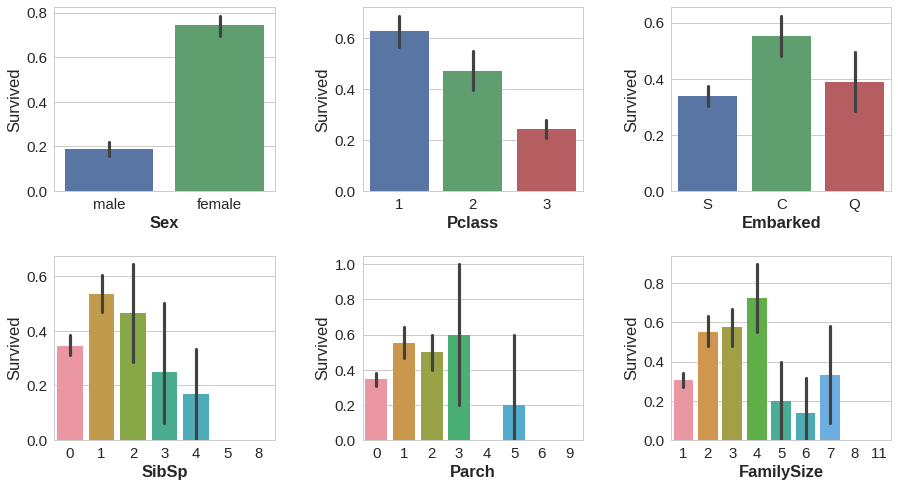

In [13]:
def barplots(dataframe, features, cols=2, width=10, height=10, hspace=0.5, wspace=0.25):
    # define style and layout
    sns.set(font_scale=1.5)
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataframe.shape[1]) / cols)
    # define subplots
    for i, column in enumerate(dataframe[features].columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        sns.barplot(column,'Survived', data=dataframe)
        plt.xticks(rotation=0)
        plt.xlabel(column, weight='bold')

    
feature_list = ['Sex','Pclass', 'Embarked', 'SibSp', 'Parch', 'FamilySize']        
barplots(dataset, features=feature_list, cols=3, width=15, height=40, hspace=0.35, wspace=0.4)


We'll also consider the statistics associated with GroupType and GroupSize, which we defined in Section 1.2 (Feature Engineering) while grouping families and co-travellers with shared tickets:

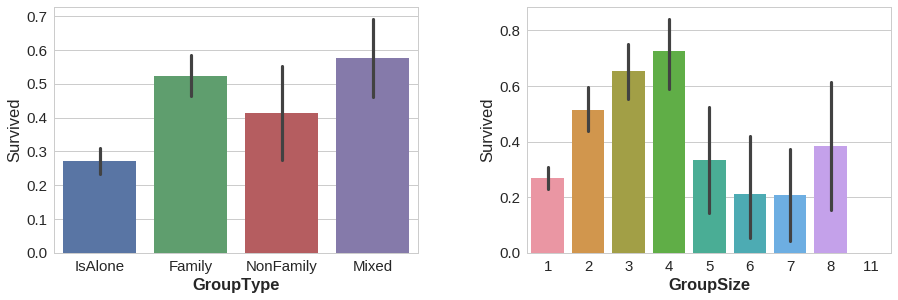

In [14]:
feature_list = ['GroupType','GroupSize']        
barplots(dataset, features=feature_list, cols=2, width=15, height=75, hspace=0.3, wspace=0.3)


Note that the black 'error bars' on our plots represent 95% confidence intervals. For practical purposes, when comparing survival versus feature values, these bars can be thought of as statistical uncertainties given our limited sample size and the spread in the data. 

Findings:
* **Sex** and **Pclass** both show a strong statistically significant influence on survival. 
* **FamilySize** of 2-4 is more advantageous than larger families or passengers without family. Survival drops sharply at FamilySize=5 and beyond. 
* **Embarked** shows no clear trend; we will later investigate this feature in more detail. 
* For **GroupType**, we can clearly see that lone passengers have a lower survival probability compared to other groups (note, this also mirrors what we see for FamilySize=1 and GroupSize=1). Between the other three categories of Family, NonFamily, and Mixed, the wide confidence bounds on the latter two make it difficult to assert whether any of these three have a statistically significant advantage relative to each other. 
* For **GroupSize**, we see a trend similar to the one we observed for FamilySize, where survival increases up to GroupSize=4, and then drops off sharply for group sizes of 5 and above. However, compared to FamilySize, the confidence bounds for this variable are tighter, and the relation between survival and GroupSize up to 4 appears more linear, suggesting that GroupSize may be a better variable for model training than FamilySize. 

Given the FamilySize feature, it is not clear whether SibSp and Parch are now gratuitous, or whether they can still offer some valuable insight. This will need further investigation. 

Now let's examine **Age** and **Fare**:

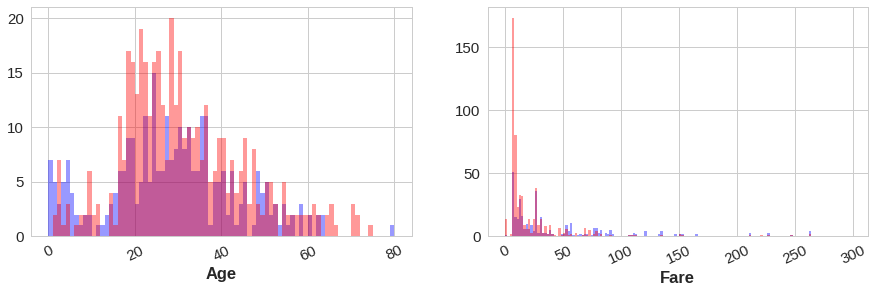

In [15]:
def histograms(dataframe, features, force_bins=False, cols=2, width=10, height=10, hspace=0.2, wspace=0.25):
    # define style and layout
    sns.set(font_scale=1.5)
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataframe.shape[1]) / cols)
    # define subplots
    for i, column in enumerate(dataframe[features].columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        df_survived = dataframe[dataframe['Survived'] == 1]
        df_perished = dataframe[dataframe['Survived'] == 0]
        if force_bins is False:
            sns.distplot(df_survived[column].dropna().values, kde=False, color='blue')
            sns.distplot(df_perished[column].dropna().values, kde=False, color='red')
        else:
            sns.distplot(df_survived[column].dropna().values, bins=force_bins[i], kde=False, color='blue')
            sns.distplot(df_perished[column].dropna().values, bins=force_bins[i], kde=False, color='red')
        plt.xticks(rotation=25)
        plt.xlabel(column, weight='bold')    


feature_list = ['Age', 'Fare']    
bins = [range(0, 81, 1), range(0, 300, 2)]
histograms(dataset, features=feature_list, force_bins=bins, cols=2, width=15, height=70, hspace=0.3, wspace=0.2)


Blue denotes survivors; red denotes those who perished. 

Findings:
* **Age**: Survival improves for children. Age-dependent differences in survival are perhaps easier to see in a kernel density estimate (KDE) plot (see below). Elderly passengers, around age 60 and up, tended to perish. 
* **Fare**: Unsurpisingly passengers with the lowest fares perished in greater numbers. Fare values are indeed widely spread; we see many passengers with fares exceeding 50.00 and 100.00. It may be sensible to convert fare into a logarithmic value to explore its relation to survival. 


Below we generate KDE plots and convert Fare to a base-10 log scale. We will also examine the 'SplitFare' variable, which divides the total ticket Fare price among the number of passengers sharing that ticket:

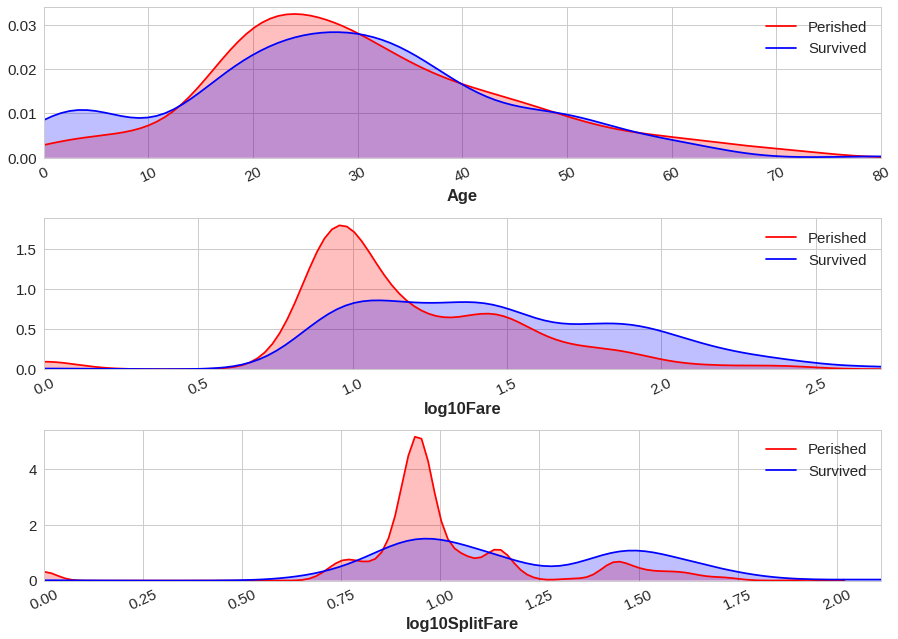

In [16]:
def univariate_kdeplots(dataframe, plot_features, cols=2, width=10, height=10, hspace=0.2, wspace=0.25):
    # define style and layout
    sns.set(font_scale=1.5)
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataframe.shape[1]) / cols)
    # define subplots
    for i, feature in enumerate(plot_features):
        ax = fig.add_subplot(rows, cols, i + 1)
        g = sns.kdeplot(dataframe[plot_features[i]][(dataframe['Survived'] == 0)].dropna(), shade=True, color="red")
        g = sns.kdeplot(dataframe[plot_features[i]][(dataframe['Survived'] == 1)].dropna(), shade=True, color="blue")
        g.set(xlim=(0 , dataframe[plot_features[i]].max()))
        g.legend(['Perished', 'Survived'])
        plt.xticks(rotation=25)
        ax.set_xlabel(plot_features[i], weight='bold')

feature_list = ['Age', 'log10Fare', 'log10SplitFare']
univariate_kdeplots(dataset, feature_list, cols=1, width=15, height=100, hspace=0.4, wspace=0.25)

We can more clearly see: 
* Children have a survival advantage, particularly those 13 and under. 
* Elderly passengers ~60 and up are most likely to perish. 
* Survival is poorest for Fares of 10.0 or less ($\lt$ 1.0 on this log scale). 
* The Fare KDE plot shows 2 clear points of concavity near log(Fare)=0.9 and log(Fare)=1.4, and possibly a third near log(Fare)=1.8. For Splitfare, the variance on the peaks appear smaller, and there seem to be 3 main peaks, possibly corresponding to the means for Pclasses 3, 2 and 1. It should be investigated how Fare and SplitFare is distributed among different Pclasses. 
* We note that there appear several passengers whose Fare is listed as 0.0, virtually all of whom perished. 

Let's now consider discretized Age Bins and see if this makes any of the Age-related trends clearer. First we'll group age into bins of 5 years:


 Survived   0.0  1.0
AgeBin_v1          
(0, 5]      13   31
(5, 10]     13    7
(10, 15]     8   11
(15, 20]    63   33
(20, 25]    80   42
(25, 30]    66   42
(30, 35]    47   41
(35, 40]    39   28
(40, 45]    30   17
(45, 50]    23   16
(50, 55]    14   10
(55, 60]    11    7
(60, 65]    10    4
(65, 70]     3    0
(70, 75]     4    0
(75, 80]     0    1
(80, 85]     0    0


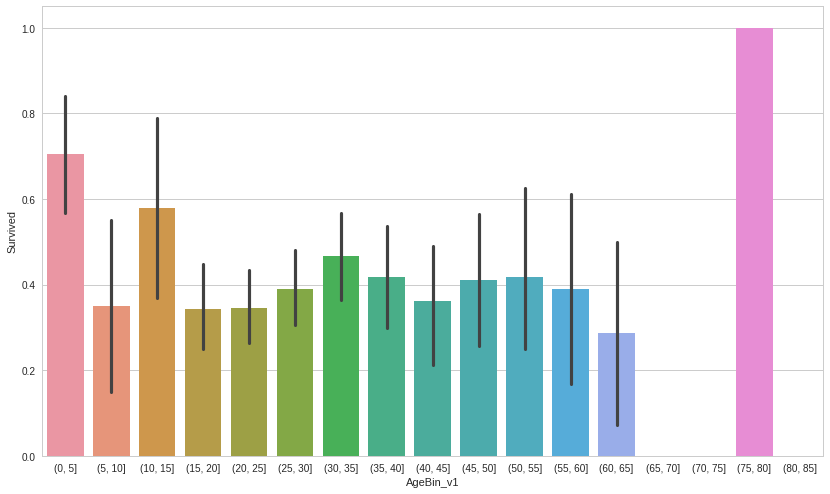

In [17]:
dataset['AgeBin_v1'] = pd.cut(dataset['Age'], bins=range(0, 90, 5))
sns.set(rc={'figure.figsize':(14,8.27)})
sns.set(font_scale=1.0)
plt.style.use('seaborn-whitegrid')
g = sns.barplot('AgeBin_v1','Survived', data=dataset)

table = pd.crosstab(dataset['AgeBin_v1'], dataset['Survived'])
print('\n', table)

Findings (complementary to KDE plot):
* Survival tends to be highest in the 0-15 age group. 
* There is a slight increase in survival between 30-40 relative to adjacent bins. 
* Survival generally decreases after age 60; however, we have fewer samples upon which to base our statistics.  
* However, due to the large variances on all bars, these findings need to be taken with some caution. 

Let's use these trends to custom-define a new set of bins with reduced granulation (see Section 1.2-a for the 'AgeBin' variable definition):

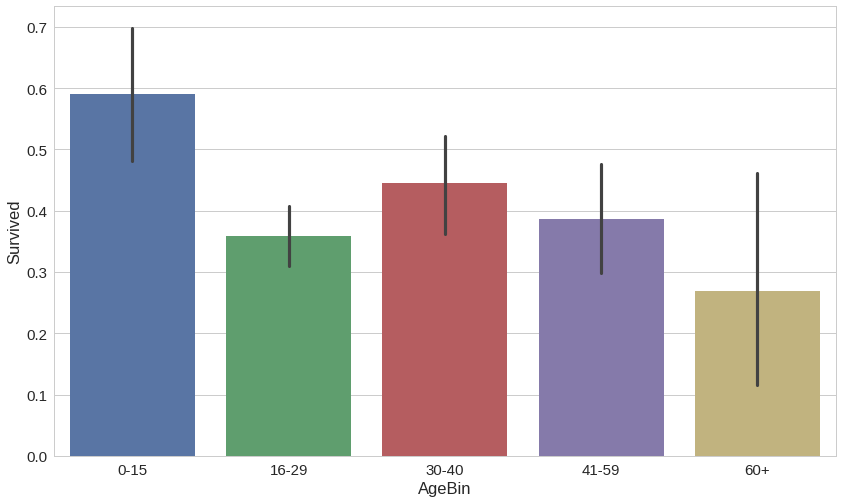

In [18]:
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')

g = sns.barplot('AgeBin','Survived', data=dataset)

This makes it even clearer that being a child (0-15) is a statistically significant predictor of higher survival. Let's focus on our 'IsChild' variable, which equals 1 for Ages 15 and under, otherwise 0.  

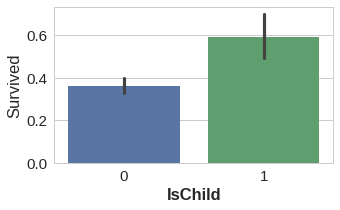

In [19]:
barplots(dataset, features=['IsChild'], cols=1, width=5, height=100, hspace=0.3, wspace=0.2)

Findings:
* Children do indeed have significantly higher survival than non-children, as we might expect from the "women and children first" evacuation order. However, the survival probability (60%) is still quite a bit lower than that of Sex='female' (~73%) and Pclass=1 (~62.5%). There are clearly other features that play an important role in the likelihood of a child surviving, which we'll explore in [Section 1.4](#section_1_4). 


What about discretizing log10 Fare into bins? We do this below. 

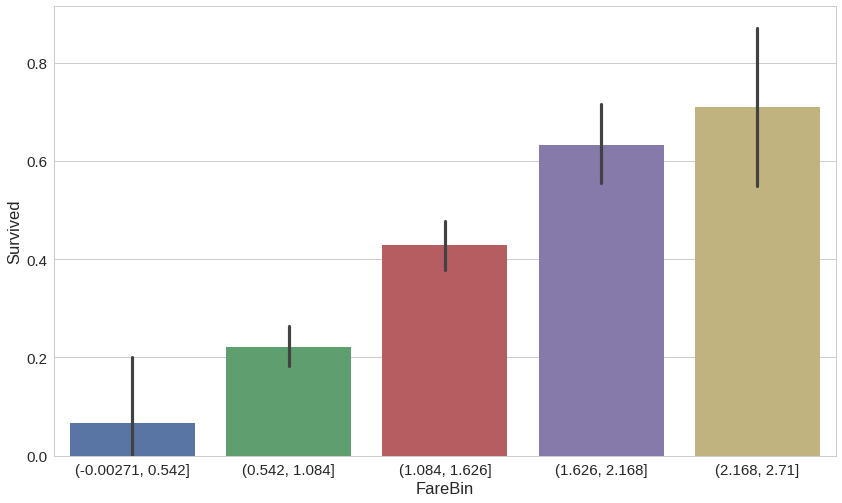

In [20]:
sns.set(rc={'figure.figsize':(14,8.27)})
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')
dataset['FareBin'] = pd.cut(dataset['log10Fare'], bins=5)
g = sns.barplot('FareBin','Survived', data=dataset)

Findings:
* There is an approximately linear increase in survival probability with increasing FareBin. Could this in fact provide better predictive granularization than Pclass? We can test this idea later during Feature Selection. 

Does this trend hold true if we look at the log10 SplitFare variable?

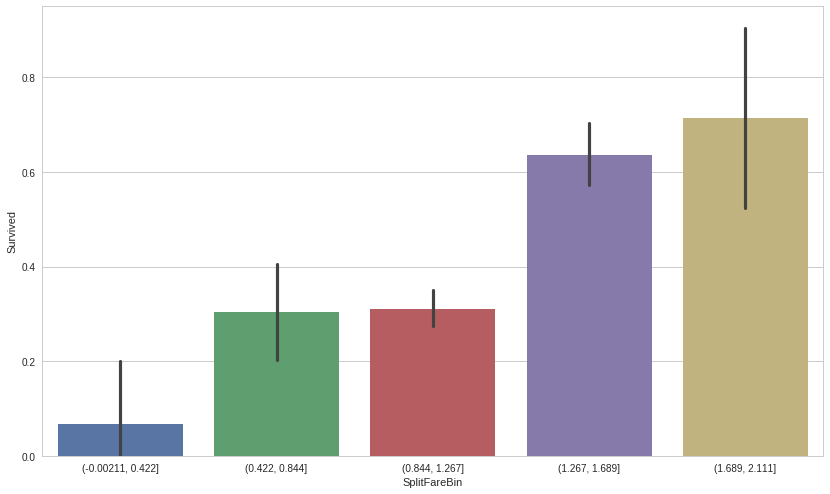

In [21]:
sns.set(font_scale=1.0)
plt.style.use('seaborn-whitegrid')
dataset['SplitFareBin'] = pd.cut(dataset['log10SplitFare'], bins=5)
g = sns.barplot('SplitFareBin','Survived', data=dataset)


Unfortunately the nice linear trend doesn't quite hold up. Bins 2-3 are nearly identical; similarly for bins 4-5. This looks more like a replication of the Pclass dependencies. What if we plot again with more bins?

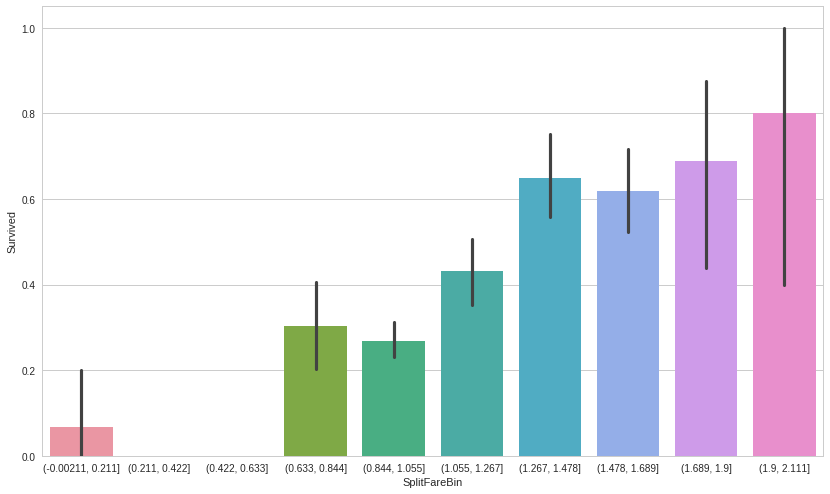

In [22]:
sns.set(font_scale=1.0)
plt.style.use('seaborn-whitegrid')
dataset['SplitFareBin'] = pd.cut(dataset['log10SplitFare'], bins=10)
g = sns.barplot('SplitFareBin','Survived', data=dataset)


The linearity is somewhat better but not great, and we also have relatively low confidences for our highest two bins.  

<a id='section_1_3_c'></a>

### c) The Role of Cabin

Can information about passenger Cabin be useful for predicting survival? Initially, one might think that passengers in cabins located more deeply within the Titanic are more likely to perish. The cabins listed in our passenger data are prefixed with the letters A through G. Some background research tells us that this letter corresponds to the deck on which the cabin was located (with A being closer to the top, G being deeper down). There also appears to be a single cabin entry beginning with the letter 'T', but it's not clear what this means, so we will omit it. 

Let's take a look at whether the deck the cabin was located on had any significant influence on survival:

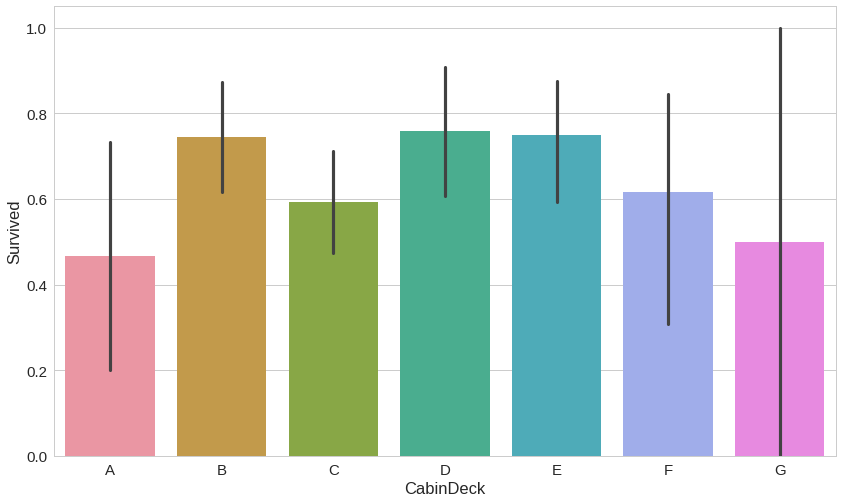

In [23]:
dataset['CabinDeck'] = dataset.apply(lambda row: 
                                     str(row['Cabin'])[0] if str(row['Cabin'])[0] != 'n'
                                     else row['Cabin'], axis=1)

sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')
g = sns.barplot('CabinDeck','Survived', data=dataset[dataset['CabinDeck'] != 'T'].sort_values('CabinDeck'))


Findings:
* CabinDeck appears to have no significant influence on survival. 

A few other comments: 
* The cabin data we have exists predominantly for members of Pclass=1; it is missing for nearly all other passengers. 
* We know that gates in some of the stairwells leading to higher decks were left shut, due to the segregation of 3rd-class passengers from the rest. This of course mainly impacted survival in Pclass=3.  
* The iceberg penetrated the Titanic *below* deck G. Hence, there wasn't any localized damage/flooding directly to any of the cabins we are considering. 
* Lower-class passengers were not necessarily on lower decks than higher-class passengers. The following schematic of passenger class cabin distributions shows that most decks contained a mix of classes, albeit 3rd-class passengers tended to be far towards the rear or front of the ship:

<img src='http://rpmarchildon.com/wp-content/uploads/2018/06/titanic_class_cabin_locations.png'>

Conclusion:
* Cabin is not a useful feature for survival prediction. Having a known cabin number basically just tells us that the passenger is Pclass=1, and is therefore redundant. 


<a id='section_1_4'></a>

## 1.4 - Exploring Feature Relations

We now proceed with a multivariate analysis to explore how different features influence each other's impact on passenger survival. 

<a id='section_1_4_a'></a>

### a) Feature Correlations

Let's first look at correlations between survival and some of our existing numerical features:

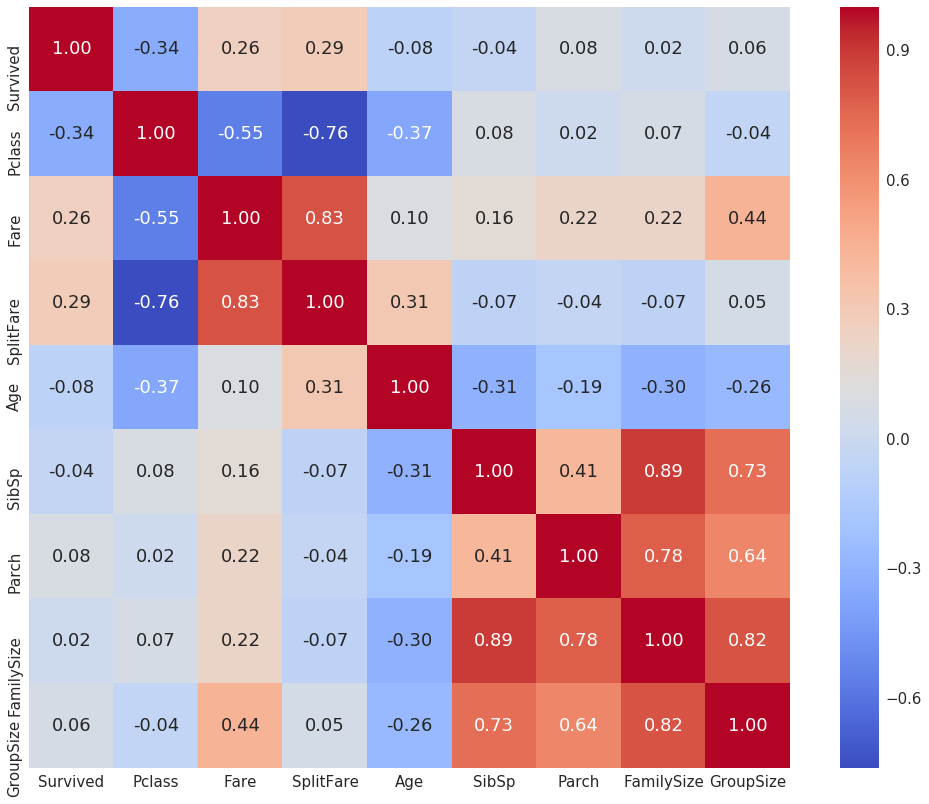

In [24]:
feature_list = ['Survived', 'Pclass', 'Fare', 'SplitFare', 'Age', 'SibSp', 'Parch', 'FamilySize', 'GroupSize']

plt.figure(figsize=(18,14))

sns.set(font_scale=1.5)
g = sns.heatmap(dataset[np.isfinite(dataset['Survived'])][feature_list].corr(), 
                square=True, annot=True, cmap='coolwarm', fmt='.2f')

Findings: 
* **Pclass** and **SplitFare** both show significant correlation with survival, unsurprisingly. 
* There is some negative correlation between **Age** and **FamilySize**. This makes sense, as we might expect larger families to consist of more children, thereby lowering the mean age. 
* There is some negative correlation between **Age** and **Pclass**. This suggests that upper-class passengers (PClass=1) are generally older than lower-class ones. 
* Unsurprisingly **Sibsp**, **Parch**, and **FamilySize** are all strongly correlated with each other.
* **GroupSize** appears to correlate positively with **Fare**, but has near-zero correlation with **SplitFare**, further indicative that **Fare** is cumulative and represents the total paid for all passengers sharing a ticket. 

In our univariate plots we saw that **FamilySize** had a clear impact on survival, yet here the correlations between **Survival** and **FamilySize** are near-zero. This may be explained by the fact that the positive trend between survival and FamilySize reverses into a negative trend after FamilySize=4. A similar reason may be behind the fact that Survival shows little correlation with Age, yet we know Age < 15 (i.e. child) is an advantage. 

At this point it is also common to examine 'pair plots' of variables. However, given that most of our features span only a few discrete values, this turns out to be of limited informative value for us, and is hence omitted. 


<a id='section_1_4_b'></a>

### b) Typical Survivor Attributes

We can easily check which combinations of nominal features give the best and worst survival probabilities. However, this is limited by small sample size for some of our feature combination subsets. Nonetheless it can be useful for benchmarking purposes. We limit this quick exercise to only a few features (if we specify too many, our sample sizes for each combination become too small). 

In [25]:
def get_mostProbable(data, feature_list, feature_values):
    
    high_val, low_val = 0, 1
    high_set, low_set = [], []
    high_size, low_size = [], []
    
    for combo in itertools.product(*feature_values):
    
        subset = dataset[dataset[feature_list[0]] == combo[0]]
        for i in range(len(feature_list))[1:]:
            subset = subset[subset[feature_list[i]] == combo[i]]
        mean_survived = subset['Survived'].mean()
    
        if mean_survived > high_val:
            high_set = combo
            high_val = mean_survived
            high_size = subset.shape[0]
        
        if mean_survived < low_val:
            low_set = combo
            low_val = mean_survived
            low_size = subset.shape[0]
        
    print('\n*** Most likely to survive ***')
    for i in range(len(feature_list)):
        print('%s : %s' % (feature_list[i], high_set[i]))
    print('... with survival probability %.2f' % high_val)
    print('and total set size %s' % high_size)
        
    print('\n*** Most likely to perish ***')
    for i in range(len(feature_list)):
        print('%s : %s' % (feature_list[i], low_set[i]))
    print('... with survival probability %.2f' % low_val)
    print('and total set size %s' % low_size)
            

An examination of the best and worst combinations of 'Sex' and 'Pclass':

In [26]:
feature_list = ['Pclass', 'Sex']
feature_values = [[1, 2, 3], ['male', 'female']]  # ['Pclass', 'Sex']
get_mostProbable(dataset, feature_list, feature_values)
    


*** Most likely to survive ***
Pclass : 1
Sex : female
... with survival probability 0.97
and total set size 144

*** Most likely to perish ***
Pclass : 3
Sex : male
... with survival probability 0.14
and total set size 493


Findings:
* Virtually all 1st-class females survived (97%).
* 3rd-class males where the most likely to perish, with only 14% survival.

This isn't too surprising, although the associated survival probabilities are useful to note. 

What if we also consider whether the passenger was a child?

In [27]:
feature_list = ['Pclass', 'Sex', 'IsChild']
feature_values = [[1, 2, 3], ['male', 'female'], [0, 1]]  # ['Pclass', 'Sex', 'IsChild']
get_mostProbable(dataset, feature_list, feature_values)
          


*** Most likely to survive ***
Pclass : 1
Sex : male
IsChild : 1
... with survival probability 1.00
and total set size 5

*** Most likely to perish ***
Pclass : 2
Sex : male
IsChild : 0
... with survival probability 0.08
and total set size 159


Findings:
* Male rather than female first-class children are most likely to survive (but note that we have only 5 samples in this subset). 
* Males in Pclass=2 seem to fare worse than Pclass=3 when we delineate between adults and children. 

<a id='section_1_4_c'></a>

### c) Sex, Pclass, and IsChild

Let's take a closer look at how survival differs between male and female across all three passenger classes:

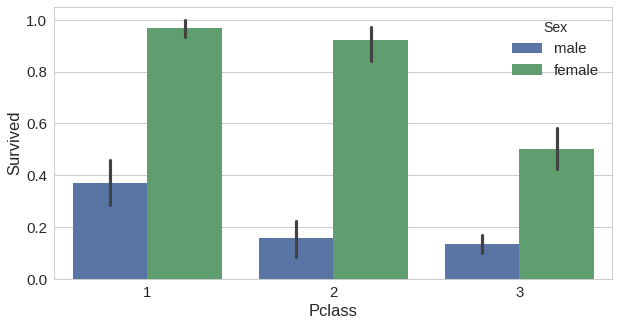

In [28]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-whitegrid')
g = sns.barplot(x="Pclass", y="Survived", hue="Sex", data=dataset)

Findings:
* Males in Pclass 2 and 3 have almost the same survival probability. Survival roughly doubles when going to Pclass 1.
* Females in Pclass 2 are almost as likely to survive as those in Pclass 1; however, survival drops sharply (by ~40%) for Pclass 3.

Now let's see how this subdivides between children and adults:


*** i) Adult Male Survival ***
Pclass     1   2    3
Survived             
0.0       77  91  281
1.0       42   8   38

*** ii) Adult Female Survival ***
Pclass     1   2   3
Survived            
0.0        2   6  58
1.0       89  60  56

*** iii) Male Child Survival ***
Pclass    1  2   3
Survived          
0.0       0  0  19
1.0       3  9   9

*** iv) Female Child Survival ***
Pclass    1   2   3
Survived           
0.0       1   0  14
1.0       2  10  16


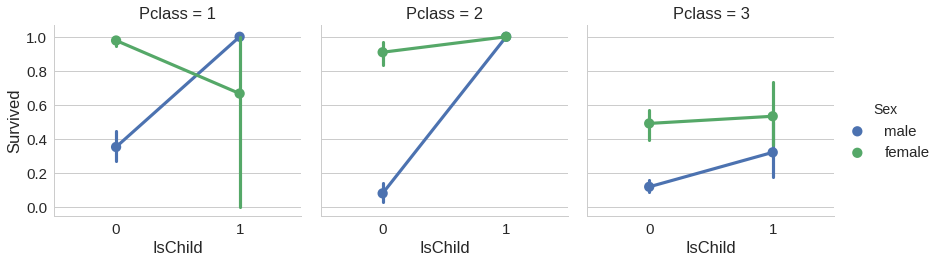

In [29]:
subset = dataset[dataset['IsChild'] == 0]
table = pd.crosstab(subset[subset['Sex']=='male']['Survived'], subset[subset['Sex']=='male']['Pclass'])
print('\n*** i) Adult Male Survival ***')
print(table)

table = pd.crosstab(subset[subset['Sex']=='female']['Survived'], subset[subset['Sex']=='female']['Pclass'])
print('\n*** ii) Adult Female Survival ***')
print(table)

subset = dataset[dataset['IsChild'] == 1]
table = pd.crosstab(subset[subset['Sex']=='male']['Survived'], subset[subset['Sex']=='male']['Pclass'])
print('\n*** iii) Male Child Survival ***')
print(table)

table = pd.crosstab(subset[subset['Sex']=='female']['Survived'], subset[subset['Sex']=='female']['Pclass'])
print('\n*** iv) Female Child Survival ***')
print(table)

g = sns.factorplot(x="IsChild", y="Survived", hue="Sex", col="Pclass", data=dataset, ci=95.0)
# ci = confidence interval (set to 95%)

Findings:

> Males:
> * Virtually all of the male children in our training dataset survive in Pclasses 1 and 2. 
> * The IsChild feature clearly has a significant impact on survival likelihood (well above 50%) for Pclass 1 and 2; for Pclass 3, this difference is a more modest 20%.

> Females:
> * All but one of the Pclass 1 and 2 female children survived. 
> * Survival of a female child versus an adult is only modestly better (by perhaps 5%). 
> * The vast majority of female passengers who perished were in Pclass=3 (see table ii). 

<a id='section_1_4_d'></a>

### d) FamilySize, Sex, and Pclass

We saw earlier that FamilySize improves survival up to FamilySize=4, then sharply drops. Does Sex have any influence on this trend?

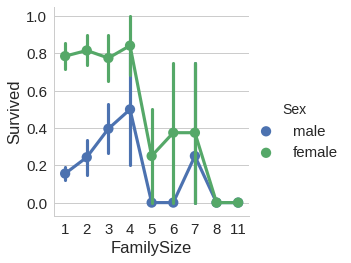

In [30]:
g = sns.factorplot(x="FamilySize", y="Survived", hue="Sex", data=dataset, ci=95.0)
# ci = confidence interval (set to 95%)
plt.style.use('seaborn-whitegrid')


Findings:
* Increase in Survival with FamilySize (up to 4) is greater for males than females.
* Both sexes follow the same general trend otherwise. 

It would be interesting to know the role Pclass plays in FamilySize survival:


 Pclass        1    2    3
FamilySize               
1           160  158  472
2           104   52   79
3            39   45   75
4             9   20   14
5             5    1   16
6             6    1   18
7             0    0   16
8             0    0    8
11            0    0   11


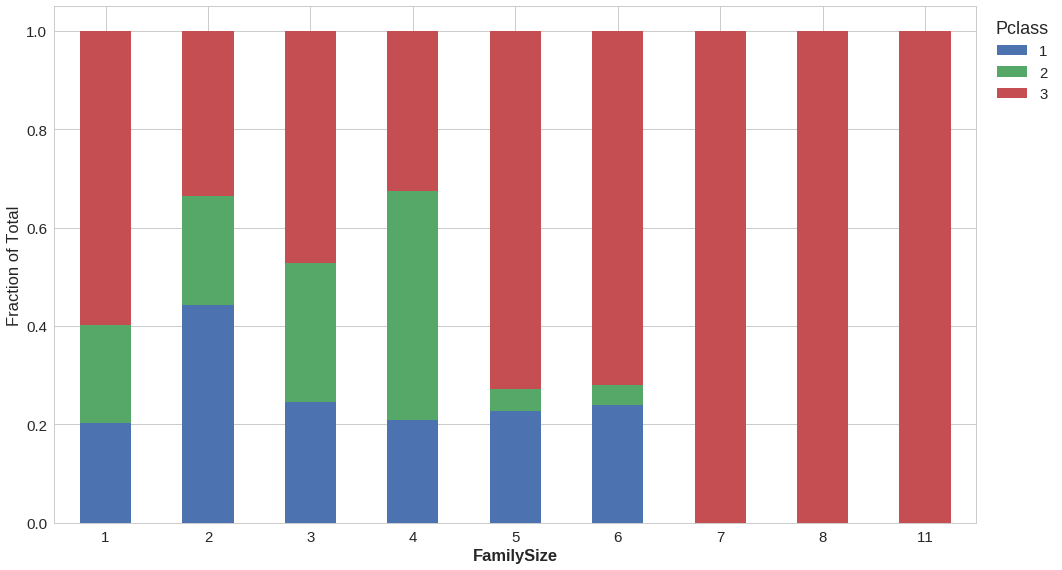

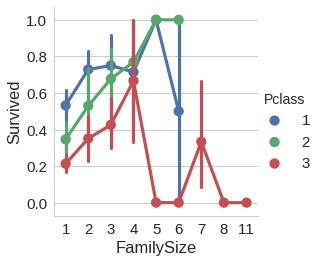

In [31]:
# Class distribution for a given FamilySize
table = pd.crosstab(dataset['FamilySize'], dataset['Pclass'])
print('\n', table)
table_fractions = table.div(table.sum(1).astype(float), axis=0)
g = table_fractions.plot(kind="bar", stacked=True)
plt.xticks(rotation=0)
plt.xlabel('FamilySize', weight='bold')
plt.ylabel('Fraction of Total')
plt.tight_layout()
leg = plt.legend(title='Pclass', loc=9, bbox_to_anchor=(1.05, 1.0))

# Comparison of surival
g = sns.factorplot(x="FamilySize", y="Survived", hue="Pclass", data=dataset, ci=95.0)


Findings:
* FamilySize > 5 were predominantly 3rd class. 
* FamilySize = 4 was predominantly 1st and 2nd class. 
* Pclass 1 breaks from the linear trend early, dipping below Pclass=2 for FamilySize=4. 

<a id='section_1_4_e'></a>

Finally, let's look at how the various FamilySizes are split between the two sexes:


 Sex         female  male
FamilySize              
1              194   596
2              123   112
3               79    80
4               29    14
5               14     8
6               10    15
7                9     7
8                3     5
11               5     6


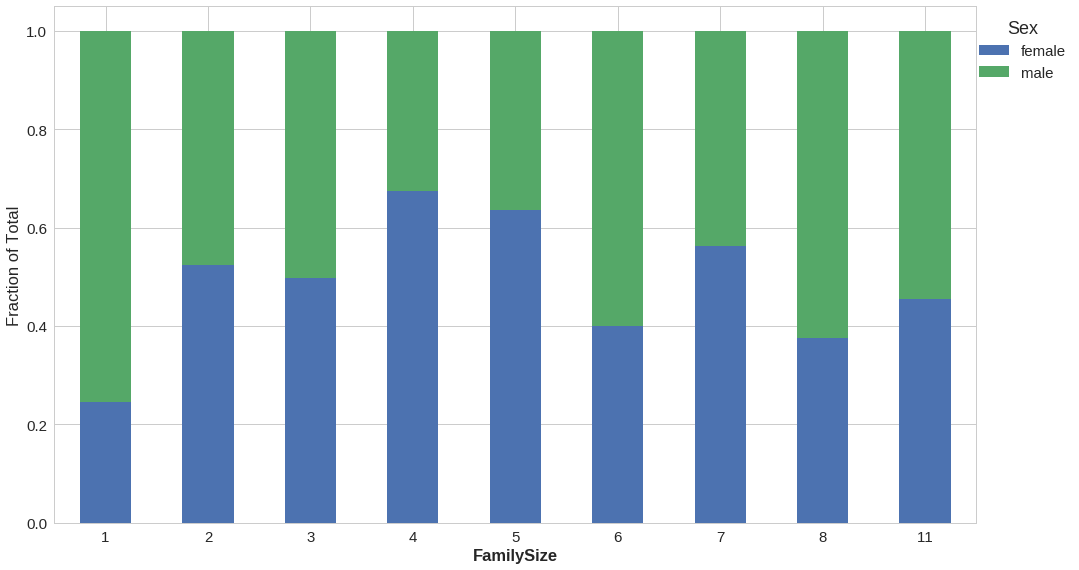

In [32]:
# Sex distribution for a given FamilySize
table = pd.crosstab(dataset['FamilySize'], dataset['Sex'])
print('\n', table)
table_fractions = table.div(table.sum(1).astype(float), axis=0)
g = table_fractions.plot(kind="bar", stacked=True)
plt.xticks(rotation=0)
plt.xlabel('FamilySize', weight='bold')
plt.ylabel('Fraction of Total')
plt.tight_layout()
leg = plt.legend(title='Sex', loc=9, bbox_to_anchor=(1.05, 1.0))


Findings:
* The proportion of males is greatest for FamilySize=1, and begins to drop for FamilySizes of 2, 3, and 4. Hence, the trend we observed earlier of FamilySizes 2, 3 and 4 becoming increasingly advantageous to survival might in part be driven by the Sex feature. 
* For FamilySize > 4, we cannot associate the lower survival rates to a higher proportion of males, as the sexes are mixed and slightly in favour of females. 

### e) A Closer Look at PClass and Fare

We know that fare and Pclass are strongly correlated, and that Pclass on its own is a strong predictor of survival. Our main question is: can the distribution of Fares within each Pclass offer better granulization about survival?

First let's examine how the fares are distributed:


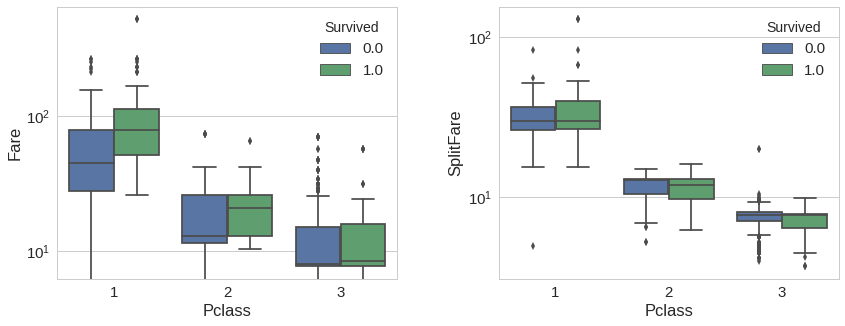

In [33]:
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(x="Pclass", y="Fare", hue="Survived", data=dataset)
ax.set_yscale('log')
ax = fig.add_subplot(1, 2, 2)
ax = sns.boxplot(x="Pclass", y="SplitFare", hue="Survived", data=dataset)
ax.set_yscale('log')


Findings:
* **SplitFare** provides less variance and better separation between Pclasses. 

let's also examine Fare and SplitFare price versus GroupSize within each Pclass:

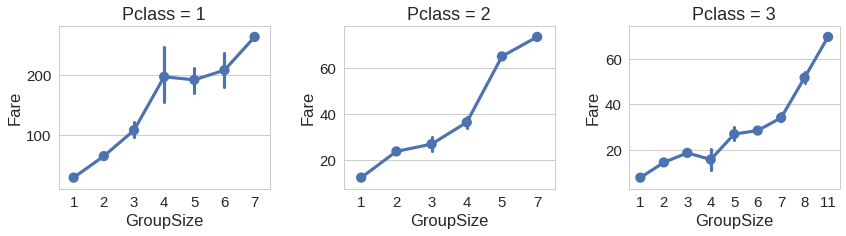

In [34]:
# Plots for Fare
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(14, 3))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.5)
for i, Pclass_ in enumerate([1, 2, 3]):
    ax = fig.add_subplot(1, 3, i + 1)
    ax = sns.pointplot(x='GroupSize', y='Fare', data=dataset[dataset['Pclass'] == Pclass_])
    plt.title('Pclass = %s' % Pclass_)


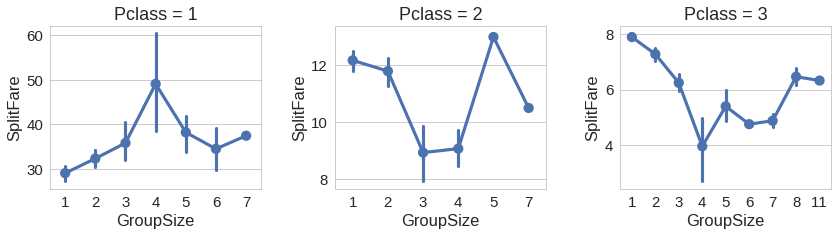

In [35]:
# Plots for SplitFare
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(14, 3))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.5)
for i, Pclass_ in enumerate([1, 2, 3]):
    ax = fig.add_subplot(1, 3, i + 1)
    ax = sns.pointplot(x='GroupSize', y='SplitFare', data=dataset[dataset['Pclass'] == Pclass_])
    plt.title('Pclass = %s' % Pclass_)


Findings:
* **Fare** scales positively with Groupsize, whereas in **SplitFare** this positive trend disappears. (As we might expect, since the impact of GroupSize on Fare has been normalized out for SplitFare.) 
* In **SplitFare** for Pclass=3, there appears to be a decreasing trend up to GroupSize=4. It is possible this is due partially to fare discounts applied to families in that passenger class. 



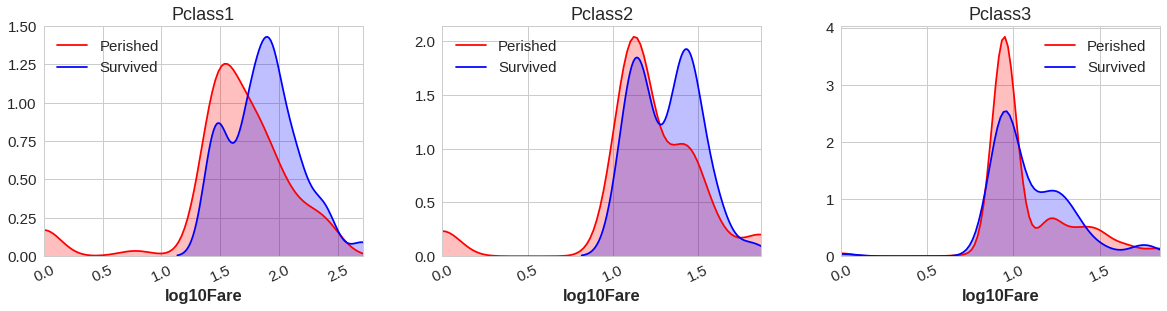

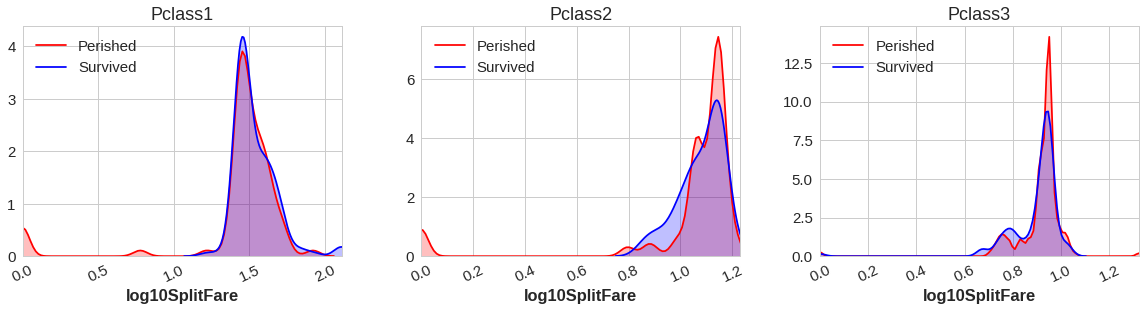

In [36]:
def KDE_feature_vs_Pclass(dataframe, feature, 
                          width=10, height=10, hspace=0.2, wspace=0.25):
    # define style and layout
    cols=3
    sns.set(font_scale=1.5)
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataframe.shape[1]) / cols)
    # define subplots
    for i, pclass in enumerate(['Pclass1', 'Pclass2', 'Pclass3']):
        ax = fig.add_subplot(rows, cols, i + 1)
        df_subset = dataframe[dataframe['Pclass'] == i+1]
        g = sns.kdeplot(df_subset[feature][df_subset['Survived'] == 0].dropna(), shade=True, color="red")
        g = sns.kdeplot(df_subset[feature][(df_subset['Survived'] == 1)].dropna(), shade=True, color="blue")
        g.set(xlim=(df_subset[feature].min() , df_subset[feature].max()))
        g.legend(['Perished', 'Survived'])
        plt.xticks(rotation=25)
        plt.title(pclass)
        ax.set_xlabel(feature, weight='bold')

KDE_feature_vs_Pclass(dataset, 'log10Fare', width=20, height=50, hspace=0.2, wspace=0.25)
KDE_feature_vs_Pclass(dataset, 'log10SplitFare', width=20, height=50, hspace=0.2, wspace=0.25)


Findings:
* **Fare** does appear to be a good predictor of survival *within* each Pclass, suggesting it provides better granulation than Pclass alone. 
* For **SplitFare**, on the other hand, higher fares within each Pclass no longer appear to yield higher survival. In fact, for Pclass 2 and 3, we see the opposite. Why? Consider the higher survival at the lower values of SplitFare.  This could be attributable to the fact that GroupSizes 2-4, which we found earlier to have higher survival rates, generally tended to have lower values of SplitFare, possibly due to family fare discounts. 

These findings imply that any predictive value Fare has is derived predominantly from GroupSize. The amount of redundancy between Fare, Pclass, and GroupSize will be better elucidated through the dimensionality reduction techniques applied in Section 2. 


<a id='section_1_4_f'></a>

### f) Survival vs Embarked, and its Relation to Pclass and Sex

Recall from our univariate plots that passengers embarking at Cherbourg appeared to have a higher survival probability than those embarking at the other two ports. Let's investigate this in greater detail. First let's examine the Pclass distributions of passengers at each port. 

Pclass      1    2    3
Embarked               
C         141   28  101
Q           3    7  113
S         177  242  495


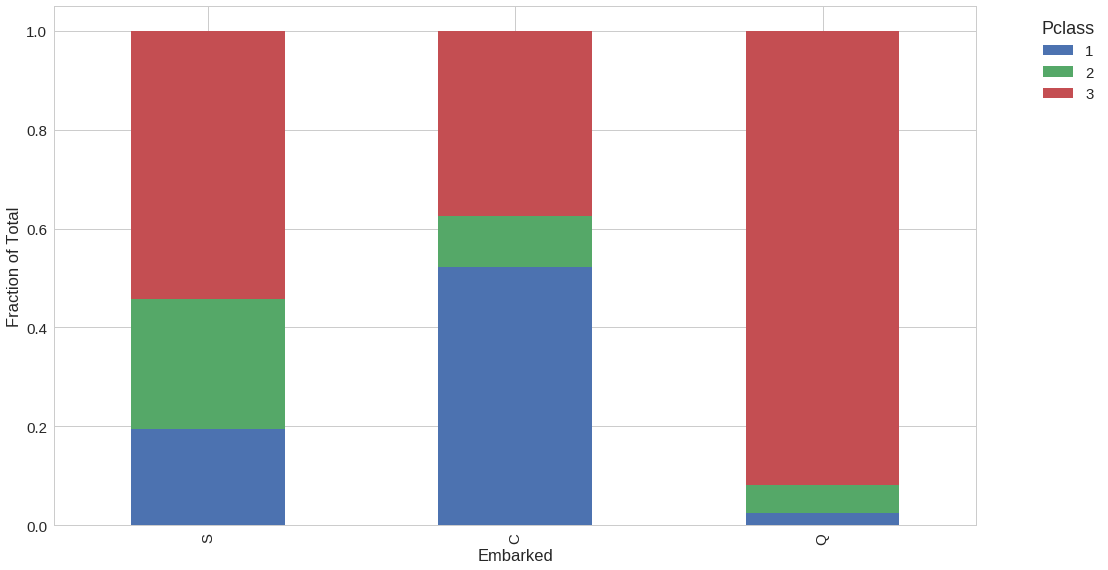

In [37]:
table = pd.crosstab(dataset['Embarked'], dataset['Pclass'])
print(table)

table_fractions = table.div(table.sum(1).astype(float), axis=0)
g = table_fractions.reindex(['S', 'C', 'Q']).plot(kind="bar", stacked=True)
plt.xlabel('Embarked')
plt.ylabel('Fraction of Total')
plt.tight_layout()
leg = plt.legend(title='Pclass', loc=9, bbox_to_anchor=(1.1, 1.0))


Findings:
* Unsurprisingly, Cherbourg had the largest proprotion of Pclass=1 passengers. 
* Interestingly, univariate survival probability for S and Q were roughly equal, yet we see here that S had a significantly larger fraction of passengers that were Pclass 1 and 2. Let's explore this in more detail by looking at Pclass survival rates for each embarkment port. 

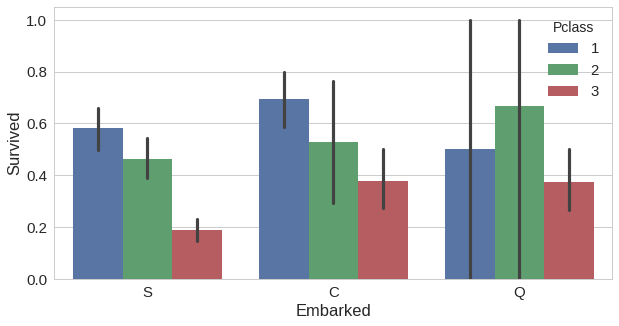

In [38]:
plt.figure(figsize=(10,5))
g = sns.barplot(x="Embarked", y="Survived", hue="Pclass", data=dataset)

We see that survial of passengers in PClass 3 was higher in both C and Q than it was in S. Could this be due to differences in the fraction of male/female passengers? 


 Sex       female  male
Embarked              
C             31    70
Q             56    57
S            129   366


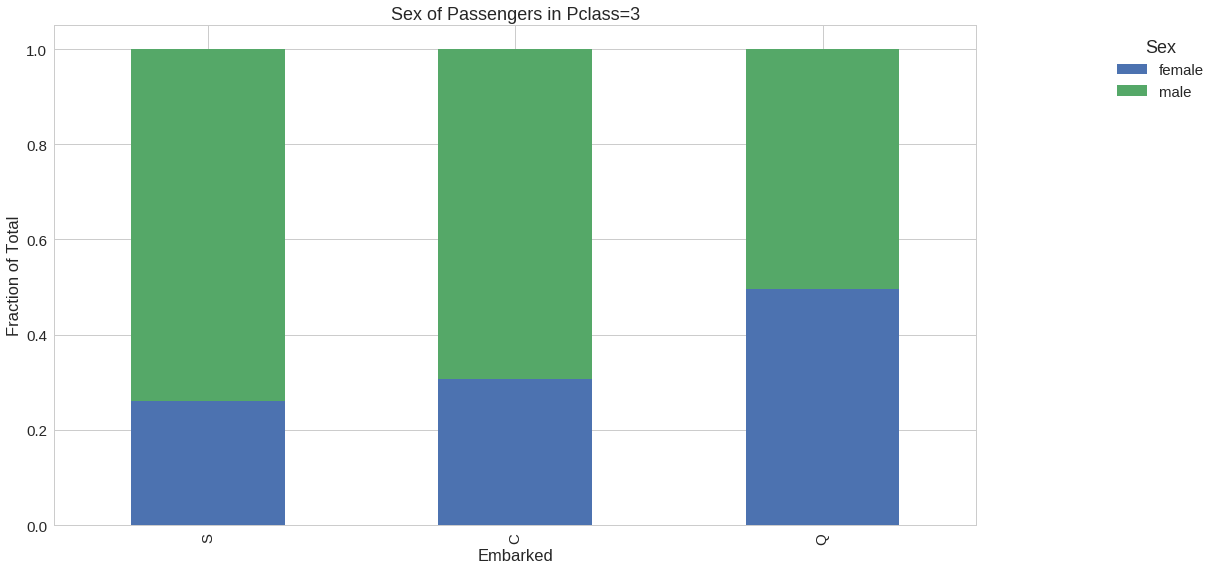

In [39]:
data_subset = dataset[dataset['Pclass']==3]
table = pd.crosstab(data_subset['Embarked'], data_subset['Sex'])
print('\n', table)

table_fractions = table.div(table.sum(1).astype(float), axis=0)
g = table_fractions.reindex(['S', 'C', 'Q']).plot(kind="bar", stacked=True)
plt.xlabel('Embarked')
plt.ylabel('Fraction of Total')
plt.title('Sex of Passengers in Pclass=3')
plt.tight_layout()
leg = plt.legend(title='Sex', loc=9, bbox_to_anchor=(1.2, 1.0))

So we see that more of the third class passengers embarking at S were male, but only by a small margin compared to C; that is probably not enough to explain the lower survival rate, so let's explore further:

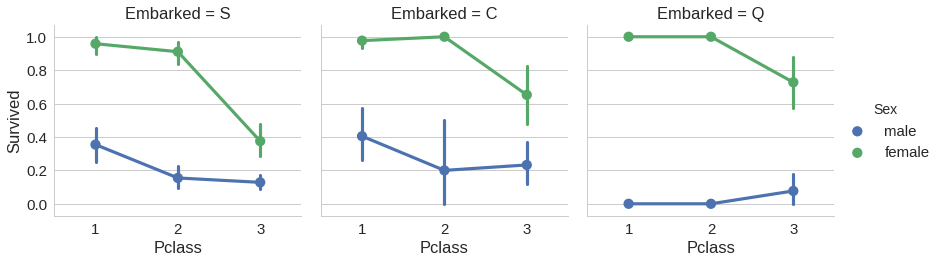

In [40]:
g = sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=dataset, ci=95.0)
# ci = confidence interval (set to 95%)

What's interesting is that we see that third-class female passengers had a much lower survival probability if they embarked at S compared to both C and Q. This could partly explain why survival for Pclass 3 is lower for S than Q. But why would third class females be less likely to survive for Embarked = S ?


 FamilySize  1   2   3   4   5   6   7   8   11
Embarked                                      
C            8   9  10   4   0   0   0   0   0
Q           46   5   4   0   0   1   0   0   0
S           46  24  23   5  10   4   9   3   5


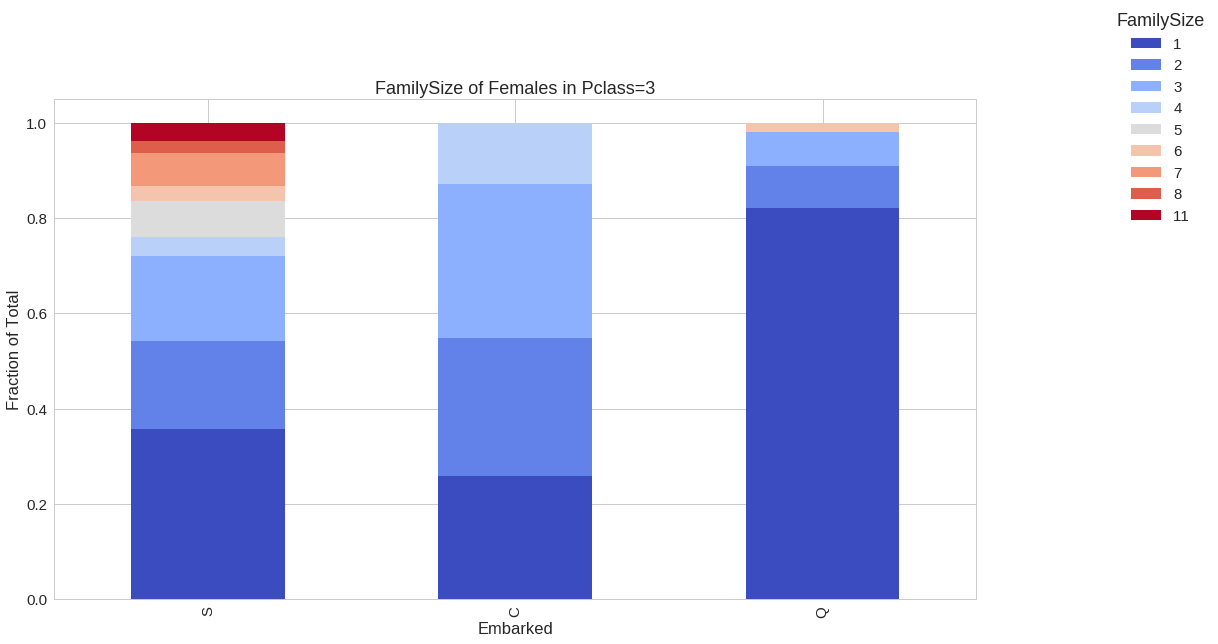

In [41]:
data_subset = dataset[dataset['Pclass']==3]
data_subset = data_subset[data_subset['Sex']=='female']

table = pd.crosstab(data_subset['Embarked'], data_subset['FamilySize'])
print('\n', table)

table_fractions = table.div(table.sum(1).astype(float), axis=0)
g = table_fractions.reindex(['S', 'C', 'Q']).plot(kind="bar", stacked=True, colormap='coolwarm')
plt.xlabel('Embarked')
plt.ylabel('Fraction of Total')
plt.title('FamilySize of Females in Pclass=3')
plt.tight_layout()
leg = plt.legend(title='FamilySize', loc=9, bbox_to_anchor=(1.2, 1.2))


It's possible that the lower third-class female survival rate for Embarked=S is related to the fact that a larger fraction of females in S have a large FamilySize (5 or higher), which we know has overall poorer survival rates. 

What about passenger age? Let's look at how Age was distributed among Female passengers at each port of embarkment. 

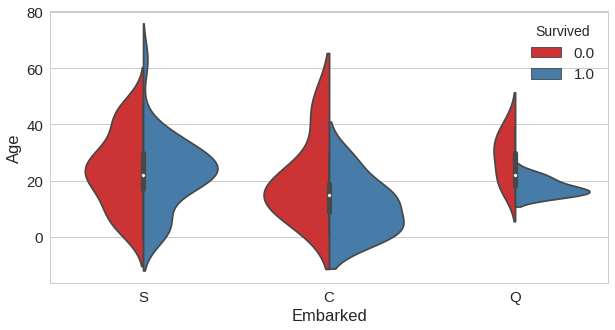

In [42]:
plt.figure(figsize=(10,5))
g = sns.violinplot(x="Embarked", y="Age", hue="Survived", 
                   data=data_subset, split=True, palette='Set1', title='Female Passenger Age Distributions')


So another clue is that we see S had more female children, but surprisingly a larger proportion of these children died compared to C and Q. So let's look at survival of third-class female passengers under the age of 16 (e.g. children). 


 Survived  0.0  1.0
Embarked          
C           2    9
Q           0    1
S          12    6


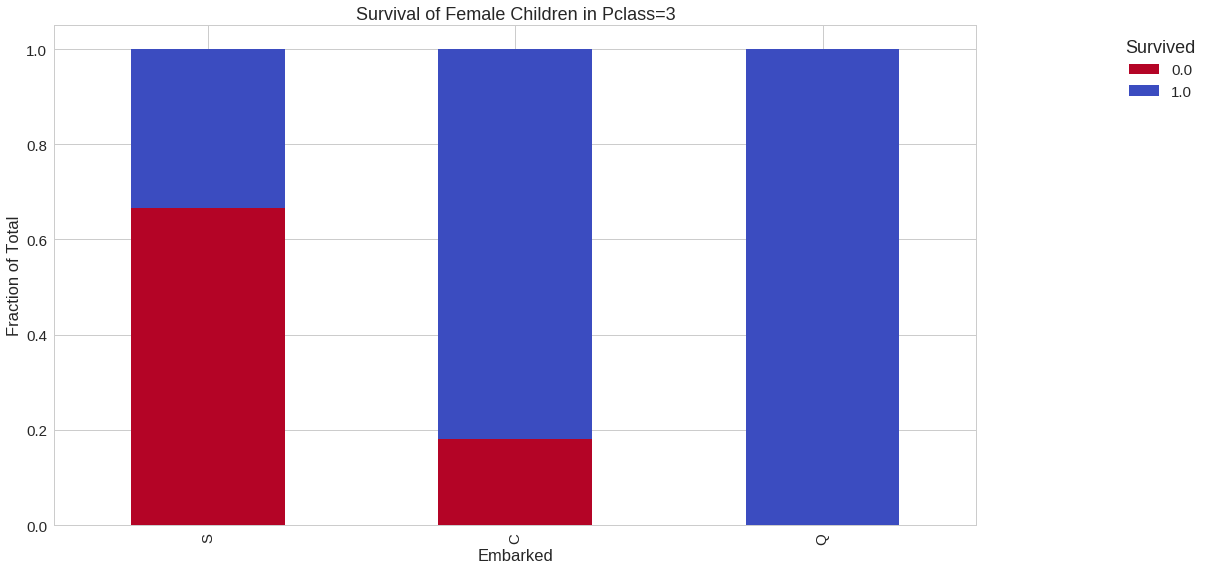

In [43]:
# survival of third-class female children
data_subset = data_subset[data_subset['Age'] < 16]

table = pd.crosstab(data_subset['Embarked'], data_subset['Survived'])
print('\n', table)

table_fractions = table.div(table.sum(1).astype(float), axis=0)
g = table_fractions.reindex(['S', 'C', 'Q']).plot(kind="bar", stacked=True, 
                                                  colormap='coolwarm_r')
plt.xlabel('Embarked')
plt.ylabel('Fraction of Total')
plt.title('Survival of Female Children in Pclass=3')
plt.tight_layout()
leg = plt.legend(title='Survived', loc=9, bbox_to_anchor=(1.2, 1.0))


Q had only one female child and she survived. C had a small number, 11, of which 9 survived. In S, only one third survived. This is very surprising as this is well below the univariate female survival rate of 70%, and total pclass=3 female survival rate of 50%.

How does this compare against family size? We'll include male children in our plots, as a benchmark:

Survival of Children Under 16, Pclass=3


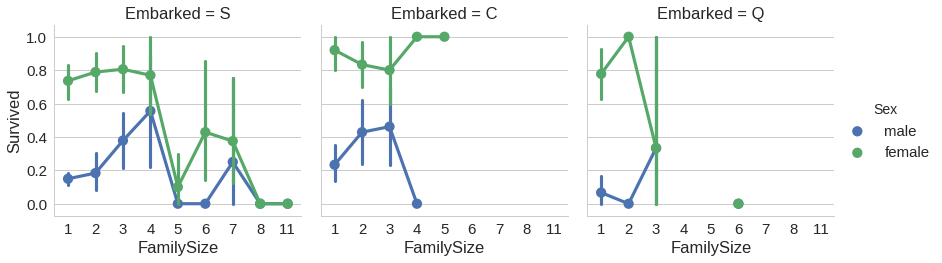

In [44]:
data_subset = dataset[dataset['Pclass']==3]
data_subset = data_subset[data_subset['Age'] < 16]

g = sns.factorplot(x="FamilySize", y="Survived", hue="Sex", 
                   col="Embarked", data=dataset, ci=95.0)
print('Survival of Children Under 16, Pclass=3')

So the drop in survival for female children indeed seems to be tied to FamilySize. By now it appears that the FamilySize feature is responsible for the lower survival for PClass=3 in emabarked=S, as it is somehow tied to a larger fraction of the female passengers perishing. 

<a id='section_1_4_g'></a>

### g) A Closer Look at GroupType and GroupSize

Let's examine how **Survival** vs. **GroupSize** might vary with **GroupType**:

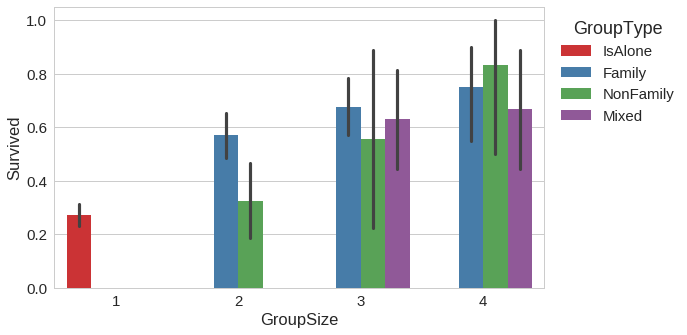

In [45]:
# focus only on groupsize < 5
plt.figure(figsize=(8,5))
g = sns.barplot(x="GroupSize", y="Survived", hue="GroupType", data=dataset[dataset['GroupSize'] < 5], palette='Set1')
plt.tight_layout()
leg = plt.legend(title='GroupType', loc=9, bbox_to_anchor=(1.15, 1.0))


We notice:
* For GroupSize=2, it is clearly advantageous to belong to a Family group rather than Non-Family. 

It would also be interesting to explore the relationships **GroupSize** and **GroupType** have with other variables such as **Sex**, **PClass**, and **Embarked**. Some questions we ask:
* Are there differences in which GroupTypes and GroupSizes men and women tend to belong to?
* Do larger groups (the ones with poorer survival) tend to be in a higher or lower passenger class?
* What class do our lone travellers tend to belong to, and where do they typically embark?



 Sex        female  male
GroupSize              
1             159   554
2             136   128
3              77    70
4              39    25
5              21    14
6              12    12
7              14    21
8               3    13
11              5     6

 Sex        female  male
GroupType              
Family        221   180
IsAlone       159   554
Mixed          55    65
NonFamily      31    44


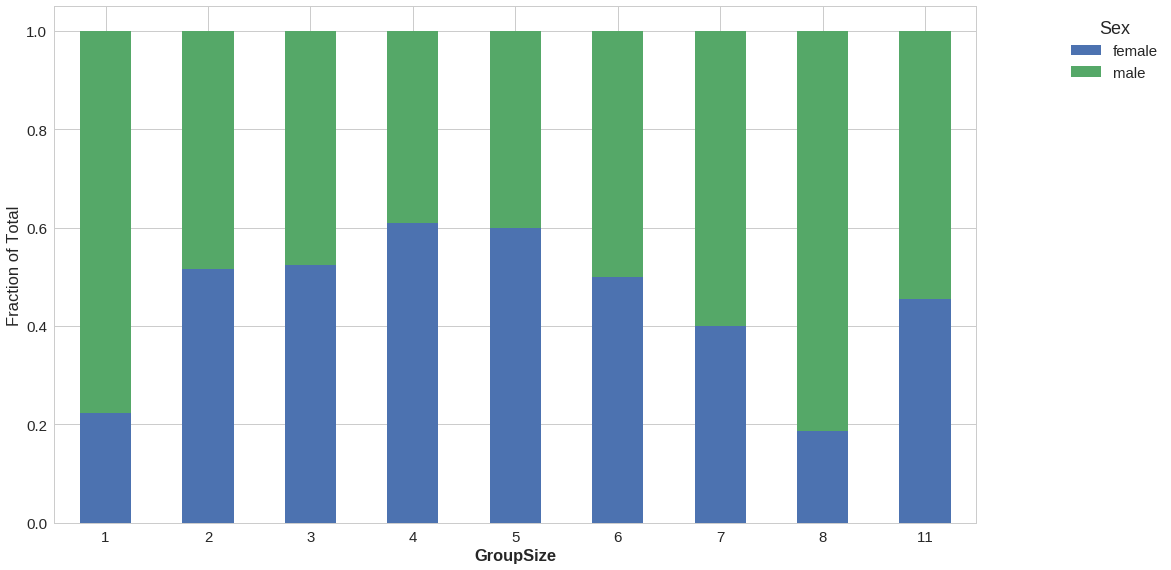

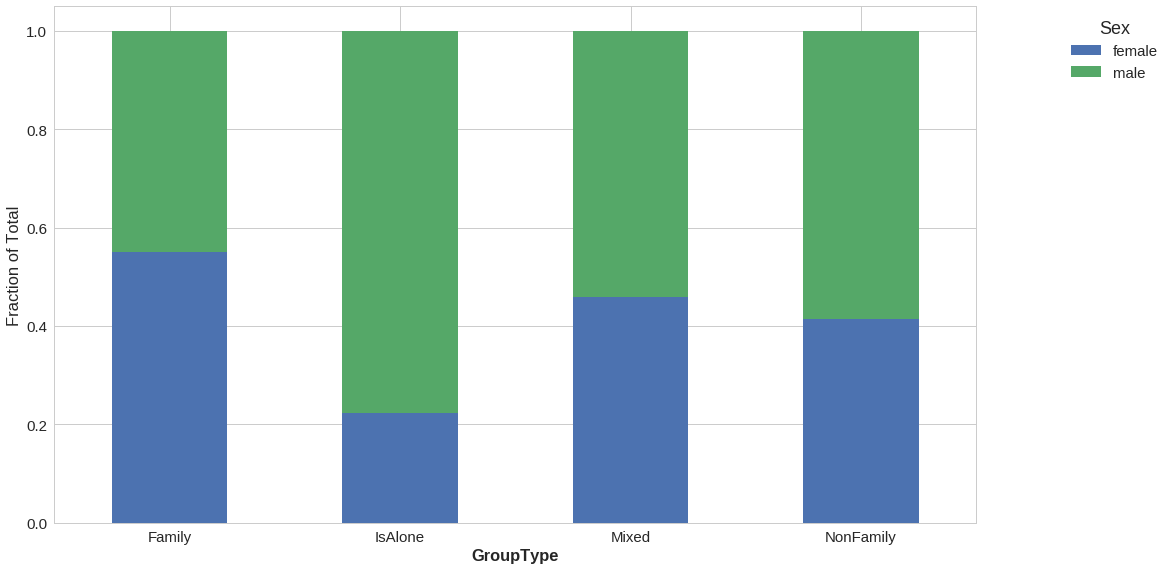

In [46]:
# Sex distribution across GroupSize
table = pd.crosstab(dataset['GroupSize'], dataset['Sex'])
print('\n', table)
table_fractions = table.div(table.sum(1).astype(float), axis=0)
g = table_fractions.plot(kind="bar", stacked=True)
plt.xticks(rotation=0)
plt.xlabel('GroupSize', weight='bold')
plt.ylabel('Fraction of Total')
plt.tight_layout()
leg = plt.legend(title='Sex', loc=9, bbox_to_anchor=(1.15, 1.0))


# Sex distribution across GroupType
table = pd.crosstab(dataset['GroupType'], dataset['Sex'])
print('\n', table)
table_fractions = table.div(table.sum(1).astype(float), axis=0)
g = table_fractions.plot(kind="bar", stacked=True)
plt.xticks(rotation=0)
plt.xlabel('GroupType', weight='bold')
plt.ylabel('Fraction of Total')
plt.tight_layout()
leg = plt.legend(title='Sex', loc=9, bbox_to_anchor=(1.15, 1.0))


Findings:
* Our proportions of male vs. female passengers for each GroupSize mirrors what we have already found for FamilySize. 
* As with FamilySize, we see that the male proportion of GroupSize tends to decrease between 1 and 4. This time we also see it clearly begin increasing again for GroupSizes 5 and higher. Since we know males in general have a much lower survival probability than females, this is seems to be at least partially responsible for the trends seen earlier for GroupSize. However, it is clearly not the whole story, as we see we still have a sizable female fraction for GroupSizes > 4 even though those groups experienced a sharp dropoff in surival probability. The lower survival at higher GroupSizes might be driven by those larger groups being predominantly of lower class, which we'll investigate soon.
* Unsurprisingly, the majority of lone passengers are male. 
* Females have a slightly larger presence in Family groups compared to mixed and non-Family. 

Let's look at female and male survival as a function of GroupType and GroupSize:

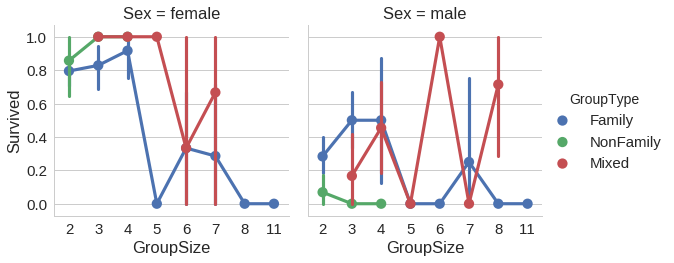

In [47]:
g = sns.factorplot(x="GroupSize", y="Survived", hue="GroupType", col="Sex", 
                   data=dataset[dataset['GroupType'] != 'IsAlone'], ci=95.0)

Findings:
* Interestingly, survival is best for females in Mixed groups, closely followed by Non-Family and then Family groups. Survival plummets at a GroupSize of 5 (except for the mixed case, which plummets at 6). 
* At low GroupSizes, males do significantly better in Family groups than they do Non-Family groups.

Now let's look at the distribution of passenger classes:


 Pclass       1    2    3
GroupSize               
1          106  136  471
2          106   74   84
3           45   39   63
4           32   16   16
5           15    5   15
6           12    0   12
7            7    7   21
8            0    0   16
11           0    0   11


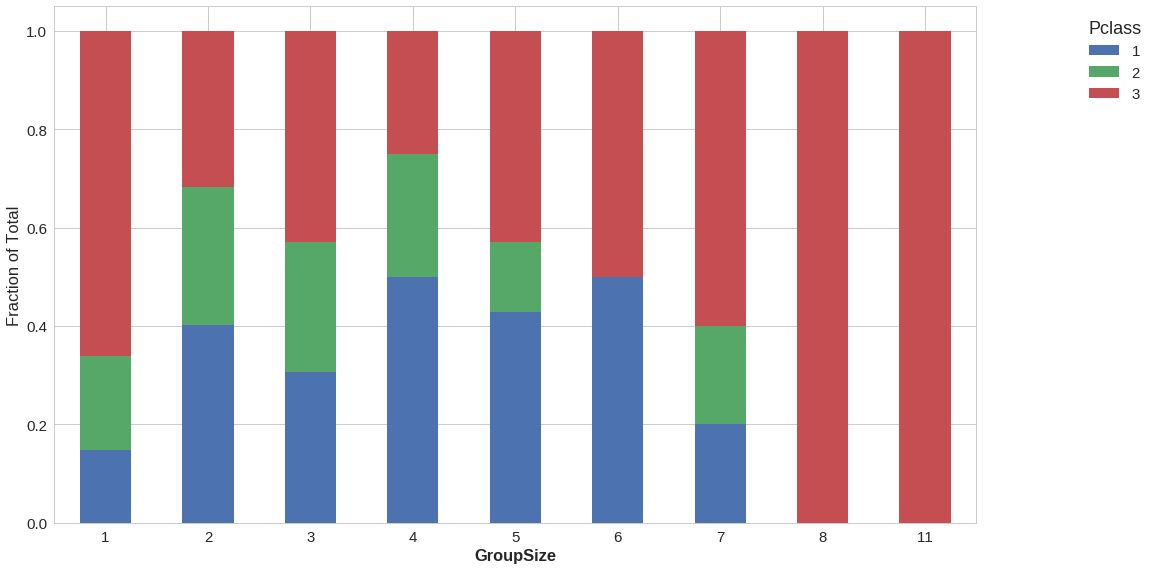

In [48]:
# Class distribution for a given GroupSize
table = pd.crosstab(dataset['GroupSize'], dataset['Pclass'])
print('\n', table)
table_fractions = table.div(table.sum(1).astype(float), axis=0)
g = table_fractions.plot(kind="bar", stacked=True)
plt.xticks(rotation=0)
plt.xlabel('GroupSize', weight='bold')
plt.ylabel('Fraction of Total')
plt.tight_layout()
leg = plt.legend(title='Pclass', loc=9, bbox_to_anchor=(1.15, 1.0))


We find:
* GroupSize=1 (GroupType = IsAlone) tends to predominantly be 3rd-class passengers (hence Pclass, in addition to the large fraction of males, may be responsible for the low survival probability we found for IsAlone). 
* For GroupSize 2-4, a comparatively smaller fraction of passengers belong to 3rd class.  

This raises the question: to what extent is Pclass responible for the variation in survival among different GroupSizes? 

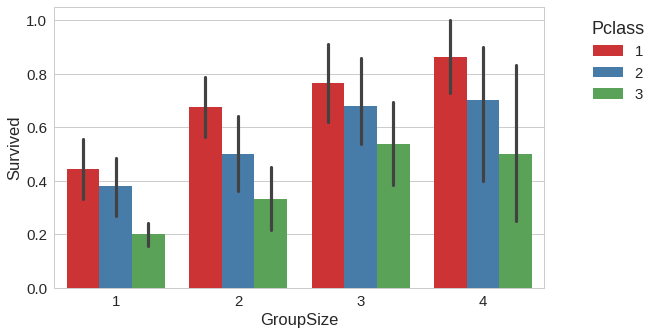

In [49]:
# Survival Probability for GroupSize < 5 Given Pclass
plt.figure(figsize=(8,5))
g = sns.barplot(x="GroupSize", y="Survived", hue="Pclass", data=dataset[dataset['GroupSize'] < 5], palette='Set1')
plt.tight_layout()
leg = plt.legend(title='Pclass', loc=9, bbox_to_anchor=(1.15, 1.0))


Findings:
* We see that for each Pclass we retain a roughly linear trend of increasing survival with increasing GroupSize up to 4; at the same time, within a given GroupSize, there is also consistently a linear trend between surival and Pclass. 

So is GroupSize a useful feature in its own right, or are its trends derivative from other features? There's one more thing to check: earlier we found that a higher fraction of males at lower GroupSizes could also be influencing the GroupSize survival trends. So let's isolate for one sex, and see if these distinctions between GroupSizes remains:

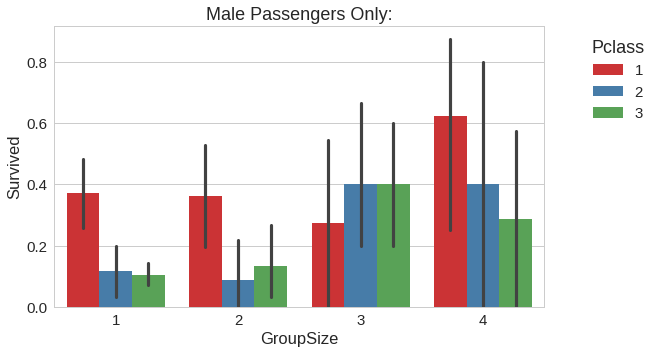

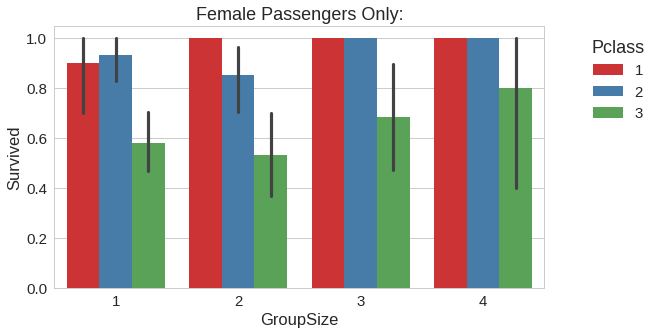

In [50]:
data_subset_1 = dataset[dataset['Sex']=='male']
data_subset_2 = dataset[dataset['Sex']=='female']

# Survival Probability for GroupSize < 5 Given Pclass
plt.figure(figsize=(8,5))
g = sns.barplot(x="GroupSize", y="Survived", hue="Pclass", 
                data=data_subset_1[data_subset_1['GroupSize'] < 5], palette='Set1')
plt.tight_layout()
plt.title('Male Passengers Only:')
leg = plt.legend(title='Pclass', loc=9, bbox_to_anchor=(1.15, 1.0))

plt.figure(figsize=(8,5))
g = sns.barplot(x="GroupSize", y="Survived", hue="Pclass", 
                data=data_subset_2[data_subset_2['GroupSize'] < 5], palette='Set1')
plt.title('Female Passengers Only:')
plt.tight_layout()
leg = plt.legend(title='Pclass', loc=9, bbox_to_anchor=(1.15, 1.0))

Findings:
* When we isolate for Sex, and for Pclass, the general trend of increasing survival with increasing GroupSize for GroupSizes 1 through 4 disappears! There are some small increases between GroupSize 2-3 for male passengers of Pclasses 2 and 3, but this might not be significant given the large confidence intervals. 
* ***This tells us that the trends in GroupSize (below GroupSize=5) are predominantly derivative of the Pclass and Sex features.***
* We might consider replacing GroupSize and FamilySize with a new feature called "LargeGroup" that is True for GroupSize > 4 and otherwise False.

<a id='section_1_4_h'></a>

### h) The Impact of Age on Survival, Given Pclass and GroupSize

From earlier, we know that being a Child (Age < 16) benefits survival. We also saw that passengers aged 30-40 had a slightly higher survival rate than those aged 16-29 or 41-59. Furthermore, we saw that passengers aged 60+ had an overall lower survival rate. 

Our aim now is to determine whether these differences are explainable entirely in terms of other features such as  Pclass, or whether Age can offer additional, complementary predictive power. 

First, let's see how Age is distributed among Pclass:


AgeBin  0-15  16-29  30-40  41-59  60+
Pclass                                
1          8     81     66    103   26
2         28    128     55     42    8
3         79    285     89     42    6

 Pclass    1    2    3
AgeBin               
0-15      8   28   79
16-29    81  128  285
30-40    66   55   89
41-59   103   42   42
60+      26    8    6


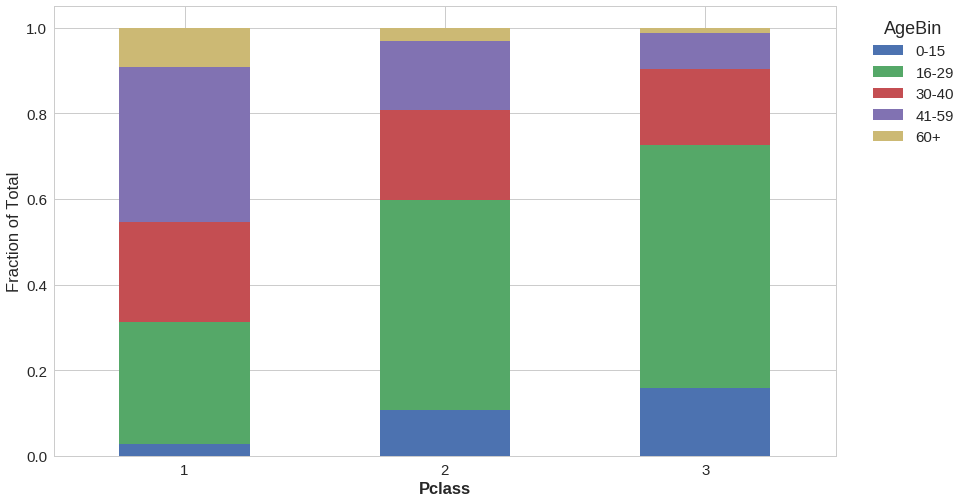

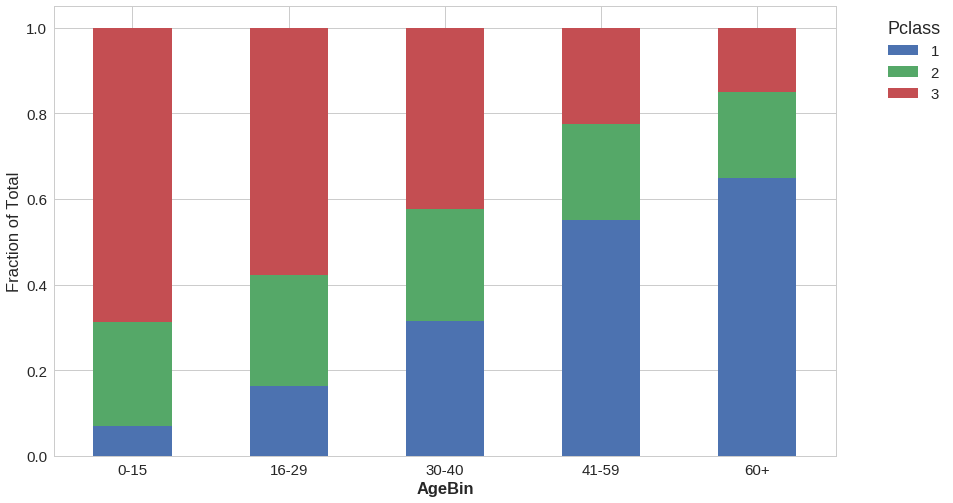

In [51]:
table = pd.crosstab(dataset['Pclass'], dataset['AgeBin'])
print(table)

table_fractions = table.div(table.sum(1).astype(float), axis=0)
g = table_fractions.plot(kind="bar", stacked=True)
plt.xticks(rotation=0)
plt.xlabel('Pclass', weight='bold')
plt.ylabel('Fraction of Total')
leg = plt.legend(title='AgeBin', loc=9, bbox_to_anchor=(1.1, 1.0))


table = pd.crosstab(dataset['AgeBin'], dataset['Pclass'])
print('\n', table)

table_fractions = table.div(table.sum(1).astype(float), axis=0)
g = table_fractions.plot(kind="bar", stacked=True)
plt.xticks(rotation=0)
plt.xlabel('AgeBin', weight='bold')
plt.ylabel('Fraction of Total')
leg = plt.legend(title='Pclass', loc=9, bbox_to_anchor=(1.1, 1.0))


Findings:
* Higher-class passengers were generally older.
* Pclass 1 has the highest fraction of older (41-59) or elderly (60+) passengers. 
* The fraction of passengers aged 30-40 was relatively uniform across all 3 Pclasses. 
* Pclass 3 had the largest proportion of young adults (16-29) and children (0-15). 

These findings are interesting because they tell us that Pclass was not the underlying reason for higher survival for the 30-40 age group, and that the elderly fared poorly in spite of being predominantly Pclass=1. 

It is also interesting that earlier we found the 41-59 bin to have only slightly higher survival than the 16-29 age bin, despite the former having highest proportion in Pclass=1 and the latter having highest proportion in Pclass=3, as if higher age is counteracting some of the benefit of higher class. 

Let's examine the survival of different age bins within each Pclass:


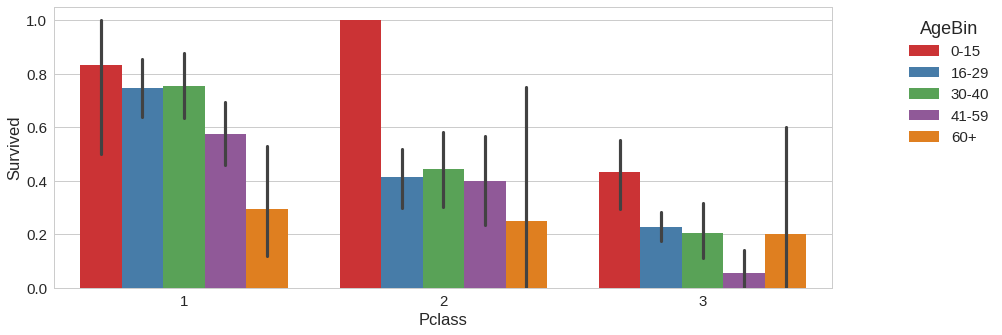

In [52]:
plt.figure(figsize=(12,5))
g = sns.barplot(x="Pclass", y="Survived", hue="AgeBin", data=dataset, palette='Set1')
plt.tight_layout()
leg = plt.legend(title='AgeBin', loc=9, bbox_to_anchor=(1.15, 1.0))


Findings:
* Across all three Pclasses, there appears little difference between the 16-29 and 30-40 age bins. 
* Within Pclasses 1 and 3, survival of the 41-59 bin appears lower than for younger passengers. 

These findings suggest that the higher overall (univariate) survival we found for the 30-40 age group may simply be an artefact of (a) how those passengers are distributed among Pclasses and (b) how survival is influenced by Pclass, rather than an age of 30-40 being an advantage in of itself. However, we do see a general negative effect of age for the 41-59 and 60+ age bins. 

How is this impacted by Sex?


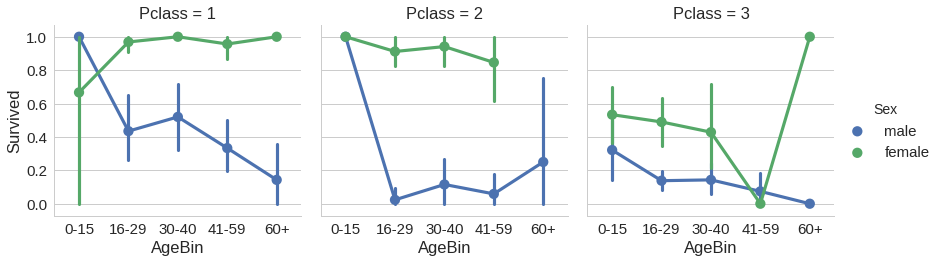

In [53]:
g = sns.factorplot(x="AgeBin", y="Survived", hue="Sex", col="Pclass", data=dataset, ci=95.0)

Findings:
* Within Pclass=1, higher age is significantly worse for male survival than female survival. 
* For Pclasses 2 and 3, both sexes are impacted similarly. 

We can also check these trends against GroupSize, albeit by now we know that trends relating to GroupSize are predominantly derivative of the Sex and Pclass features. 


 GroupSize   1   2   3   4   5   6   7   8   11
AgeBin                                        
0-15         7  17  36  16   7  11  15   5   1
16-29      313  99  39  15   8   7  10   3   0
30-40      105  47  26  15   5   3   6   3   0
41-59       86  57  20  10   9   1   3   1   0
60+         22   9   4   2   0   2   1   0   0


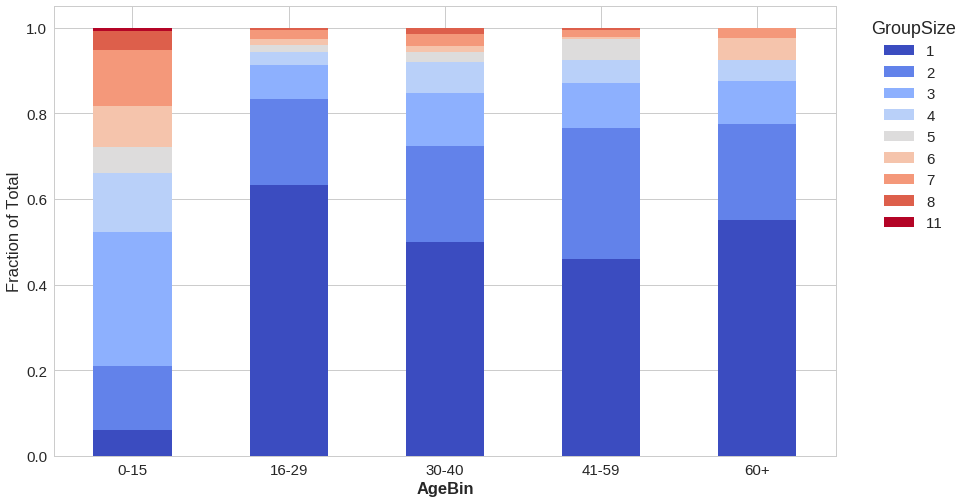

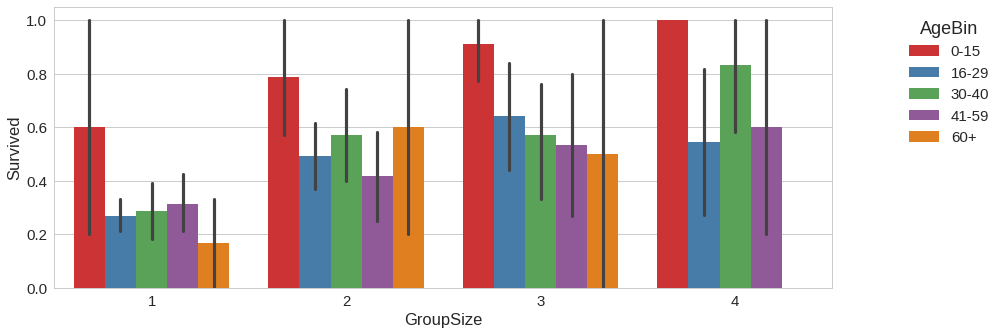

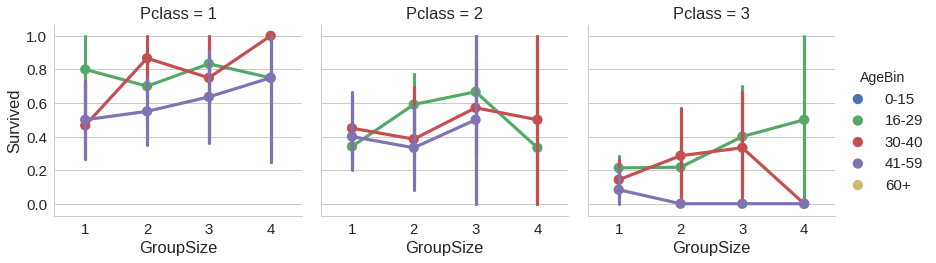

In [54]:
table = pd.crosstab(dataset['AgeBin'], dataset['GroupSize'])
print('\n', table)

table_fractions = table.div(table.sum(1).astype(float), axis=0)
g = table_fractions.plot(kind="bar", stacked=True, colormap='coolwarm')
plt.xticks(rotation=0)
plt.xlabel('AgeBin', weight='bold')
plt.ylabel('Fraction of Total')
leg = plt.legend(title='GroupSize', loc=9, bbox_to_anchor=(1.1, 1.0))


# let's look only at GroupSizes 4 and under
subset = dataset[dataset['GroupSize'] < 5]
plt.figure(figsize=(12,5))
g = sns.barplot(x="GroupSize", y="Survived", hue="AgeBin", data=subset, palette='Set1')
plt.tight_layout()
leg = plt.legend(title='AgeBin', loc=9, bbox_to_anchor=(1.15, 1.0))

# let's make our factorplot easier to read by only considering the middle three AgeBins
subset = subset[subset['AgeBin'] != '0-15']
subset = subset[subset['AgeBin'] != '60+']
g = sns.factorplot(x="GroupSize", y="Survived", hue="AgeBin",  data=subset, col='Pclass', ci=95.0)


Findings:
* 'Unfavourable' GroupSizes are not the reason for the lower survival for AgeBins 41-59 and 60+, because we see those AgeBins in fact tend to have a greater proportion of passengers in 'favourable' GroupSizes (2-4), compared to the younger 16-29 and 30-40 bins. 
* In general, AgeBin 41-59 had lower survival than younger bins *irrespective* of Pclass and GroupSize. 

Conclusions:
* Higher passenger age, specifically 41+ years, has a negative impact on survival, which is most pronounced for first-class males, and is not derivative of the Pclass composition of these Age bins (in fact, it goes against the Pclass trend, since older passengers tend to be of a higher Pclass). 


<a id='section_1_4_i'></a>

### i) Do Groups Tend to Survive or Perish Together?
Next, we set out to answer a simple question: do groups tend to survive or perish together? That is to say, if you know that at least one member of a given group has perished, can this influence the likelihood of other members of that group surviving? 

To investigate such relations, we will focus our attention only on groups of size 2-4 that lie entirely within our training set (i.e. for which we have complete knowledge about survival upon which to base our statistics).

How could this potentially be useful? If we imagine treating the class probabilities predicted by our trained machine-learning model as prior probabilities in the Bayesian sense, then when making our predictions on the test set, we could consider using any available knowledge of same-GroupID member survival from the training set to obtain posterior probabilities that further refine our predictions about a test-set passenger's survival. Or, alternatively, we could simply include 'GroupNumSurvived' or a derived feature as part of our training set. 

Let's first obtain the distribution of our passengers across GroupNumSurvived for different Group Sizes:


GroupNumSurvived   0   1   2   3  4
GroupSize                          
2                 40  40  46   0  0
3                  6   3  24  15  0
4                  0   4   0   4  8


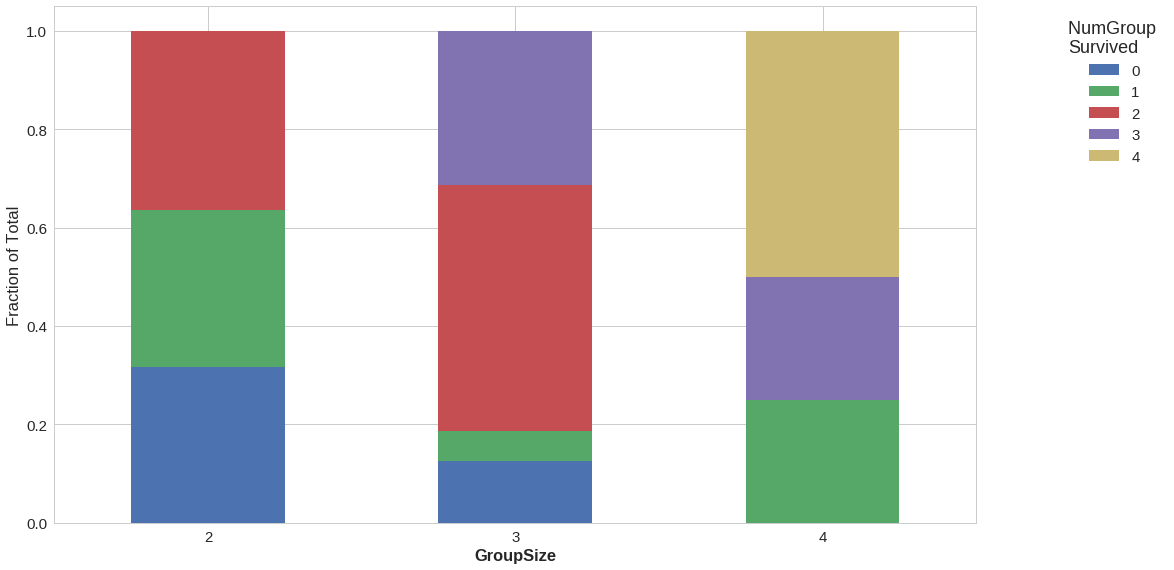

In [55]:
data_subset = dataset[dataset['GroupSize'] == dataset['GroupNumSurvived'] + dataset['GroupNumPerished']]
data_subset = data_subset[data_subset['GroupSize'] > 1][data_subset['GroupSize'] < 5]

table = pd.crosstab(data_subset['GroupSize'], data_subset['GroupNumSurvived'])
print(table)

table_fractions = table.div(table.sum(1).astype(float), axis=0)
g = table_fractions.plot(kind="bar", stacked=True)
plt.xticks(rotation=0)
plt.xlabel('GroupSize', weight='bold')
plt.ylabel('Fraction of Total')
plt.tight_layout()
leg = plt.legend(title='NumGroup \nSurvived', loc=9, bbox_to_anchor=(1.15, 1.0))


We see from the printed table that there are few samples for GroupSize=4 upon which to base our statistics, so we focus here only on GroupSizes 2 and 3.

If we know the survival outcome of one passenger from a given GroupID from our training set, can that provide us with any information about the survival probability for a passenger in the test set that belongs to the same GroupID? Unfortnately, for GroupSize=2, since the probability is distributed roughly evenly between 0, 1, and 2 passengers surviving, knowledge that at least one passenger has survived is not particularly helpful in determining whether the second passenger survived.

On the other hand, for GroupSize=3, the uneven distributions tell us that there is indeed some information to be gained. In this case, looking at the barplot, if at least one passenger from a given GroupID is known to have survived, then we eliminate the bottom blue segment, renormalize the green+red+purple segments to sum to unity, and compare the fraction of red+purple to the fraction of green. We compute prior and posterior probabilities explicitly below:


In [56]:
print('*** GROUPSIZE=2 ***')
print('\nPrior Probability of a Passenger\'s Survival:')
print('%.4f' % data_subset[data_subset['GroupSize'] == 2]['Survived'].mean())

print('\nPosterior Probability given that at least one passenger from that GroupID survived:')
print('%.4f' % (table.values[0][2]/(table.values[0][1:3].sum())))

print('\n*** GROUPSIZE=3 ***')
print('\nPrior Probability of a Passenger\'s Survival:')
print('%.4f' % data_subset[data_subset['GroupSize'] == 3]['Survived'].mean())

print('\nPosterior Probability given that at least one passenger from that GroupID survived:')
print('%.4f' % ((table.values[1][2] + table.values[1][3])/(table.values[1][1:5].sum())))

print('\nPosterior Probability given that at least two passengers from that GroupID survived:')
print('%.4f' % ((table.values[1][3])/(table.values[1][2:5].sum())))
                

*** GROUPSIZE=2 ***

Prior Probability of a Passenger's Survival:
0.5238

Posterior Probability given that at least one passenger from that GroupID survived:
0.5349

*** GROUPSIZE=3 ***

Prior Probability of a Passenger's Survival:
0.6667

Posterior Probability given that at least one passenger from that GroupID survived:
0.9286

Posterior Probability given that at least two passengers from that GroupID survived:
0.3846


The above affirms that for GroupSize=2, even if we know one passenger from a group has survived, this does little to change the likelihood that the other has. 

For GroupSize=3, it appears that if we know one passenger has survived, the likelihood of second surviving is very high, about 26% higher than if we know nothing. However, if we already know that two members of that group have survived, the likelihood that the third survived drops dramatically. 

For completeness, we check whether these general trends hold true when we consider only familes, as opposed to mixed groups:

*** FAMILY-ONLY GROUPS ***
GroupNumSurvived   0   1   2  3  4
GroupSize                         
2                 20  34  38  0  0
3                  3   0  18  6  0
4                  0   0   0  0  8


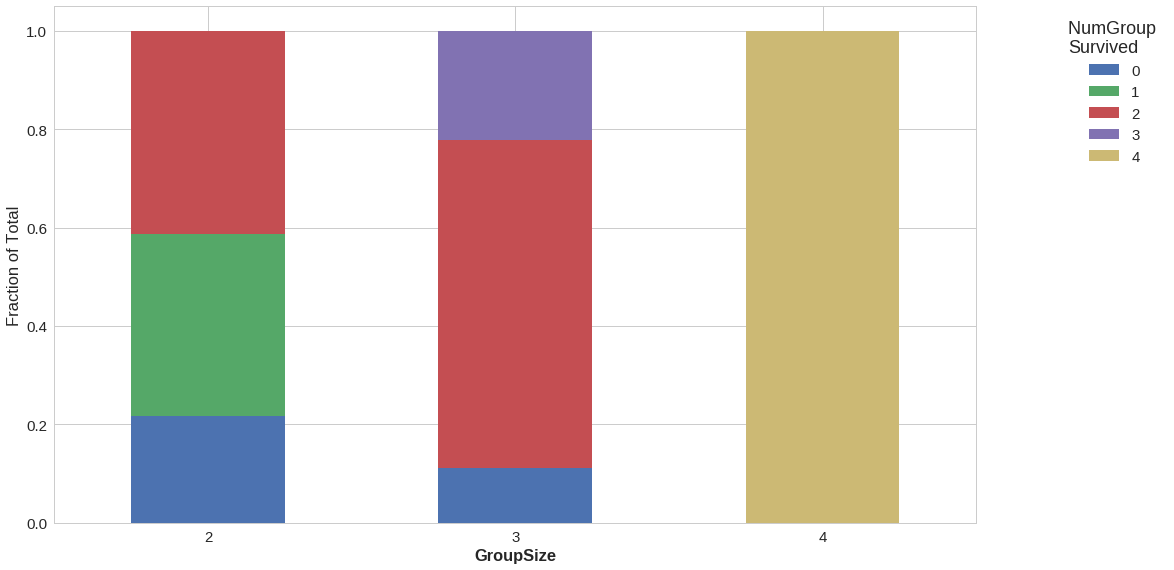

In [57]:
data_subset = dataset[dataset['GroupSize'] == dataset['GroupNumSurvived'] + dataset['GroupNumPerished']]
data_subset = data_subset[data_subset['GroupSize'] > 1][data_subset['GroupSize'] < 5]
data_subset = data_subset[data_subset['GroupType'] == 'Family']

table = pd.crosstab(data_subset['GroupSize'], data_subset['GroupNumSurvived'])
print('*** FAMILY-ONLY GROUPS ***')
print(table)

table_fractions = table.div(table.sum(1).astype(float), axis=0)
g = table_fractions.plot(kind="bar", stacked=True)
plt.xticks(rotation=0)
plt.xlabel('GroupSize', weight='bold')
plt.ylabel('Fraction of Total')
plt.tight_layout()
leg = plt.legend(title='NumGroup \nSurvived', loc=9, bbox_to_anchor=(1.15, 1.0))

We observe that overall, there is a smaller fraction of Family-only groups that perish in their entirety. For GroupSize=2, there is again little difference in the fraction of groups where both members survive versus where only one survives. 

<a id='section_1_5'></a>

## 1.5 - Summary of Key Findings

The most important features appear to be Sex, Pclass, Age, and GroupSize (for GroupSize > 4), in that order. Some of our other interesting findings, that can help guide us in feature selection and classifier creation, are as follows:  


* **Females**: Female Pclass 1 passengers nearly all survived (95%+). Most Pclass 2 female passengers also survived (90%+). This drops sharply for Pclass 3 female passengers (to about 50%), but being a female child increases survival by roughly 5%. 


* **Males**: Most male children in Pclass 1 and 2 survive. For Pclass 3, male children are only about 20% more likely to survive than male adults. For male adults, survival is around 40% for Pclass 1, and around 15% for Pclass 2 and 3.    


* **Age**: Survival increases for children under 16. Going by our AgeBin feature, survival decreases for passengers of age 41+, which is most pronounced for first-class males, and is not derivative of other features. 


* **FamilySize and GroupSize**: When we isolate for Sex and Pclass, we find that the trend of increasing survival with increasing FamilySize or GroupSize (up to a value of 4) disappears! This tells us these trends were derivative of the Pclass and Sex features. However, the sharp drop in survival for FamilySize and GroupSize of 5 or larger is not entirely explainable from just Sex and Pclass. This motivates the creation of a new feature, "LargeGroup", denoting GroupSize > 5. 


* **GroupType**: Passengers in GroupType "Alone" fare the worst, but these also tend to be predominantly male passengers of Pclass 3, who fare poorly anyway. For GroupSize=2, we found that passengers belonging to a Family GroupType had a greater chance of survival than thoses belonging to a non-family GroupType, but as already stated, the behaviour of GroupSize below 5 appears to be mostly determined by Sex and Pclass, so this is not very interesting. If we consider only Sex and not Pclass, survival for females appears best in the 'Mixed' GroupType, closely followed by Non-Family and then Family groups. At low GroupSizes, males do significantly better in Family groups than non-family groups. 


* **SplitFare**: We found that any predictive power of SplitFare *within* each Pclass appeared to be explainable by the associated GroupSizes (with GroupSizes 2, 3, and 4 having better survival) which in turn is explainable via the composition of these GroupSizes in terms of Pclass and Sex. So it would appear that SplitFare doesn't offer any advantage over Pclass. 


* **Embarked**: We found that third-class female passengers appeared to have a much lower survival probability if they embarked at S compared to both C and Q. But it appears this is simply due to the fact that a greater proportion of these females belonged to large GroupSizes (5 and up) which we know has a negative impact on survival. Embarked itself does not appear to offer any additional predictive power, and is therefore not a very interesting feature. 



***

<a id='section_2'></a>

# 2) Data Pre-Processing

<a id='section_2_1'></a>

## 2.1 - Checking Data Consistency

When training predictive models, our underlying assumption is that the data we feed our model is correct and accurate. However, this is indeed an assumption, and is not necessarily always true. Here we check our data for inconsistencies and flag entries that are suspicious. 

Earlier, when defining Groups for passengers sharing the same ticket, we checked for cases where FamilySize=1 but the GroupType was labelled 'Family' due to shared surnames. We found 7 such instances, and determined that these could be passengers with second-degree relations (such as cousins), which are not counted in the ParCh or SibSp metrics. 

We also checked for cases where FamilySize > 1 but GroupType = 'NonFamily'. In most cases, we found many of such cases to be an artefact of females who were travelling under a maiden name rather than their spouse's surname, and we corrected their GroupType to 'Family' accordingly. 

Some additional things we can check for are:
* Agreement between Sex and Title (obviously Miss or Mrs should be female, Mr should be male)
* Agreement of Fare and Embarked port among passengers sharing a ticket
* Age/Parch consistency (see below)


<a id='section_2_1_a'></a>

### a) Title/Sex Inconsistencies

In [58]:
# Checking for Title/Sex inconsistencies
flagged_ids = []
for index, row in dataset.iterrows():
    if row['Title'] in ['Mr', 'Mister', 'Master']:
        if row['Sex'] != 'male':
            flagged_ids.append(index)   
    elif row['Title'] in ['Miss', 'Mrs', 'Mme', 'Mlle']:
        if row['Sex'] != 'female':
            flagged_ids.append(index) 
        
print('Number of Sex/Title Inconsistencies:', len(flagged_ids))
        

Number of Sex/Title Inconsistencies: 0


<a id='section_2_1_b'></a>

### b) Embarked/Fare Inconsistencies within Groups

In [59]:
# Checking for group inconsistencies in Embarked or Fare
flagged_group_ids = []
for (group_id, group) in dataset.groupby('GroupID'):
    if len(set(group['Embarked'].values)) != 1 or len(set(group['Fare'].values)) != 1:
        flagged_group_ids.append(group_id)
        
print('Number of Embarked/Fare Inconsistencies within shared ticket groups:',
      len(flagged_group_ids))
    

Number of Embarked/Fare Inconsistencies within shared ticket groups: 3


In [60]:
# Exploring the flagged Embarked/Fare group inconsistencies
feature_list = ['GroupID', 'GroupSize', 'Name', 'PassengerId', 'Ticket', 'Fare', 'Embarked']
dataset[dataset['GroupID'].isin(flagged_group_ids)][feature_list].sort_values('GroupID').head(10)


GroupID  GroupSize                                   Name  PassengerId  \
270       63          2                  Cairns, Mr. Alexander          271   
842       63          2                Serepeca, Miss. Augusta          843   
138      692          2                    Osen, Mr. Olaf Elon          139   
876      692          2          Gustafsson, Mr. Alfred Ossian          877   
269      837          4                 Bissette, Miss. Amelia          270   
325      837          4               Young, Miss. Marie Grice          326   
373      837          4                    Ringhini, Mr. Sante          374   
314      837          4  White, Mrs. John Stuart (Ella Holmes)         1206   

       Ticket      Fare Embarked  
270    113798   31.0000        S  
842    113798   31.0000        C  
138      7534    9.2167        S  
876      7534    9.8458        S  
269  PC 17760  135.6333        S  
325  PC 17760  135.6333        C  
373  PC 17760  135.6333        C  
314  PC 17760  135.6333        C

Findings:

* For GroupID=692, we find the only case where passengers sharing a ticket are listed has having slightly different fares. It's not clear why this is the case, but the fare values are sufficiently close enough that we need not take action. 

* For GroupIDs 63 and 837, not all passengers are listed as having embarked at the same port. We can do some quick research about these passengers to check whether this is an error. 

An online search of biographic profiles for these passengers shows that Mr. Alexander Cairns and Miss Augusta Serepeca both embarked in Southhampton; so the 'C' listed as embarked for the latter is an error. Likewise, our research finds that Miss Amelia Bissette embarked in Cherbourg, not Southhampton. We make these corrections below. 


In [61]:
# Corrections
dataset['Embarked'][dataset['PassengerId'] == 843] = 'S'
dataset['Embarked'][dataset['PassengerId'] == 270] = 'C'

## Verification
# dataset[dataset['GroupID'].isin(flagged_group_ids)][feature_list].sort_values('GroupID').head(10)


<a id='section_2_1_c'></a>

### c) Age/Parch Inconsistencies

Finally, if you are a passenger below the age of 16, it's safe to assume that you are a child, and hence that your value for 'Parch' should be no greater than 2. We check this below:

In [62]:
# Checking for group inconsistencies in Age/Parch
flagged_ids = []
for _, row in dataset.iterrows():
    if row['Age'] <= 16:
        if row['Parch'] > 2:
            flagged_ids.append(row['PassengerId'])   
     
print('Number of Sex/Title Inconsistencies:', len(flagged_ids))


Number of Sex/Title Inconsistencies: 1


We found a single inconsistency. Let's investigate this in more detail:

In [63]:
dataset[dataset['PassengerId'].isin(flagged_ids)].head()

Age Cabin Embarked    Fare                    Name  Parch  PassengerId  \
86  16.0   NaN        S  34.375  Ford, Mr. William Neal      3           87   

    Pclass   Sex  SibSp    ...      GroupNumPerished LargeGroup  AgeBin  \
86       3  male      1    ...                     4          1   16-29   

   SplitFare log10Fare  log10SplitFare  AgeBin_v1         FareBin  \
86     6.875  1.548696        0.896251   (15, 20]  (1.084, 1.626]   

      SplitFareBin  CabinDeck  
86  (0.844, 1.055]        NaN  

[1 rows x 30 columns]

This appears to be a mistake. A little background research shows that Mr. William Neal Ford boarded with his mother and three siblings:
* Margaret Ann Watson Ford (mother)
* Robina Maggie Ford (sister)
* Dollina Margaret Ford (sister)
* Edward Watson Ford (brother)

It appears that his entries for Parch and SibSp may have been accidentally swapped. Let's double check with other members of his GroupID:

In [64]:
flagged_group_id = dataset[dataset['PassengerId'].isin(flagged_ids)]['GroupID'].values
print('GroupID:', flagged_group_id)

dataset[dataset['GroupID'].isin(flagged_group_id)].head()

GroupID: [925]


Age Cabin Embarked    Fare                                     Name  \
86   16.0   NaN        S  34.375                   Ford, Mr. William Neal   
147   9.0   NaN        S  34.375         Ford, Miss. Robina Maggie "Ruby"   
436  21.0   NaN        S  34.375     Ford, Miss. Doolina Margaret "Daisy"   
736  48.0   NaN        S  34.375  Ford, Mrs. Edward (Margaret Ann Watson)   
167  18.0   NaN        S  34.375                  Ford, Mr. Edward Watson   

     Parch  PassengerId  Pclass     Sex  SibSp    ...      GroupNumPerished  \
86       3           87       3    male      1    ...                     4   
147      2          148       3  female      2    ...                     4   
436      2          437       3  female      2    ...                     4   
736      3          737       3  female      1    ...                     4   
167      2         1059       3    male      2    ...                     4   

    LargeGroup  AgeBin SplitFare log10Fare  log10SplitFare  AgeBin_v1  \
86           1   16-29     6.875  1.548696        0.896251   (15, 20]   
147          1    0-15     6.875  1.548696        0.896251    (5, 10]   
436          1   16-29     6.875  1.548696        0.896251   (20, 25]   
736          1   41-59     6.875  1.548696        0.896251   (45, 50]   
167          1   16-29     6.875  1.548696        0.896251   (15, 20]   

            FareBin    SplitFareBin  CabinDeck  
86   (1.084, 1.626]  (0.844, 1.055]        NaN  
147  (1.084, 1.626]  (0.844, 1.055]        NaN  
436  (1.084, 1.626]  (0.844, 1.055]        NaN  
736  (1.084, 1.626]  (0.844, 1.055]        NaN  
167  (1.084, 1.626]  (0.844, 1.055]        NaN  

[5 rows x 30 columns]

Margaret Ann Watson Ford (mother) did have one sibling on board, namely Eliza Johnston. However, however her Parch count is clearly incorrect (it should be 4). The siblings Edward, 'Doolina' \[sic\], and Robina all have Parch=2 (should be 1) and SibSp=2 (should be 3). Further research shows that Margaret Ann Watson Ford's husband had deserted her and her family, so we can verify that he wasn't on board. So it seems in all of these cases that somehow William Neal Ford was treated as the husband of his own mother (whoops!) when the entries for Parch and Sibsp were filled!  Let's correct this: 

In [65]:
# Corrections
sibling_passengerIds = [87, 148, 437, 1059]
mother_passengerId = 737

dataset['Parch'][dataset['PassengerId'].isin(sibling_passengerIds)] = 1
dataset['Parch'][dataset['PassengerId'] == mother_passengerId] = 4
dataset['SibSp'][dataset['PassengerId'].isin(sibling_passengerIds)] = 3

## Verification
# dataset[dataset['GroupID'].isin(flagged_group_id)].head()

<a id='section_2_2'></a>

## 2.2 - Identifying Outliers

Outliers are defined as samples that are exceptionally far from typical values. They may be the result of errors in data recording, or they may in fact contain important information significant to the task at hand. Identifying and understanding outliers is an therefore an important task in ensuring that the data we use to train our models is of high quality. 

There are several mathematical models for identifying outliers, but the choice of criteria is ultimately subjective. Some common models include:
* z-score (parametric) or the IQR method (non-parametric)
* linear regression models, e.g. with Principal Component Analysis (PCA) or Least-Mean Squares (LMS)
* proximity-based models such as cluster analysis including Dbscan

The two most basic models, applicable to univariate analysis, are the **z-score** (e.g. how many standard deviations away from the mean is a given sample) and the **interquartile range (IQR) method**. The z-score is a parametric method that assumes the data fits a Gaussian model and is symetrically distributed, while the IQR method is non-parametric and makes no such assumptions.

We will look only at univariate outliers using the more-general IQR method. The IQR is defined as the difference between the value denoting the 3rd quartile (Q3, delineating the bottom 75% of all values) and the value denoting the 1st quartile (Q1, delineating the bottom 25% of all values). Exactly 50% of all datapoints are contained within the IQR. Outliers are typically taken to be datapoints that fall beyond the "Tukey Fences" (named after mathematician John Tukey of Box-Plot and Fast-Fourier-Transform fame) defined by $(Q1 - 1.5*IQR)$ and $(Q3 + 1.5 *IQR)$, i.e. more than 1.5 times the interquartile range below the first quartile or above the third quartile. The motivation behind the factor of 1.5 x IQR is that it corresponds approximately to 3 standard deviations away from the mean (the 99.7% confidence interval) *in the special case that our data is symmetrically Gaussian distributed*; more generally, it is a rough analogy of this common "three-sigma" rule of thumb. 

<a id='section_2_2_a'></a>

### a) Finding the Outliers

Below we define a function that returns the PassengerID of all data entries containing outliers within the specified feature list, as well as a count of how many different features for that PassengerID contained outliers:

In [66]:
def get_outliers_IQRmethod(dataframe, features, fence_factor=1.5):
    """
    Returns a list of PassengerIds for which outliers were detected, as well as the number of outlying features
    for that passenger, based on the interquartile range (IQR) method.
    
    :param dataframe: Our data, as a Pandas dataframe object. 
    
    :param features: A list of features we want to search for outliers. 
    
    :param fence_factor: How many IQRs below Q1 or above Q3 a point must be, for it to be considered
                         an outlier; nominally 1.5 for Tukey fences. 
    
    :return ids: A sorted list of PassengerIds where outliers were detected 
    
    :return counts: The corresponding list of how many feature outliers were counted per entry in 'ids'. 
        
    """
    tagged_ids_ = []
    for feature_ in features:
        
        data_ = dataframe.dropna(subset=[feature_]).copy()  # drop missing entries
                
        q1, q3 = np.percentile(data_[feature_], [25, 75])  # obtain 1st and 3rd quartiles
        iqr = q3 - q1  # interquartile range (positive-valued by definition) 
        
        print('Feature:', feature_)
        print('--> Q1 is:', q1)
        print('--> Q3 is:', q3)
        print('--> IQR is:', iqr)
        
        outlier_ids_ = data_[(data_[feature_] < q1 - fence_factor*iqr) 
                             | (data_[feature_] > q3 + fence_factor*iqr)]['PassengerId'].values
        
        tagged_ids_.extend(outlier_ids_)
        # note: using extend instead of append to avoid nested lists
        
    # tally up outlier occurences with Counter
    outlier_counter = Counter(tuple(tagged_ids_))  # tuple() makes input hashable 
    ids_ = outlier_counter.keys()  # gives the unique set of tagged indices
    counts_ = outlier_counter.values()
    print('Number of Flagged Entries:', len(ids_))
    
    ids_, counts_ = zip(*sorted(zip(ids_, counts_)))  # sort in ascending order
    
    return ids_, counts_


def outlier_filter(ids_, counts_, count_threshold=2):
    """
    Returns only the PassengerIds in which the number of outlying features counted was 'count_threshold'
    or greater. 
    """
    return [i for i, count_ in zip(ids_, counts_) if count_ >= count_threshold]


Some features we may consider examining are Fare, Age, and FamilySize. It's useful here to look again at some basic univariate statistics:

In [67]:
feature_list = ['Fare', 'Age', 'FamilySize']
dataset[feature_list].describe()

Fare          Age   FamilySize
count  1308.000000  1046.000000  1309.000000
mean     33.295479    29.881138     1.883881
std      51.758668    14.413493     1.583639
min       0.000000     0.170000     1.000000
25%       7.895800    21.000000     1.000000
50%      14.454200    28.000000     1.000000
75%      31.275000    39.000000     2.000000
max     512.329200    80.000000    11.000000

The 25% and 75% rows show us the values associated with the 1st and 3rd quartiles respectively. We find immediately:
* **Fare**: The max value of Fare is 512. We might consider examing Fare outliers within each Pclass, rather than across all Pclasses, to ensure that high fare values are being considered within the appropriate context. 
* **Age**: There aren't any obviously erroneous (i.e. non-physical) entries for Age. We won't worry about outliers in Age as we can easily understand the IQR-method outliers (which we can easily calculate to be seniors above 66 in this case). 
* **FamilySize**: The max value of FamilySize is 11. This is many IQRs from Q3 due to the large number of lone passengers. We might consider only looking at FamilySize outliers for cases where GroupType is not 'Alone'. 

Let's first look at FamilySize for GroupTypes != IsAlone:

In [68]:
FS_outlier_ids, _ = get_outliers_IQRmethod(dataset[dataset['GroupType'] != 'IsAlone'], ['FamilySize'])

# let's look at some of the flagged entries
feature_list = ['PassengerId', 'Name', 'FamilySize', 'GroupType', 'Parch', 'SibSp']
dataset[dataset['PassengerId'].isin(FS_outlier_ids)][feature_list].head(10)


Feature: FamilySize
--> Q1 is: 2.0
--> Q3 is: 3.0
--> IQR is: 1.0
Number of Flagged Entries: 80


PassengerId                                               Name  \
7             8                     Palsson, Master. Gosta Leonard   
13           14                        Andersson, Mr. Anders Johan   
16           17                               Rice, Master. Eugene   
24           25                      Palsson, Miss. Torborg Danira   
25           26  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...   
27           28                     Fortune, Mr. Charles Alexander   
50           51                         Panula, Master. Juha Niilo   
59           60                 Goodwin, Master. William Frederick   
63           64                              Skoog, Master. Harald   
71           72                         Goodwin, Miss. Lillian Amy   

    FamilySize GroupType  Parch  SibSp  
7            5    Family      1      3  
13           7    Family      5      1  
16           6    Family      1      4  
24           5    Family      1      3  
25           7    Family      5      1  
27           6    Family      2      3  
50           6     Mixed      1      4  
59           8    Family      2      5  
63           6    Family      2      3  
71           8    Family      2      5

This seems to be flagging passengers belonging to groups with FamilySize 5 or greater. Let's now look at the more nuanced case of Fare. There are several versions of this variable we can consider (Fare, SplitFare, and their log10 versions). Using Seaborne's boxplots, we can directly visualize the IQR-method outliers as points on these plots: 

*Note: the boxes themselves give the limits of Q1 and Q3, subdivided by a black line at Q2, while the whiskers show the max and min values of the data range excluding the outliers.*

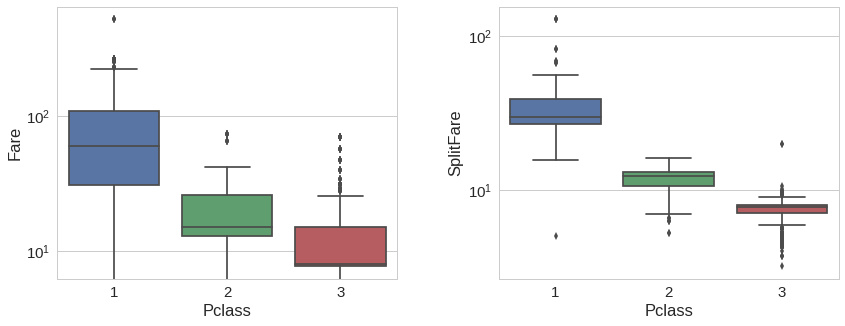

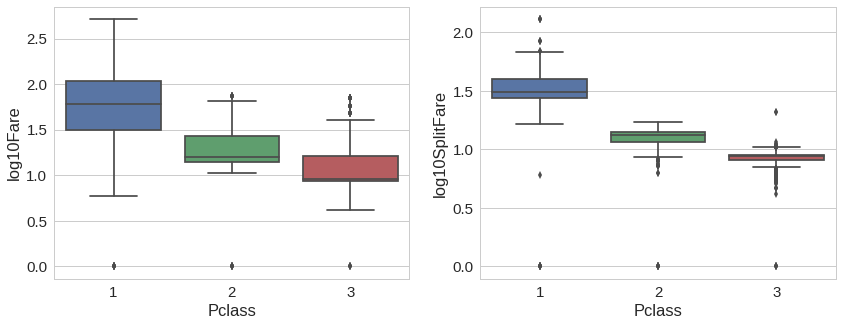

In [69]:
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(x="Pclass", y="Fare", data=dataset)
ax.set_yscale('log')
ax = fig.add_subplot(1, 2, 2)
ax = sns.boxplot(x="Pclass", y="SplitFare", data=dataset)
ax.set_yscale('log')

sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(x="Pclass", y="log10Fare", data=dataset)
ax = fig.add_subplot(1, 2, 2)
ax = sns.boxplot(x="Pclass", y="log10SplitFare", data=dataset)

Earlier we had said that SplitFare seems to be better than Fare at clearly delineating between classes. And indeed there was evidence to suggest that the Ticket price was cumulative for all passengers. So let's work with SplitFare. But should we use a linear or logarithmic representation? Let's use linear in this case (the choice is subjective). We'll look for outliers in each individual class separately, and then pool the flagged passengers together at the end. Using the typical 1.5 x IQR Tukey fences returns a heck of a lot of outliers (160), so we'll widen our fences to 3.0 x IQR to focus on those points that are furthest from typical values. 

In [70]:
splitfare_outlier_ids = []
for pclass_ in [1, 2, 3]:
    print('\nPclass:', pclass_)
    outlier_ids, _ = get_outliers_IQRmethod(dataset[dataset['Pclass'] == pclass_], ['SplitFare'], fence_factor=3.0)
    splitfare_outlier_ids.extend(outlier_ids)
    print('Note: mean SplitFare is:', dataset[dataset['Pclass']==pclass_]['SplitFare'].mean())

print('\nTotal Number of Flagged Entries:', len(splitfare_outlier_ids))



Pclass: 1
Feature: SplitFare
--> Q1 is: 26.55
--> Q3 is: 38.64375
--> IQR is: 12.093749999999996
Number of Flagged Entries: 7
Note: mean SplitFare is: 33.91050030959752

Pclass: 2
Feature: SplitFare
--> Q1 is: 10.5
--> Q3 is: 13.0
--> IQR is: 2.5
Number of Flagged Entries: 6
Note: mean SplitFare is: 11.411010108303248

Pclass: 3
Feature: SplitFare
--> Q1 is: 7.06003125
--> Q3 is: 7.925
--> IQR is: 0.8649687500000001
Number of Flagged Entries: 18
Note: mean SplitFare is: 7.329145550847457

Total Number of Flagged Entries: 31


Examining the flagged entries:

In [71]:
feature_list = ['PassengerId', 'Name', 'GroupSize', 'GroupID', 'Pclass', 'Fare', 'SplitFare', 'Ticket']
dataset[dataset['PassengerId'].isin(splitfare_outlier_ids)][feature_list].sort_values(['Pclass', 'GroupID']).head(31)

PassengerId                                               Name  \
118          119                           Baxter, Mr. Quigg Edmond   
299          300    Baxter, Mrs. James (Helene DeLaudeniere Chaput)   
184         1076  Douglas, Mrs. Frederick Charles (Mary Helene B...   
258          259                                   Ward, Miss. Anna   
679          680                 Cardeza, Mr. Thomas Drake Martinez   
737          738                             Lesurer, Mr. Gustave J   
343         1235  Cardeza, Mrs. James Warburton Martinez (Charlo...   
277          278                        Parkes, Mr. Francis "Frank"   
413          414                     Cunningham, Mr. Alfred Fleming   
466          467                              Campbell, Mr. William   
481          482                   Frost, Mr. Anthony Wood "Archie"   
732          733                               Knight, Mr. Robert J   
674          675                         Watson, Mr. Ennis Hastings   
803          804                    Thomas, Master. Assad Alexander   
104          996          Thomas, Mrs. Alexander (Thamine Thelma")"   
378          379                                Betros, Mr. Tannous   
8              9  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
172          173                       Johnson, Miss. Eleanor Ileen   
869          870                    Johnson, Master. Harold Theodor   
7              8                     Palsson, Master. Gosta Leonard   
24            25                      Palsson, Miss. Torborg Danira   
374          375                         Palsson, Miss. Stina Viola   
567          568        Palsson, Mrs. Nils (Alma Cornelia Berglund)   
389         1281                        Palsson, Master. Paul Folke   
451          452                    Hagland, Mr. Ingvald Olai Olsen   
490          491               Hagland, Mr. Konrad Mathias Reiersen   
21           913                          Olsen, Master. Artur Karl   
179          180                                Leonard, Mr. Lionel   
271          272                       Tornquist, Mr. William Henry   
302          303                    Johnson, Mr. William Cahoone Jr   
597          598                                Johnson, Mr. Alfred   

     GroupSize  GroupID  Pclass      Fare   SplitFare    Ticket  
118          3      801       1  247.5208   82.506933  PC 17558  
299          3      801       1  247.5208   82.506933  PC 17558  
184          3      801       1  247.5208   82.506933  PC 17558  
258          4      832       1  512.3292  128.082300  PC 17755  
679          4      832       1  512.3292  128.082300  PC 17755  
737          4      832       1  512.3292  128.082300  PC 17755  
343          4      832       1  512.3292  128.082300  PC 17755  
277          3      179       2    0.0000    0.000000    239853  
413          3      179       2    0.0000    0.000000    239853  
466          3      179       2    0.0000    0.000000    239853  
481          1      180       2    0.0000    0.000000    239854  
732          1      181       2    0.0000    0.000000    239855  
674          1      182       2    0.0000    0.000000    239856  
803          2      234       3    8.5167    4.258350      2625  
104          2      234       3    8.5167    4.258350      2625  
378          1      243       3    4.0125    4.012500      2648  
8            3      478       3   11.1333    3.711100    347742  
172          3      478       3   11.1333    3.711100    347742  
869          3      478       3   11.1333    3.711100    347742  
7            5      542       3   21.0750    4.215000    349909  
24           5      542       3   21.0750    4.215000    349909  
374          5      542       3   21.0750    4.215000    349909  
567          5      542       3   21.0750    4.215000    349909  
389          5      542       3   21.0750    4.215000    349909  
451          1      681       3   19.9667   19.966700     65303  
490          1  

Comments:
* **Passengers in Pclass = 1**: Flagged passengers had some truly high values for Fare and SplitFare! We can try to verify these numbers with research. 
* **Passengers in Pclass = 2**: Flagged passengers had 0.0 listed for Fare price. We should investigate the reason why. 
* **Passengers in Pclass = 3**: We have two instances of truly high Pclass=3 splitfares (for Mr. Ingvald Hagland Mr. Konrad Hagland) that exceed the mean SplitFare for Pclass=2! We have one case (for GroupID=788) where 0.0 was given as the Fare price. We also have several other cases of unusually low SplitFare such as for GroupIDs 542, 478, and 234.  


Let's see if we can better understand or explain some of these SplitFare outliers. Findings from online research:

* **Pclass = 1**: The high ticket prices for the Cardezas and their co-travellers (at £512 cumulative) is correct! They occupied one of the two most luxurious suites on board. You can read about their accomodations <a href="http://time.com/money/4283738/titanic-most-expensive-ticket/" target="_blank">here</a>. The high ticket price for Mr. Quigg Baxter is also verifiable. 

* **Pclass = 2**: All of the second-class passengers with a £0.00 listed fare belonged to the nine-person "guarantee group" of Harland and Wolff employees (the Titanic's shipbuilders) that were honorarily chosen to accompany the Titanic on its maiden voyage to oversee its smooth running and identify any necessary improvements. All members of this group travelled free of charge. Six were in second-class, which we see in our table above. The three other members, including the Titanic's chief naval architect Mr. Tomas Andrews, travelled first class. The first-class members of the guarantee group also have fares of £0.00, but our wide IQR fences did not treat these as outliers. We will nonetheless make note of this. The full list of the nine-member guarantee-group, along with their passenger ids in parentheses, is given below. For the curious, more information about them can be found on <a href="http://channel.nationalgeographic.com/titanic-100-years/galleries/titanic-the-guarantee-group-gallery/at/harland-wolff-shipyard-workers-going-home-47882/" target="_blank">this National Geographic webpage</a>.



> **The Guarantee Group**:
> 1. ANDREWS, Mr Thomas (807)
> 2. CAMPBELL, Mr William (467)
> 3. CHISHOLM, Mr Roderick (1158)
> 4. CUNNINGHAM, Mr Alfred Fleming (414)
> 5. FROST, Mr Anthony Wood (482)
> 6. KNIGHT, Mr Robert (733)
> 7. PARKES, Mr Francis (278)
> 8. PARR, Mr William Henry Marsh (634)
> 9. WATSON, Mr Ennis Hastings (675)



* **Pclass = 3**: Our research verifies the unusually low splitfares for GroupIDs 234, 243, 478, 542, and 742. In the first four cases, the combination of large families and likely a family-rate discount helped bring SplitFare down. For Artur Olsen, he had been transferred as a passenger from another ocean linear (the Philadelphia) whose voyage was cancelled, so it's possible his low ticket price reflects a discount or the lower fare he paid for the Philadelphia. On the other hand, the high-fare entries for Mr. Ingvald Hagland and Mr. Konrad Hagland appear incorrect. External sources show their ticket price as being £6 19s 4d (six pounds, 19 shillings and fourpence = £6.966); it may be that the 19 shillings were erroneously recorded as 19 pounds --- we will correct this. As for the passengers with a fare of £0.00, it turns out these were employees of the company American Line, who were due to sail with the Philadelphia, but were transferred to the Titanic when the Philadelphia's voyage was cancelled. Hence why their ticket is labelled "LINE". It's not clear whether these were treated as 'passengers', or whether they served as crew but in passenger cabins. 

We will decide what to do about these outliers shortly. But first, let's fix the incorrect fares for the Haglands:

In [72]:
# correcting the Fare entry for the Mr. Konrad and Ingvald Hagland
passenger_ids = [452, 491]
dataset['Fare'][dataset['PassengerId'].isin(passenger_ids)] = 6.966
dataset['SplitFare'][dataset['PassengerId'].isin(passenger_ids)] = 6.966  # GroupSize=1 for both

# let's also remove these passengers from our flagged splitfare outlier IDs
print('Length of splitfare_outlier_ids Before:', len(splitfare_outlier_ids))
splitfare_outlier_ids = [x for x in splitfare_outlier_ids if x not in passenger_ids]
print('Length of splitfare_outlier_ids After:', len(splitfare_outlier_ids))

# viewing our changes
feature_list = ['PassengerId', 'Name', 'Fare', 'SplitFare']
dataset[feature_list][dataset['PassengerId'].isin(passenger_ids)].head()

Length of splitfare_outlier_ids Before: 31
Length of splitfare_outlier_ids After: 29


PassengerId                                  Name   Fare  SplitFare
451          452       Hagland, Mr. Ingvald Olai Olsen  6.966      6.966
490          491  Hagland, Mr. Konrad Mathias Reiersen  6.966      6.966

As a side note, we can also identify passengers who had outliers for multiple features:

In [73]:
combined_flagged_ids = tuple(FS_outlier_ids) + tuple(splitfare_outlier_ids)

combined_outliers = Counter(tuple(combined_flagged_ids))  # tuple() makes input hashable 
unique_ids = combined_outliers.keys()  # gives the unique set of tagged Passenger IDs
outlier_counts = combined_outliers.values()  # gives corresponding number of outlying features for that ID
unique_ids, outlier_counts = zip(*sorted(zip(unique_ids, outlier_counts)))  # sort in ascending order

filtered_outlier_ids = outlier_filter(unique_ids, outlier_counts, count_threshold=2)

print('Number of passengers having more than one outlying feature:', len(filtered_outlier_ids))
print('Flagged PassengerIds:', filtered_outlier_ids)

Number of passengers having more than one outlying feature: 5
Flagged PassengerIds: [8, 25, 375, 568, 1281]


<a id='section_2_2_b'></a>

### b) What To Do With Our Outliers?

On one hand, some (but not all) machine learning algorithms can be highly sensitive to outliers, adversely impacting model accuracy. On the other hand, we want to be careful when considering the removal of outliers as they may contain information significant to our model. A safe rule-of-thumb is to remove an outlier only when there is clear evidence that it represents an error in data recording or input. If we can verify that an outlier in fact represents a true observation, we should generally include it in our model training. 

There can be extenuating circumstances, however, such as if there exists evidence to suggest that the outlier, given its context, belongs to a model that should be treated separately from the model we are considering. For example, we have noticed from our Fare outliers that several of our 'passengers' were actually employees of the shipbuilding company or of a related ocean liner (e.g. the 'guarantee group' and the American Line employees). There is historical evidence to suggest that crew survival should be treated as a separate model. One can find numerous reports of the technical staff taking heroic efforts or giving passengers full lifeboat priority and choosing to go down with the ship due to their principles and feeling of responsibility. The Titanic's orchestra continued to play on the top deck to help calm passengers nerves', and perished. The Titanic's chief naval architect Thomas Andrews (who perished according to our traning dataset) was seen tirelessly searching staterooms to urge reluctant passengers to go up on deck. And from our ealier KDE univariate plot of Fare, we found that all those with a Fare entry of 0.0 died! So we may choose to withold these particular samples from our model training. 

If we are still concerned about the impact of a non-erroneous outlier on our model, there are several means of assessing its influence. Some of these methods, not covered here, include regression-based techniques such as:

* Influence on Single Fitted Value (DFITS)
* Influence on All Fitted Values ("Cook's Distance")

*We will take the following actions listed below:*
> * We have 8 'passengers' who are actually employees of the Titanic's shipbuilders (the 'guarantee group') and whose survival we believe fits a 'crew' model rather than the 'passenger' model. We will label these individuals with a new feature, 'IsGG', and experiment with including them versus excluding them from our model training. 
> * We have four passengers belonging to another Ocean Liner company (American Line); we don't know whether these employees were on 'active duty' (e.g. to effectively cover their voyage on the Titanic). We will choose to keep them as part of our training dataset. 
> * All other 'outliers' were either corrected or verified. We will keep these in our training dataset. 


***Creation of the 'IsGG' feature for the Guarantee Group***:

In [74]:
guarantee_group_ids = [278, 414, 467, 482, 634, 675, 733, 807, 1158]
dataset['IsGG'] = np.where(dataset['PassengerId'].isin(guarantee_group_ids), 1, 0)

feature_list = ['PassengerId', 'Name', 'Pclass', 'Fare', 'Age', 'IsGG']
dataset[feature_list][dataset['PassengerId'].isin(guarantee_group_ids)].head(20)

PassengerId                                   Name  Pclass  Fare   Age  \
277          278            Parkes, Mr. Francis "Frank"       2   0.0   NaN   
413          414         Cunningham, Mr. Alfred Fleming       2   0.0   NaN   
466          467                  Campbell, Mr. William       2   0.0   NaN   
481          482       Frost, Mr. Anthony Wood "Archie"       2   0.0   NaN   
633          634          Parr, Mr. William Henry Marsh       1   0.0   NaN   
674          675             Watson, Mr. Ennis Hastings       2   0.0   NaN   
732          733                   Knight, Mr. Robert J       2   0.0   NaN   
806          807                 Andrews, Mr. Thomas Jr       1   0.0  39.0   
266         1158  Chisholm, Mr. Roderick Robert Crispin       1   0.0   NaN   

     IsGG  
277     1  
413     1  
466     1  
481     1  
633     1  
674     1  
732     1  
806     1  
266     1

<a id='section_2_3'></a>

## 2.3 - Dealing with Missing Feature Entries

We will consider missing entries for the following features:
* Age (263)
* Embarked (2)
* Fare (1)

Note that in fact we can look up these missing values via online research. However, here we shall take the approach typical of most datasets, and work only with the information that we have (as if other sources for filling this data weren't available). 


<a id='section_2_3_a'></a>

### a) Embarked and Fare

Embarked and Fare can be dealt with through simple imputation, given the low number of missing values. Let's view these entries:

In [75]:
# showing the entries missing Fare
feature_list = ['PassengerId', 'Name', 'Fare', 'SplitFare', 'Sex', 'Pclass', 'GroupSize']
print('Passengers missing \'Fare\' Entry:')
dataset[feature_list][dataset['Fare'].isnull()].head()

Passengers missing 'Fare' Entry:


PassengerId                Name  Fare  SplitFare   Sex  Pclass  GroupSize
152         1044  Storey, Mr. Thomas   NaN        NaN  male       3          1

In [76]:
# showing the entries missing Embarked
feature_list = ['PassengerId', 'Name', 'Embarked', 'Sex', 'Pclass', 'GroupSize', 'GroupID']
print('Passengers missing \'Embarked\' Entry:')
dataset[feature_list][dataset['Embarked'].isnull()].head()

Passengers missing 'Embarked' Entry:


PassengerId                                       Name Embarked     Sex  \
61            62                        Icard, Miss. Amelie      NaN  female   
829          830  Stone, Mrs. George Nelson (Martha Evelyn)      NaN  female   

     Pclass  GroupSize  GroupID  
61        1          2       43  
829       1          2       43

* For Embarked, we choose to substitute the most common embarkment point for a member of the same Pclass and Sex. 

* For Fare, for which the one missing entry corresponds to a lone passenger in Pclass=3, we will substitute the mean Fare for members of Pclass=3 having GroupSize=1. 

These actions are taken below:

In [77]:
# fare correction
mean_val = dataset[((dataset['Pclass'] == 3) & 
                    (dataset['GroupSize'] == 1))][['Fare']].mean().values[0]
print('Mean \'Fare\' for lone traveller in Pclass = 3:', mean_val)
dataset['Fare'][dataset['PassengerId'] == 1044] = mean_val
dataset['SplitFare'][dataset['PassengerId'] == 1044] = mean_val

# embarked correction
mean_val = dataset[(dataset['Pclass'] == 1) & (dataset['Sex'] == 'female')]['Embarked'].value_counts().index[0]
print('Most common \'Embarked\' for females in Pclass = 1:', mean_val)
dataset['Embarked'][dataset['PassengerId'].isin([62, 830])] = mean_val

# verifying our changes:
passengerid_list = [1044, 62, 830]
feature_list = ['PassengerId', 'Name', 'Fare', 'SplitFare', 'Embarked', 
                'Sex', 'Pclass', 'GroupSize']
dataset[feature_list][dataset['PassengerId'].isin(passengerid_list)].head()

Mean 'Fare' for lone traveller in Pclass = 3: 7.834632765957447
Most common 'Embarked' for females in Pclass = 1: C


PassengerId                                       Name       Fare  \
61            62                        Icard, Miss. Amelie  80.000000   
829          830  Stone, Mrs. George Nelson (Martha Evelyn)  80.000000   
152         1044                         Storey, Mr. Thomas   7.834633   

     SplitFare Embarked     Sex  Pclass  GroupSize  
61   40.000000        C  female       1          2  
829  40.000000        C  female       1          2  
152   7.834633        S    male       3          1

Let's also re-apply the logarithmic Fare mapping to the entire dataset, to ensure that all of the features derived from Fare are up to date:

In [78]:
# repeat mapping to log10 scale
dataset['log10Fare'] = np.log10(dataset['Fare'].values + 1)
dataset['log10SplitFare'] = np.log10(dataset['SplitFare'].values + 1)

<a id='section_2_3_b'></a>

### b) Age

Next up is Age, for which nearly 20% of all entries are missing. Our Exploratory Data Analysis showed that 'Age' was of significance to survival, especially for passengers 15 years or younger (i.e. children). And indeed there was a policy of 'Women and Children First' when filling the lifeboats. So it would be great if we can include this feature in our analysis. That leaves us with two choices: drop observations with missing entries (but that would be dropping too much of our training data!) or find a sensible way to estimate the values of the missing age entries. 

As a first step, we can leverage our knowledge that all male passengers with the title 'Master' are aged 15 or under. We will assign such passengers an age that is the mean age of all other passengers with 'Master' as their title:

In [79]:
mean_val = dataset[dataset['Title'] == 'Master']['Age'].mean()
print('Mean Age of passengers with title \'Master\' : ', mean_val)

feature_list = ['PassengerId', 'Name', 'Age']
dataset[feature_list][(dataset['Title'] == 'Master') & (dataset['Age'].isnull())].head()

Mean Age of passengers with title 'Master' :  5.482641509433963


PassengerId                                               Name  Age
65            66                           Moubarek, Master. Gerios  NaN
159          160                         Sage, Master. Thomas Henry  NaN
176          177                      Lefebre, Master. Henry Forbes  NaN
709          710  Moubarek, Master. Halim Gonios ("William George")  NaN
244         1136          Johnston, Master. William Arthur Willie""  NaN

In [80]:
# application of new age values and verification
dataset['Age'][(dataset['Title'] == 'Master') & (dataset['Age'].isnull())] = mean_val
passengerid_list = [66, 160, 177, 710, 1136]
dataset[feature_list][dataset['PassengerId'].isin(passengerid_list)].head()

PassengerId                                               Name       Age
65            66                           Moubarek, Master. Gerios  5.482642
159          160                         Sage, Master. Thomas Henry  5.482642
176          177                      Lefebre, Master. Henry Forbes  5.482642
709          710  Moubarek, Master. Halim Gonios ("William George")  5.482642
244         1136          Johnston, Master. William Arthur Willie""  5.482642

To estimate Age for the remaining missing entries, we can take advantage of how Age correlates with other features. Our earlier feature correlation plot in Section 1.4(a) only considered entries from our training dataset. Here we'll check the correlations across our entire dataset:

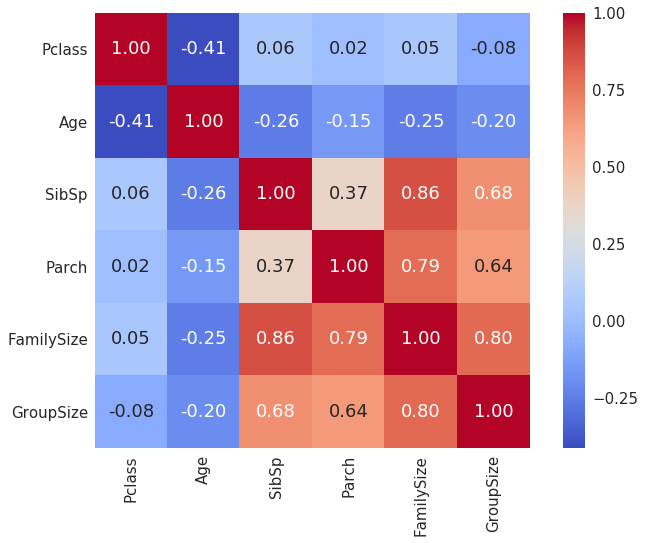

In [81]:
feature_list = ['Pclass', 'Age', 'SibSp', 'Parch', 'FamilySize', 'GroupSize']
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
g = sns.heatmap(dataset[feature_list].corr(), square=True, annot=True, cmap='coolwarm', fmt='.2f')

As we can see, the features most strongly correlated with Age are: Pclass (-0.41), SibSp (-0.26), FamilySize (-0.25), GroupSize (-0.20), and Parch (-0.15). Let's take a quick look at Age trends within these features. We will also look at Age's dependence on Sex:

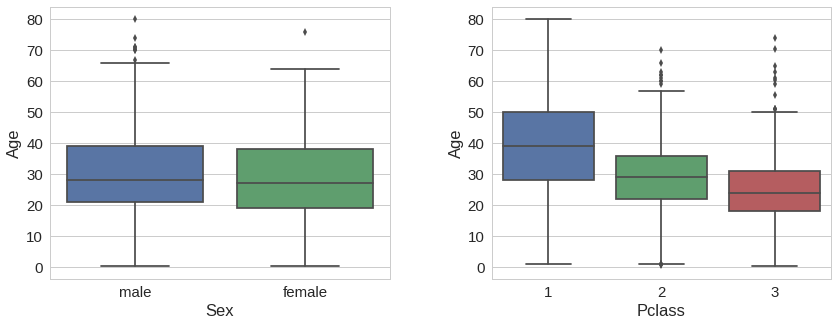

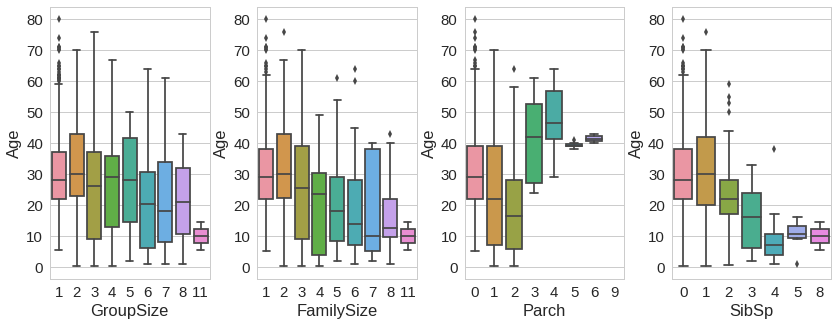

In [82]:
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(x='Sex', y='Age', data=dataset)
ax = fig.add_subplot(1, 2, 2)
ax = sns.boxplot(x='Pclass', y='Age', data=dataset)

fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)
ax = fig.add_subplot(1, 4, 1)
ax = sns.boxplot(x='GroupSize', y='Age', data=dataset)
ax = fig.add_subplot(1, 4, 2)
ax = sns.boxplot(x='FamilySize', y='Age', data=dataset)
ax = fig.add_subplot(1, 4, 3)
ax = sns.boxplot(x='Parch', y='Age', data=dataset)
ax = fig.add_subplot(1, 4, 4)
ax = sns.boxplot(x='SibSp', y='Age', data=dataset)

Comments:
* The difference in Age distributions between sexes appears negligible. 
* We have already noted the clear trend of upper-class passengers being older. 
* There is a discontinuity in the trend for Age vs. Parch. The reason is simple: a child can have at most 2 legal parents; if Parch > 2 then the passenger must be an adult. 

We choose to fill missing age entries using the mean age of entries having matching Pclass, Parch, and SibSp values. We will not use the derived features GroupSize and FamilySize, as Parch and SibSp should be sufficient and adding further features whose values must be matched will reduce the sample sizes from which the means are computed. 

In [83]:
index_missingAge = list(dataset['Age'][dataset['Age'].isnull()].index)

for i in index_missingAge:
    age_estimate = dataset['Age'][((dataset['Pclass'] == dataset.iloc[i]['Pclass']) 
                                  & (dataset['Parch'] == dataset.iloc[i]['Parch']) 
                                  & (dataset['SibSp'] == dataset.iloc[i]['SibSp']))].mean()
    
    
    dataset.loc[i, 'Age'] =  math.ceil(age_estimate)

# verify that there are no NaN entries left:
print('Number of remaining missing Age entries:', dataset['Age'].isnull().sum())

Number of remaining missing Age entries: 0


We must remember to re-apply the creation of age-dependent engineered features, namely 'IsChild' and 'AgeBin':

In [84]:
# re-creation of IsChild
dataset['IsChild'] = np.where(dataset['Age'] < 16, 1, 0)

# re-creation of Age bins; see Section 1.3-b
bin_thresholds = [0, 15, 30, 40, 59, 90]
bin_labels = ['0-15', '16-29', '30-40', '41-59', '60+']
dataset['AgeBin'] = pd.cut(dataset['Age'], bins=bin_thresholds, labels=bin_labels)

Finally, let's re-check some of the feature trends we noted earlier in our Exploratory Data Analysis to see if they still hold after our imputation of so many Age values:

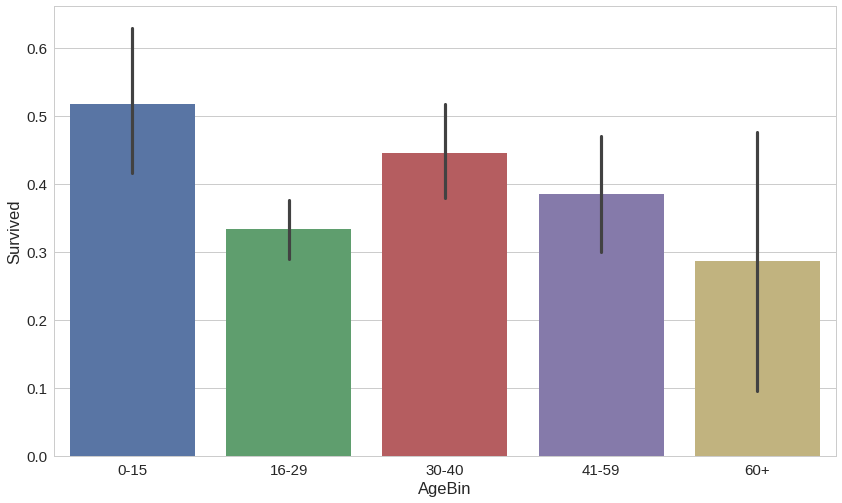

In [85]:
sns.set(font_scale=1.5)
plt.style.use('seaborn-whitegrid')
g = sns.barplot('AgeBin','Survived', data=dataset)

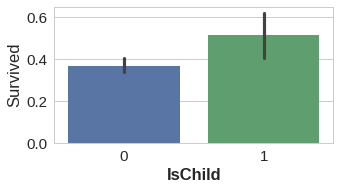

In [86]:
barplots(dataset, features=['IsChild'], cols=1, width=5, height=100, hspace=0.3, wspace=0.2)

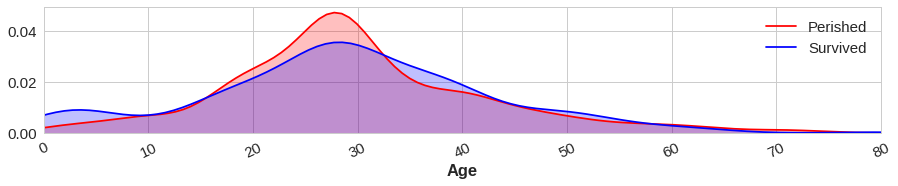

In [87]:
univariate_kdeplots(dataset, ['Age'], cols=1, width=15, height=100, hspace=0.4, wspace=0.25)

Comments (compared to E.D.A. findings):
* **AgeBin:** Mean(Survived) has slightly decreased for AgeBin 0-15 from ~ 58% to around 52%, but we retain the same overall trend. 
* **IsChild:** Mean(Survived) for IsChild=True has likewise decreased from ~ 58% to around 52%; survival for IsChild=False remains unchanged. 
* **Age KDE Plot**: In the Kernel Density Estimate plot, the peak age for 'Perished' has shifted slightly to the right, from around Age=24 to around Age=27, and is slightly more prominent. 

From what we can tell above, our imputation of Age has not significantly altered the trends we saw earlier in our Exploratory Data Analysis. 

<a id='section_2_4'></a>

## 2.4 - Feature Normalization

The features we will work with can be categorized as follows:

***Numerical Features:*** (includes both continuous and discrete variables)
> * Age
> * log10SplitFare
> * Parch
> * SibSp
> * FamilySize
> * GroupSize

***Ordinal Categorical Features:***
(Categorical features that can be ordered)
> * AgeBin
> * Pclass

***Nominal Categorical Features:***
(Categorical features that don't imply any order)
> * Sex 
> * Embarked
> * IsChild
> * LargeGroup
> * GroupType
> * IsGG

There are generally two normalization steps we must take to prepare our data for handling by machine learning models:
1. **We must map all categorical strings to integers.** For ordinal features, we must ensure this integer mapping sorted in a sensible way; for nominal features, we typically separate each feature into a set of orthogonal unit vectors with each vector representing one of the possible categories for that feature (called one-hot encoding). 

2. **We should perform feature scaling**, for example by standardizing our data so that our feature values are centered at mean zero with a standard deviation of unity. Most machine learning optimization algorithms perform better if features are on the same scale. For an intuitive picture of why, suppose Feature-1 ranges from 0.0 to 100.0 while Feature-2 ranges from 0.0-1.0; the optimization algorithm will tend to see larger errors for Feature-1 and hence will focus much more on minimizing Feature-1 errors compared to Feature-2 errors. Bringing features onto the same scale helps facilitate more balanced optimization, and smaller feature ranges tend to help keep the feature weights small. 

<a id='section_2_4_a'></a>

### a) Converting Categorical Strings to Numbers

For our ordinal variables, this process is straightforward. Pclass is already numerical and sorted. For AgeBin we'll apply a map:

In [88]:
# mapping of AgeBin to integer value
ageBin_to_integer = {'0-15': 1,
                     '16-29': 2, 
                     '30-40': 3, 
                     '41-59': 4,
                     '60+': 5}

dataset['AgeBin'] = dataset['AgeBin'].map(ageBin_to_integer)

Sex, IsChild, LargeGroup, and IsGG are all binary features, with the latter three already being appropriately mapped. For Sex, we'll map 'male' to 0, and 'female' to 1:

In [89]:
dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1})

For Embarked and GroupType, we can conveniently create binary 'dummy features' via one-hot encoding using panda's get_dummies() method. If applied to an entire dataframe, this will only act upon string columns. We will also create a copy of our data, called 'dataset_cleaned', from which we will begin to drop unwanted features. 

In [90]:
# *** First let's do some housecleaning and drop the features we won't be working with ***

# create a list of all the column headers in our dataframe
full_feature_list = list(dataset.columns.values)  

# specify only the features we are working with
working_feature_list = ['Age', 'log10SplitFare', 'Parch', 'SibSp', 'FamilySize', 'GroupSize',  
                        'AgeBin', 'Pclass', 'Sex', 'Embarked', 'IsChild', 'LargeGroup', 'GroupType', 'IsGG']

# we'll also keep Name, PassengerId and our class-label 'Survived' of course
# so let's generate the list of all features we will drop:
dropped_feature_list = list(set(full_feature_list) - 
                            set(working_feature_list + ['Name', 'PassengerId', 'Survived']))

# now let's create the 'cleaned' dataset
dataset_cleaned = dataset.copy()
dataset_cleaned = dataset_cleaned.drop(dropped_feature_list, axis=1)
print('\nThe dropped features were:', dropped_feature_list)

# *** Next let's apply one-hot encoding to the remaining string columns (Embarked and GroupType) ***
# return dataset with new dummy variables added
dataset_cleaned = pd.get_dummies(dataset_cleaned, columns=['Embarked', 'GroupType'])  

# update the list of features we are working with
working_feature_list = list(dataset_cleaned.columns.values)
print('\nThe updated list of columns in our dataset are:', working_feature_list)

# let's save a copy of this 'cleaned dataset
dataset_cleaned.to_csv('./titanic-data/cleaned_dataset.csv')


The dropped features were: ['Ticket', 'GroupID', 'GroupNumSurvived', 'Surname', 'Cabin', 'log10Fare', 'SplitFare', 'Fare', 'CabinDeck', 'Title', 'SplitFareBin', 'GroupNumPerished', 'AgeBin_v1', 'FareBin']

The updated list of columns in our dataset are: ['Age', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'FamilySize', 'IsChild', 'GroupSize', 'LargeGroup', 'AgeBin', 'log10SplitFare', 'IsGG', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'GroupType_Family', 'GroupType_IsAlone', 'GroupType_Mixed', 'GroupType_NonFamily']


As we can see, 'Embarked' was separated into 'Embarked_C', 'Embarked_Q', 'Embarked_S'... and similarly for GroupType. Let's have a quick look to see these changes to our dataframe:

In [91]:
feature_list = ['PassengerId', 'GroupType_IsAlone', 'GroupType_Mixed', 'GroupType_Family', 'GroupType_NonFamily',
                'Embarked_C', 'Embarked_Q', 'Embarked_S']
dataset_cleaned[feature_list].head(5)

PassengerId  GroupType_IsAlone  GroupType_Mixed  GroupType_Family  \
0            1                  1                0                 0   
1            2                  0                0                 1   
2            3                  1                0                 0   
3            4                  0                0                 1   
4            5                  1                0                 0   

   GroupType_NonFamily  Embarked_C  Embarked_Q  Embarked_S  
0                    0           0           0           1  
1                    0           1           0           0  
2                    0           0           0           1  
3                    0           0           0           1  
4                    0           0           0           1

<a id='section_2_4_b'></a>

### b) Feature Scaling

With one-hot encoding, all of our nominal categorical features are already normalized to the range \[0,1\]. For our ordinal and continuous-variable features, we choose to apply standardization. For this we use the sklearn library's StandardScaler: 

In [92]:
standardized_feature_list =['Age', 'log10SplitFare', 'Parch', 'SibSp', 'FamilySize', 
                            'GroupSize', 'AgeBin', 'Pclass']

dataset_cleaned_std = dataset_cleaned.copy()  

scaler = StandardScaler()  # create instance of scikit-learn's StandardScalar object

# simultaneously fit the StandardScalar object and transform the selected features:
dataset_cleaned_std[standardized_feature_list] = scaler.fit_transform(
    dataset_cleaned_std[standardized_feature_list].values)  

Let's take a quick look at the results of our feature standardization:

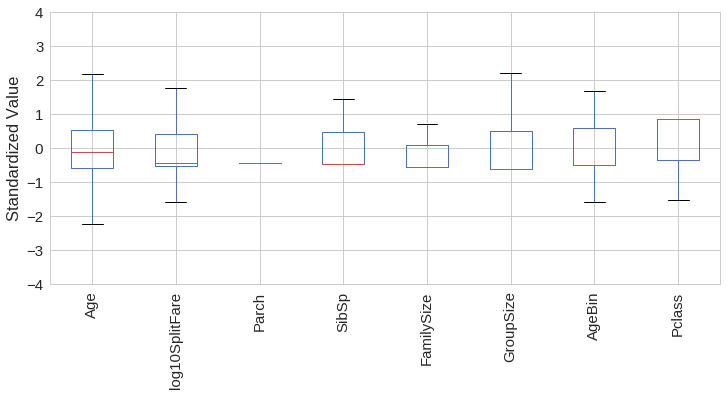

In [93]:
axes = dataset_cleaned_std.boxplot(column=standardized_feature_list, 
                                rot=90, figsize=(12,5), return_type='axes')
g = axes.set_ylim(-4.0, 4.0)
g = axes.set_ylabel('Standardized Value')

*Note: the reason for the odd appearance of the Parch boxplot is merely that the boundaries of the first, second, and third quartiles all have the same value, since we have Parch=0 for more than 75% of all instances (prior to standardization). See below:*

In [94]:
print('Fractional Distribution of Unscaled Parch Values:')
print(dataset_cleaned.Parch.value_counts(normalize=True))

Fractional Distribution of Unscaled Parch Values:
0    0.765470
1    0.132926
2    0.084034
4    0.005348
5    0.004584
3    0.004584
9    0.001528
6    0.001528
Name: Parch, dtype: float64


We can also double-check our standardization using panda's built-in describe() method:

In [95]:
dataset_cleaned_std[standardized_feature_list].describe().loc[['mean', 'std', 'min', 'max']]

Age  log10SplitFare         Parch     SibSp    FamilySize  \
mean -4.444285e-16   -3.528287e-16 -1.357033e-18  0.000000  1.628440e-17   
std   1.000382e+00    1.000382e+00  1.000382e+00  1.000382  1.000382e+00   
min  -2.298251e+00   -3.706883e+00 -4.430375e-01 -0.479724 -5.583461e-01   
max   3.996800e+00    3.477360e+00  9.995813e+00  7.155030  5.758637e+00   

         GroupSize        AgeBin        Pclass  
mean  1.831995e-17  1.411315e-16 -2.062691e-16  
std   1.000382e+00  1.000382e+00  1.000382e+00  
min  -6.191737e-01 -1.597296e+00 -1.546098e+00  
max   5.001480e+00  2.758663e+00  8.419164e-01

The means are indeed zero and the standard deviations are near unity, as we'd like. 

***

<a id='section_3'></a>

# 3) Feature Selection and Dimensionality Reduction

In the previous two sections, we explored our data, defined new features, and prepared our features for input into machine learning algorithms. In this section, our aim is to identify feature subsets that will allow us to obtain good predictive accuracy without 'overfitting' our model. A model that is 'overfit' generalizes poorly to unseen data. This tends to happen when too many features are included, and is colloquially known as the "curse of dimensionality". 

We will examine three approaches to selecting a feature subset:

> 1. Recursive Feature Elimination (RFE) on our full feature set. 
> 2. Principal Component Analysis (PCA) on our full feature set. 
> 3. Feature selection based solely on our Exploratory Data Analysis. 

To be able to assess feature importance, we'll need to define some classifiers. Typically, one might want to iterate between feature selection and classifier optimization -- it depends on one's available time budget for maximizing classification performance. Obtaining the best-performing classifier could take weeks of experimenting with different features, algorithms, and hyperparameters. Here we'll focus on the feature selection first, and won't worry about hyperparameter optimization until [Section 4](#section_4). The classification algorithms we choose to work with will include:

> * Logistic Regression
> * Stochastic Gradient Descent (SGD)
> * Decision Trees
> * Random Forests
> * Linear Discriminant Analysis (LDA)
> * Support Vector Machines (SVM)
> * Gradient Boosting
> * Extreme Gradient Boosting (XGB)
> * AdaBoost

We won't cover the details here of how each of these algorithms work. However, there are a plethora of resources available online discussing their formulation and implementation. Conveniently, many of these classification methods are now part of the scikit-learn library, so you can check out <a href="http://scikit-learn.org/stable/documentation.html" target="_blank">scikit-learn's documentation</a> for more details. More information about the increasingly-popular XGBoost algorithm can be found <a href="https://xgboost.readthedocs.io/en/latest/tutorials/index.html" target="_blank">here</a>.


<a id='section_3_1'></a>

## 3.1 - Getting Started

Let's define the full list of features we'll be starting with. Our goal is to eliminate features from this list that provide little advantage to our classification task. 

In [96]:
training_feature_list = ['Age',
                         'Parch',
                         'Pclass',
                         'Sex',
                         'SibSp',
                         'FamilySize',
                         'IsChild',
                         'GroupSize',
                         'AgeBin',
                         'log10SplitFare',
                         'LargeGroup',
                         'IsGG',
                         'Embarked_C',
                         'Embarked_Q',
                         'Embarked_S',
                         'GroupType_Family',
                         'GroupType_IsAlone',
                         'GroupType_Mixed',
                         'GroupType_NonFamily']

We now also separate our data into its 'train' and 'test' components. Remember here that the 'test' entries are ones for which we lack information about survival. It will also be convenient to split the features and class labels into separate arrays (X and y, respectively). 

In [97]:
# separate into cleaned, standardized test and training subsets
data_test_cl_std = dataset_cleaned_std[dataset_cleaned_std.PassengerId.isin(test_Ids)]
data_train_cl_std = dataset_cleaned_std[~dataset_cleaned_std.PassengerId.isin(test_Ids)]  
# note: tidle (~) in above line denotes logical not

# we will also further subdivide into a feature dataframe (X) a class dataframe (y, for 'Survived')
X_train = data_train_cl_std[training_feature_list]
y_train = data_train_cl_std['Survived']
ids_train = data_train_cl_std['PassengerId']

X_test = data_test_cl_std[training_feature_list]
ids_test = data_test_cl_std['PassengerId']


Now we'll define some useful functions, including one that fits input classifiers on our training data and returns cross-validated accuracies. I choose to use Stratified K-fold Cross-Validation. In the specific instance below, I manually tabulate the scores for each fold instead of using scikit-learn's *cross_val_score* function because I also want to compute mean feature importances, which *cross_val_score* doesn't provide. You can read more about the importance of cross-validation and its implementation 
<a href="http://scikit-learn.org/stable/modules/cross_validation.html" target="_blank">here</a>.

In [98]:
def get_clf_name(classifier_object):
    """
    Returns  a string representing the name of the input classifier object. 
    
    """
    name_ = str(type(classifier_object)).split('.')[-1]
    for char in """ "'>() """:  # triple-quoted string definition allows us to include " and ' as characters
        name_ = name_.replace(char,"")  # delete unwanted characters from the name
    
    return name_


def train_classifier_ensemble_CV(classifiers, X_data, y_data, clf_params=None, cv_splits=10, 
                                 random_state=27, return_trained_classifiers=False, verbose=0):
    """
    Trains a list of classifiers on the input training data and returns cross-validated accuracy and f1 scores
    as well as feature_importances (where available). The list of trained classifier objects is also returned
    upon request. 
    
    : param classifiers : List of classifier objects; expects each has a scikit-learn wrapper. 
    
    : param X_data : Pandas dataframe containing our training features. 
    
    : param y_data : Pandas dataframe containing our training class labels.
    
    : param clf_params : (Optional) List of dictionaries containing parameters for each classifier object
                         in the list 'classifiers'. If not provided, the already-initialized parameters of
                         each classifier object will be used. 
                         
    : param cv_splits : Integer number of cross-validation splits. 
    
    : param random_state : Seed for reproducibility between executions. 
    
    : param return_trained_classifiers : Boolean; if True, function will also return a list containing the
                                         fit classifier objects. 
                                         
    : param verbose : The amount of status text displayed during execution; 0 for less, 1 for more. 

    : return clf_comparison : A pandas dataframe tabulating the cross-validated performance of each classifier. 
    
    : return mean_feature_importances : An array containing the ranked feature importances for each classifier
                                        having the feature_importances_ attribute. 
                                        
    : return trained_classifiers : (if return_trained_classifiers=True) A list of trained classifier objects. 
    
    """
    # initialization
    kfold = StratifiedKFold(n_splits=cv_splits, random_state=random_state)
    
    train_accuracy_mean = []
    train_accuracy_std = []
    test_accuracy_mean = []
    test_accuracy_std = []
    f1_score_mean = []
    f1_score_std = []
    mean_feature_importances = []
    trained_classifiers = []
    classifier_name = []
    
    if clf_params is None:  # construct using classifier's existing parameter assignment
        clf_params = []
        for clf in classifiers:
            params = clf.get_params() 
            if 'random_state' in params.keys():  # assign random state / seed
                params['random_state'] = random_state
            elif 'seed' in params.keys():
                params['seed'] = random_state
            clf_params.append(params)
    
    # step through the classifiers for training and scoring with cross-validation
    for clf, params in zip(classifiers, clf_params):
        
        # automatically obtain the name of the classifier
        name = get_clf_name(clf)
        classifier_name.append(name)
        
        if verbose == 1:  # print status
            print('\nPerforming Cross-Validation on Classifier %s of %s:' 
                  % (len(classifier_name), len(classifiers)))
            print(name)
        
        # perform k-fold cross validation for this classifier and calculate scores for each split
        kth_train_accuracy = []
        kth_test_accuracy = []
        kth_test_f1_score = []
        kth_feature_importances = []
        
        for (train, test) in kfold.split(X_data, y_data):
        
            clf.set_params(**params)
            clf.fit(X_data.iloc[train], y_data.iloc[train])
            
            kth_train_accuracy.append(clf.score(X_data.iloc[train], y_data.iloc[train]))
            kth_test_accuracy.append(clf.score(X_data.iloc[test], y_data.iloc[test]))
            kth_test_f1_score.append(f1_score(y_true=y_data.iloc[test], y_pred=clf.predict(X_data.iloc[test])))
            
            if hasattr(clf, 'feature_importances_'):  # some classifiers (like linReg) lack this attribute
                kth_feature_importances.append(clf.feature_importances_)
        
        # populate scoring statistics for this classifier (over all cross-validation splits)
        train_accuracy_mean.append(np.mean(kth_train_accuracy))
        train_accuracy_std.append(np.std(kth_train_accuracy))
        test_accuracy_mean.append(np.mean(kth_test_accuracy))
        test_accuracy_std.append(np.std(kth_test_accuracy))
        f1_score_mean.append(np.mean(kth_test_f1_score))
        f1_score_std.append(np.std(kth_test_f1_score))
    
        # obtain array of mean feature importances, if this classifier had that attribute
        if len(kth_feature_importances) == 0:
            mean_feature_importances.append(False)
        else:
            mean_feature_importances.append(np.mean(kth_feature_importances, axis=0))
        
        # if requested, also export classifier after fitting on the complete training set 
        if return_trained_classifiers is not False:
            clf.fit(X_data, y_data)
            trained_classifiers.append(clf)
            
        # remove AdaBoost feature importances (we won't discuss their interpretation)
        if type(clf) == type(AdaBoostClassifier()):
            mean_feature_importances[-1] = False
        
    
    # construct dataframe for comparison of classifiers
    clf_comparison = pd.DataFrame({'Classifier Name' : classifier_name, 
                                   'Mean Train Accuracy' : train_accuracy_mean, 
                                   'Train Accuracy Standard Deviation' : train_accuracy_std,
                                   'Mean Test Accuracy' : test_accuracy_mean, 
                                   'Test Accuracy Standard Deviation' : test_accuracy_std, 
                                   'Mean Test F1-Score' : f1_score_mean,
                                   'F1-Score Standard Deviation' : f1_score_std})
    
    # enforce the desired column order
    clf_comparison = clf_comparison[['Classifier Name', 'Mean Train Accuracy',
                                     'Train Accuracy Standard Deviation', 'Mean Test Accuracy',
                                     'Test Accuracy Standard Deviation', 'Mean Test F1-Score',
                                     'F1-Score Standard Deviation']]
                   
    
    # add return_trained_classifiers to the function return, if requested, otherwise omit                                                
    if return_trained_classifiers is not False:
        return clf_comparison, mean_feature_importances, trained_classifiers
    else:
        return clf_comparison, mean_feature_importances

    
def plot_mean_feature_importances(clf_comparison, mean_feature_importances, X_data):
    """
    Generates bar plots of feature importances using the results of train_classifier_ensemble_CV.
    
    : param clf_comparison : A pandas dataframe comparing cross-validated classifier performances; 
                             one of the return parameters of the train_classifier_ensemble_CV function. 
    
    : param mean_feature_importances : An array of feature importances, generated by the 
                                       train_classifier_ensemble_CV function. 
    
    : param X_data : A pandas dataframe of the feature data used in the creation of clf_comparison and 
                     mean_feature_importances.
                     
    : return : None. 

    """
    for clf_name, importances in zip(clf_comparison['Classifier Name'], mean_feature_importances):

        if importances is not False:

            indices = np.argsort(importances)[::-1]
            feature_labels = X_data.columns

            plt.figure(figsize=(12,5))
            plt.title('Feature Importances for ' + clf_name)
            plt.bar(range(X_data.shape[1]), importances[indices], color='lightblue', align='center')
            plt.xticks(range(X_data.shape[1]), feature_labels[indices], rotation=90)
            plt.xlim([-1, X_data.shape[1]])
            plt.tight_layout()
            plt.show()
        
    return


<a id='section_3_2'></a>

## 3.2 - Initial Performance on Full Feature Set

As a benchmark, let's first train our classifiers on the full feature set. At the same time, we can extract some of the feature importances as ranked by some of our tree- or ensemble-based classifiers. 

We'll define our list of classifiers as follows, where we specify some (but not all) of their hyperparameters (we will perform optimization later in Section 4):

In [99]:
num_jobs=-1  # I'll use all available CPUs when possible

classifier_list = [LogisticRegression(n_jobs=num_jobs), 
                   SGDClassifier(alpha=0.01, n_jobs=num_jobs), 
                   DecisionTreeClassifier(), 
                   ExtraTreeClassifier(max_depth=5, min_samples_split=10, splitter='random'), 
                   RandomForestClassifier(n_estimators=100, n_jobs=num_jobs), 
                   LinearDiscriminantAnalysis(n_components=5, solver='svd'), 
                   SVC(shrinking=True, kernel='rbf'), 
                   XGBClassifier(booster='gbtree', n_jobs=num_jobs), 
                   GradientBoostingClassifier(n_estimators=100, loss='deviance'), 
                   AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=50)]

Now let's train our classifiers using the full feature set:

In [100]:
clf_comp_Full_FeatureSet, mean_feature_importances = train_classifier_ensemble_CV(classifiers=classifier_list, 
                                                                                 X_data=X_train, 
                                                                                 y_data=y_train)

# display the comparison results
clf_comp_Full_FeatureSet

Classifier Name  Mean Train Accuracy  \
0          LogisticRegression             0.821176   
1               SGDClassifier             0.813694   
2      DecisionTreeClassifier             0.981045   
3         ExtraTreeClassifier             0.780267   
4      RandomForestClassifier             0.980921   
5  LinearDiscriminantAnalysis             0.822423   
6                         SVC             0.835640   
7               XGBClassifier             0.879287   
8  GradientBoostingClassifier             0.897245   
9          AdaBoostClassifier             0.981045   

   Train Accuracy Standard Deviation  Mean Test Accuracy  \
0                           0.005092            0.811557   
1                           0.005471            0.800257   
2                           0.001744            0.783515   
3                           0.010718            0.756586   
4                           0.001675            0.794702   
5                           0.003866            0.815963   
6                           0.004168            0.829435   
7                           0.003933            0.822793   
8                           0.004595            0.830645   
9                           0.001744            0.794816   

   Test Accuracy Standard Deviation  Mean Test F1-Score  \
0                          0.030962            0.741399   
1                          0.032634            0.717575   
2                          0.038388            0.710415   
3                          0.042583            0.605357   
4                          0.042698            0.727031   
5                          0.030021            0.743970   
6                          0.033088            0.763402   
7                          0.038590            0.748959   
8                          0.038076            0.765224   
9                          0.054878            0.720653   

   F1-Score Standard Deviation  
0                     0.047643  
1                     0.058912  
2                     0.058298  
3                     0.095642  
4                     0.068843  
5                     0.050241  
6                     0.059218  
7                     0.066746  
8                     0.060679  
9                     0.082780

Most of our untuned classifiers are showing around 80% test accuracy. Note however, that for many, the training accuracy is much higher than the test accuracy, which is a sign of overfitting. In particular, the Decision Tree, Random Forest, XBG, Gradient Boosting, and AdaBoost classifiers all suffer from a high degree of overfitting. For example, AdaBoost and is showing 98% training accuracy but only 79% testing accuracy. Reduction in the number of features, as well as hyperparameter tuning later, should be able to reduce this discrepency to achieve a better 'bias-variance tradeoff', i.e. an optimum between prediction accuracy and overfitting. 

<a id='section_3_3'></a>

## 3.3 - Feature Importances of our Tree and Ensemble Classifiers

We can examine how some of the classifiers we just trained ranked feature importance:

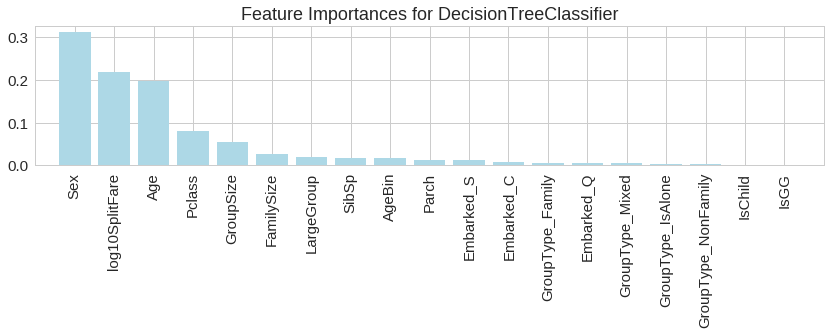

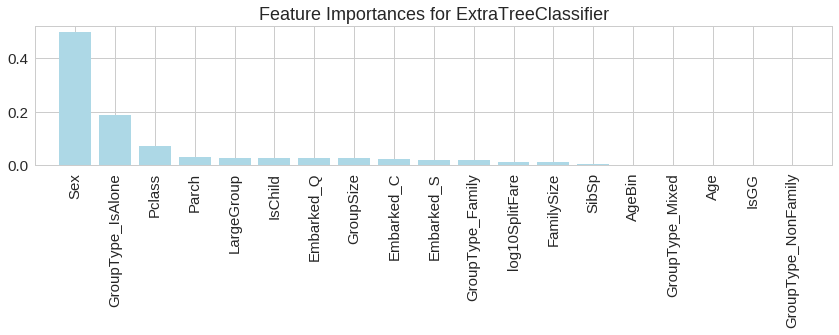

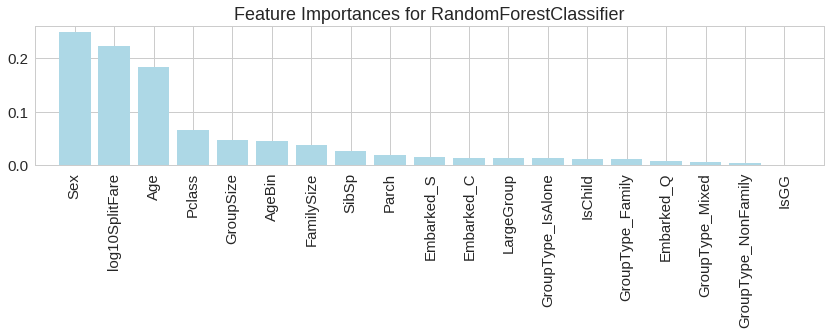

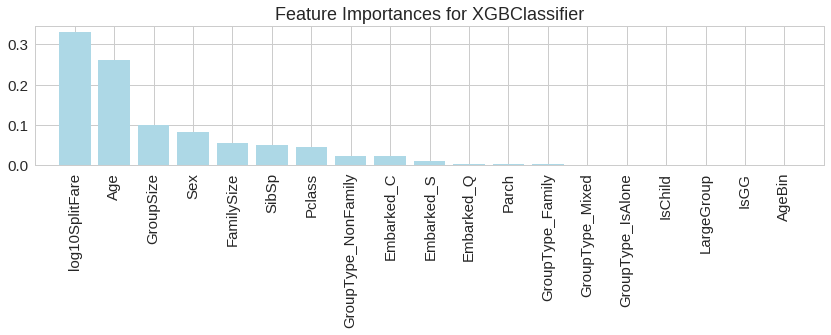

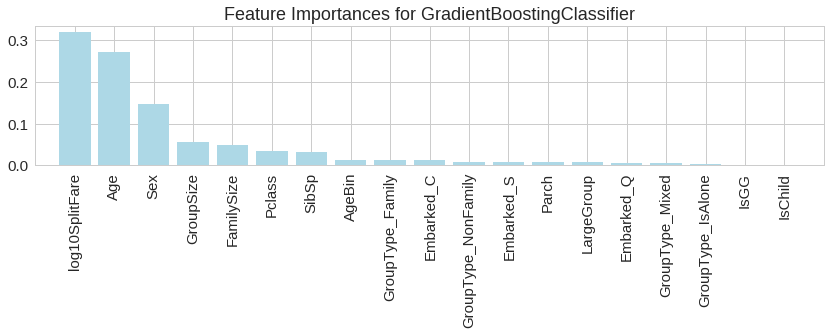

In [101]:
plot_mean_feature_importances(clf_comp_Full_FeatureSet, mean_feature_importances, X_data=X_train)

Findings:
* Sex is the top feature for 3/5 of these classifiers. 
* Log10SplitFare and Age also rank highly. 
* GroupSize generally ranked within the top 5 features. 
* The importance of Pclass is ranked fairly low, but this might be due to Log10SplitFare serving as a substitute that conveys essentially the same information. 

<a id='section_3_4'></a>

## 3.4 - Dimensionality Reduction via Recursive Feature Elimination (RFE)

Now we will perform Recursive Feature Elimination (RFE) to assess feature importance by iteratively removing features to see which have the least impact on classifier performance. First we define a function that implements RFE with the help of scikit-learn:

In [102]:
def get_RFE_rankings(classifiers, X_data, y_data, verbose=0):
    """
    Performs recursive feature elimination and returns feature rankings for each classifier. 
    
    : param classifiers : List of classifiers objects; assumed to have scikit-learn wrappers. 
    
    : param X_data : Pandas dataframe containing our full feature training set. 
    
    : param y_data : Pandas dataframe containing our training class labels. 
    
    : param verbose: Int, controls amount of status-based text displayed; 1 for more, 0 for less.  
    
    : return feature_rankings : Pandas dataframe tabulating ranked feature importance for each classifier. 
    
    """
    feature_rankings = pd.DataFrame()
    feature_rankings['Feature Name'] = X_data.columns
    
    for clf in classifiers:
        
        # get classifier name
        name = str(type(clf)).split('.')[-1]
        for char in """ "'>() """:  # triple-quoted string definition allows us to include " and ' as characters
            name = name.replace(char,"")  # delete unwanted characters from the name
        
        if name == 'SVC': # SVC does not expose "coef_" or "feature_importances_" attributes, so skip it
            print('Skipped RFE for SVC')
            continue
            
        if name == 'AdaBoostClassifier':  # this classifier causes an error to be thrown with RFE
            print('Skipped RFE for AdaBoostClassifier')
            continue
        
        # print status if requested
        if verbose == 1:
            print('Now performing RFE for', name)
        
        # get freature ranking
        rfe = RFE(estimator=clf, n_features_to_select=1, step=1)
        rfe.fit(X_data, y_data)
        
        # save as new column in dataframe
        feature_rankings[name] = rfe.ranking_
      
    # now sum up totals to obtain an overall ranking 
    # (each classifier's feature ranking will be equally weighted)
    summed_rankings = feature_rankings.sum(axis=1)
    
    # here we turn the sum into a rank (lower rank goes with lower sum)
    sorted_rankings = [0] * len(summed_rankings)
    for i, x in enumerate(sorted(range(len(summed_rankings)), key=lambda y: summed_rankings[y])):
        sorted_rankings[x] = i + 1  # offset so that lowest rank is 1
    
    feature_rankings['Overall Ranking'] = sorted_rankings
    
    # re-order dataframe so that 'Overall Ranking' is the 2nd column
    cols = feature_rankings.columns.tolist()
    cols = [cols[0]] + [cols[-1]] + cols[1:-1]
    feature_rankings = feature_rankings[cols] 
    
    # sort the dataframe rows in terms of acending rank
    feature_rankings = feature_rankings.sort_values(by='Overall Ranking')
    
    return feature_rankings


We now execute the RFE function:

In [103]:
feature_rankings_RFE = get_RFE_rankings(classifiers=classifier_list, X_data=X_train, y_data=y_train, verbose=1)

feature_rankings_RFE

Now performing RFE for LogisticRegression
Now performing RFE for SGDClassifier
Now performing RFE for DecisionTreeClassifier
Now performing RFE for ExtraTreeClassifier
Now performing RFE for RandomForestClassifier
Now performing RFE for LinearDiscriminantAnalysis
Skipped RFE for SVC
Now performing RFE for XGBClassifier
Now performing RFE for GradientBoostingClassifier
Skipped RFE for AdaBoostClassifier


Feature Name  Overall Ranking  LogisticRegression  SGDClassifier  \
3                   Sex                1                   1              1   
2                Pclass                2                   5              7   
9        log10SplitFare                3                  13             10   
4                 SibSp                4                  11              6   
5            FamilySize                5                   8             16   
7             GroupSize                6                   7             17   
0                   Age                7                  10              9   
10           LargeGroup                8                   2              2   
15     GroupType_Family                9                  12              5   
18  GroupType_NonFamily               10                   6              8   
6               IsChild               11                   3              4   
14           Embarked_S               12                   9             19   
12           Embarked_C               13                  14             13   
1                 Parch               14                  17             15   
8                AgeBin               15                  15             18   
11                 IsGG               16                   4             14   
17      GroupType_Mixed               17                  19              3   
16    GroupType_IsAlone               18                  16             12   
13           Embarked_Q               19                  18             11   

    DecisionTreeClassifier  ExtraTreeClassifier  RandomForestClassifier  \
3                        2                    1                       3   
2                        5                    2                       5   
9                        1                    4                       1   
4                        8                    7                       8   
5                        6                    3                       6   
7                        4                    6                       4   
0                        3                   19                       2   
10                      17                    5                      12   
15                      11                    8                      15   
18                      14                   10                      18   
6                       16                   13                      14   
14                      10                   17                       9   
12                      13                    9                      13   
1                        9                   15                      10   
8                        7                   11                       7   
11                      19                   16                      19   
17                      15                   12                      17   
16                      12                   18                      11   
13                      18                   14                      16   

    LinearDiscriminantAnalysis  XGBClassifier  GradientBoostingClassifier  
3                            4              5                           3  
2                           10              7                           7  
9                           17              1                           1  
4                            1              4                           4  
5                            2              6                           6  
7                            8              3                           5  
0                           12              2                           2  
10                           6             17                          13  
15                          13             11                           8  
18                           9              9                          12  
6                            5             16                          19  
14               

The features in the above table have been sorted based on their overall ranking, which aggregates the results for each classifier. How many of these top features should we include? We can iterate over our train_classifier_ensemble_CV() function to find out:

In [104]:
pooled_train_accuracies = []
pooled_test_accuracies = []

# we'll start with the top 10 features and then iteratively drop the least important one
for num_features in range(10, 0, -1): 
    
    print('Computing for top %s feature(s)...' % num_features)
    
    kept_features = feature_rankings_RFE['Feature Name'].iloc[:num_features]
    X_train_reduced = X_train[kept_features].copy()
    
    clf_comparison, _ = train_classifier_ensemble_CV(classifiers=classifier_list, 
                                                     X_data=X_train_reduced, 
                                                     y_data=y_train)
    
    pooled_train_accuracies.append(clf_comparison['Mean Train Accuracy'].mean())
    pooled_test_accuracies.append(clf_comparison['Mean Test Accuracy'].mean())

print('*** Complete ***')

Computing for top 10 feature(s)...
Computing for top 9 feature(s)...
Computing for top 8 feature(s)...
Computing for top 7 feature(s)...
Computing for top 6 feature(s)...
Computing for top 5 feature(s)...
Computing for top 4 feature(s)...
Computing for top 3 feature(s)...
Computing for top 2 feature(s)...
Computing for top 1 feature(s)...
*** Complete ***


Now let's plot the results:

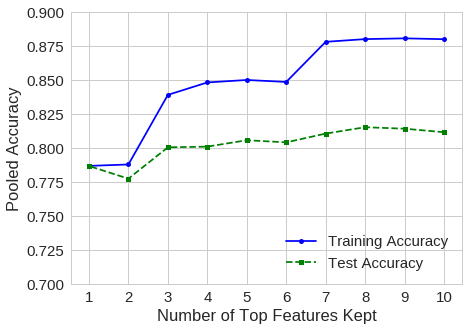

In [105]:
plt.figure(figsize=(7, 5))
plt.plot(range(10, 0, -1), pooled_train_accuracies, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.plot(range(10, 0, -1), pooled_test_accuracies, color='green', linestyle='--', marker='s', markersize=5, label='Test Accuracy')
plt.xlabel('Number of Top Features Kept')
plt.ylabel('Pooled Accuracy')
plt.legend(loc=4)
plt.ylim([0.7, 0.9])
plt.xticks(range(10, 0, -1))
plt.show()

In computing the above, we've taken the average accuracy across all classifiers. This is somewhat crude; it might be more representative if we based our accuracy on a majority vote across all classifiers. In any case, our approach here shows that 8 features is the optimal number to keep. Beyond this, the pooled test accuracy begins to decrease. Note that we still have a significant discrepency between training and test accuracies. To improve bias-variance tradeoff further, we might need to iterate over the number of included features *together* with the classifier hyperparameters. We'll explore this later. For now, let's define our resultant RFE feature subset and obtain our classification performance results:

In [106]:
feature_subset_RFE = feature_rankings_RFE['Feature Name'].iloc[:8]

clf_comp_RFE_FeatureSet, _ = train_classifier_ensemble_CV(classifiers=classifier_list, 
                                                         X_data=X_train[feature_subset_RFE], 
                                                         y_data=y_train)

# display the comparison results
clf_comp_RFE_FeatureSet

Classifier Name  Mean Train Accuracy  \
0          LogisticRegression             0.816686   
1               SGDClassifier             0.804591   
2      DecisionTreeClassifier             0.981045   
3         ExtraTreeClassifier             0.806334   
4      RandomForestClassifier             0.980671   
5  LinearDiscriminantAnalysis             0.813693   
6                         SVC             0.836014   
7               XGBClassifier             0.881157   
8  GradientBoostingClassifier             0.899239   
9          AdaBoostClassifier             0.981045   

   Train Accuracy Standard Deviation  Mean Test Accuracy  \
0                           0.003306            0.815951   
1                           0.003448            0.808047   
2                           0.001744            0.798135   
3                           0.005202            0.802454   
4                           0.001950            0.821732   
5                           0.002493            0.812567   
6                           0.003355            0.828286   
7                           0.004498            0.829535   
8                           0.004497            0.833991   
9                           0.001744            0.801557   

   Test Accuracy Standard Deviation  Mean Test F1-Score  \
0                          0.027459            0.748574   
1                          0.021846            0.726530   
2                          0.047049            0.730279   
3                          0.021538            0.724267   
4                          0.050290            0.757607   
5                          0.020115            0.739786   
6                          0.031779            0.762572   
7                          0.043112            0.763420   
8                          0.033032            0.772062   
9                          0.052910            0.730835   

   F1-Score Standard Deviation  
0                     0.046237  
1                     0.044608  
2                     0.067156  
3                     0.037356  
4                     0.077750  
5                     0.034855  
6                     0.058928  
7                     0.069526  
8                     0.051040  
9                     0.078328

<a id='section_3_5'></a>

## 3.5 - Dimensionality Reduction via Principal Component Analysis (PCA)

We now use a powerful unsupervised technique called Principal Component Analysis (PCA). In short, PCA looks at correlations in your features to define a new set of axes corresponding to the directions of maximum variance. The idea is that these directions of maximum variance, which are linear combinations of correlated features from our original feature space, contain most of the interesting information (or 'signal') useful for classification. We thus reduce dimensionality by creating a new feature space that is a linear combination of the old that retains most of the information while dropping the least important axes. 

Performing PCA on the complete dataset:

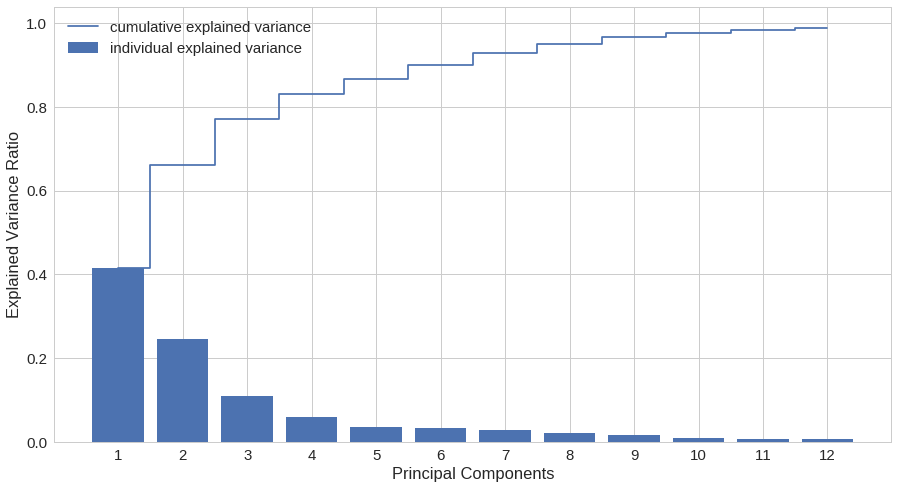

In [107]:
# performing PCA and retain the top 12 principal components:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)

X_train_pca = pca.fit_transform(X_train)

pca_components = pca.components_
pca_var_ratios = pca.explained_variance_ratio_

plt.figure(figsize=(15, 8))
plt.bar(range(1, pca_var_ratios.size +1), pca_var_ratios, align='center', label='individual explained variance')
plt.step(range(1, pca_var_ratios.size +1), np.cumsum(pca_var_ratios), where='mid', label='cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.xticks(range(1, pca_var_ratios.size +1))
plt.legend(loc='best')
plt.show()


We find that more than 80% of the variance is explained by the top 4 principal components. 

It is interesting to see which of our original feature vectors are part of these top 4 prinicipal components. We can do this by computing the squared magnitudes of the projections of our original feature vectors onto these principal component vectors. Note that the amplitudes of the projections are stored in *pca_components*. 

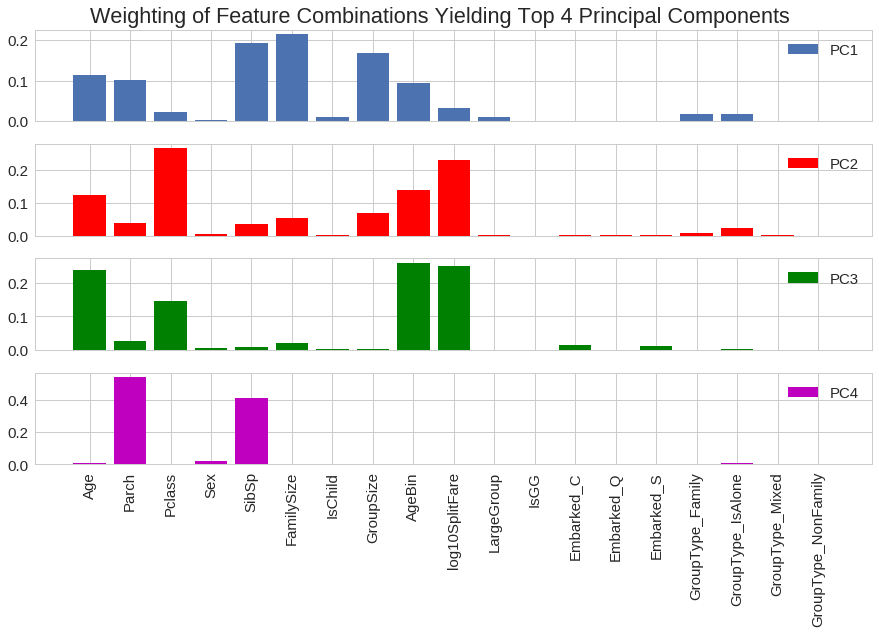

In [108]:
f, axarr = plt.subplots(4, sharex=True, figsize=(15,8))
f.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.25)
axarr[0].bar(range(1, pca_components[0].size + 1), pca_components[0]**2, 
             align='center', label='PC1')
axarr[0].legend(loc='best')
axarr[1].bar(range(1, pca_components[1].size + 1), pca_components[1]**2, 
             align='center', label='PC2', color='r')
axarr[1].legend(loc='best')
axarr[2].bar(range(1, pca_components[2].size + 1), pca_components[2]**2, 
             align='center', label='PC3', color='g')
axarr[2].legend(loc='best')
axarr[3].bar(range(1, pca_components[3].size + 1), pca_components[3]**2, 
             align='center', label='PC4', color='m')
axarr[3].legend(loc='best')
plt.xticks(np.arange(1.0, pca_components[0].size +1.0), X_train.columns, rotation=90)
plt.suptitle('Weighting of Feature Combinations Yielding Top 4 Principal Components', y=0.92)
plt.show()


Comments:
* PC1 is combining features related to age and the number of family members. 
* PC2 appears to be capturing information that correlates between Pclass, Age, and Fare, but with a few other features related to family mixed in. 
* PC3 is also focused on Pclass, Age, and Fare, but with less contribution from family size. 
* PC4 appears to be focused entirely on Parch and SibSp, and thus FamilySize. 

One interesting omission from our top 4 principal components is Sex. We know this to be an important feature from our Exploratory Data Analysis. But perhaps its low correlation with other features causes it to be omitted. 

So what are the principal components for which Sex has a significant contribution? We can easily investigate this below:


In [109]:
print('Principal Components Ranked by Projection onto Feature Axes')
for i, feature_ in enumerate(X_train.columns):
    print(feature_, ':', (pca_components[:, i]**2).argsort()[-pca_components.shape[1]:][::-1])


Principal Components Ranked by Projection onto Feature Axes
Age : [11  2  1  0  5 10  3  9  7  6  8  4]
Parch : [ 3  0  4  6  1  2  7 10  5  8  9 11]
Pclass : [ 1  7  2  8  5  6  0  9  4 10 11  3]
Sex : [ 7  8  6  5  9  3  4  2  1  0 10 11]
SibSp : [ 3  0  4  1  8  2 10  6  7  5  9 11]
FamilySize : [ 0  4  1  2  7  8  6 10  3  9 11  5]
IsChild : [11  0  7  9  2  6  5  3  4  1  8 10]
GroupSize : [ 4  0  1  6  7 10  2  5  8  9 11  3]
AgeBin : [11  2  1  0  9 10  6  8  3  5  7  4]
log10SplitFare : [ 2  1  6  7  8  4  0  5 10  3 11  9]
LargeGroup : [ 6  4  0 10  8  1  7  2 11  3  9  5]
IsGG : [ 7  8  6  4  5  2  1  9 11  3 10  0]
Embarked_C : [ 9  5  7  2 11  1  8  3  4 10  6  0]
Embarked_Q : [ 9  5 11  8  7 10  1  4  6  3  2  0]
Embarked_S : [ 5  7  9  2  8 11  3  0  1  4  6 10]
GroupType_Family : [ 6  8 10  4  0  9 11  1  3  7  5  2]
GroupType_IsAlone : [ 6  8  4 10  1  0  7  3  5  9  2 11]
GroupType_Mixed : [ 4 10  6  7  8  1 11  5  2  0  9  3]
GroupType_NonFamily : [10  4  6 11  9  2  

We see that Sex doesn't make a major contribution until around principal component 5. 

Let's now train our classifiers on the PCA-transformed data and determine the optimal number of PCA components to keep. We'll first define two helpful functions:

In [110]:
def get_optimal_n_components(clf, X_data_pca, y_data, cv_splits=10, 
                             random_state=27, plot_scores=False):
    """
    Trains a classifier on input principal component data, iteratively dropping the least significant 
    component to determine the number of components yielding the highest cross-validated scores (accuracy 
    and f1-score).
    
    Assumes classifier parameters are already initialized. 
    
    : param clf : Classifier object, assumed to have a scikit-learn wrapper. 
    
    : param X_data_pca : Array of training data in principal component space, arranged from most significant
                         to least significant principal component.
                         
    : param y_data : Vector of class labels corresponding to the training data. 
                         
    : param cv_splits : Integer number of cross-validation splits. 
    
    : param random_state : Seed for reproducability. 
    
    : param plot_scores : Boolean, if True the accuracy and f1-scores will be plotted as a function of the 
                          number of kept principal components. 
                    
    : return results_dict: Python dictionary containing the best-achieved scores and the corresponding
                           number of kept principal components. 
    
    """
    num_dropped_components = np.arange(1, X_data_pca.shape[1])

    mean_accuracies = []
    mean_f1scores = []
    
    # compute cross-validated accuracies and f1-scores after dropping n components
    kfold = StratifiedKFold(n_splits=cv_splits, random_state=random_state)
    for n_dropped in num_dropped_components:
        
        accuracy_scores = cross_val_score(clf, X_data_pca[:, 0:-n_dropped], y_data, 
                                          cv=kfold, scoring='accuracy')
        
        f1_scores = cross_val_score(clf, X_data_pca[:, 0:-n_dropped], y_data, 
                                    cv=kfold, scoring='f1_macro')
        
        mean_accuracies.append(accuracy_scores.mean())
        mean_f1scores.append(f1_scores.mean())
    
    # obtain and return the best results
    index_best_accuracy = np.argmax(mean_accuracies)
    index_best_f1score = np.argmax(mean_f1scores)
    
    results_dict = {'best_accuracy' : mean_accuracies[index_best_accuracy],
                    'best_accuracy_n' : X_data_pca.shape[1] - num_dropped_components[index_best_accuracy],
                    'best_f1score' : mean_f1scores[index_best_f1score],
                    'best_f1score_n' : X_data_pca.shape[1] - num_dropped_components[index_best_f1score]
                   }
    
    # plot the scores if requested
    if plot_scores is not False:
        plt.figure(figsize=(14,5))
        plt.plot(X_data_pca.shape[1] - num_dropped_components, mean_accuracies, label='Accuracy')
        plt.plot(X_data_pca.shape[1] - num_dropped_components, mean_f1scores, label='F1-Score')
        plt.xticks(X_data_pca.shape[1] - num_dropped_components)
        plt.xlabel('Number of Principal Components')
        plt.ylabel('Score')
        plt.legend(loc='best')
        plt.title(get_clf_name(clf))
        plt.show()
        
    return results_dict


def compare_optimal_n_components(classifiers, X_data_pca, y_data, clf_params=None, 
                                 cv_splits=10, random_state=27, verbose=0, plot_scores=False):
    """
    Obtains and tabulates the optimal number of principal components and corresponding best cross-validated
    test scores for a list of classifier objects. 
        
    : param classifiers : List of classifier objects, assumed to have scikit-learn wrappers. 
    
    : param X_data_pca : Array of training data in principal component space, arranged from most significant
                         to least significant principal component.
                         
    : param y_data : Vector of class labels corresponding to the training data. 
    
    : param clf_params : Optional list of dictionaries stating the classifier parameters to be used. If not 
                         provided, then we use the parameters already initialized for the classifier objects. 
                         
    : param cv_splits : Integer number of cross-validation splits. 
    
    : param random_state : Seed for reproducability. 
    
    : param plot_scores : Boolean, if True the accuracy and f1-scores will be plotted as a function of the 
                          number of kept principal components. 
                          
    : return comparison : Pandas dataframe tabulating the best scores and optimal number of principal 
                          components for each classifier object in 'classifiers'. 
    
    """
    # initialization
    clf_names = []
    best_accuracy = []
    best_accuracy_n_components = []
    best_f1score = []
    best_f1score_n_components = []
    
    if clf_params is None:  # construct using classifier's existing parameter assignment
        clf_params = []
        for clf in classifiers:
            params = clf.get_params() 
            if 'random_state' in params.keys():  # assign random state / seed
                params['random_state'] = random_state
            elif 'seed' in params.keys():
                params['seed'] = random_state
            clf_params.append(params)
    
    # step through the classifiers
    for clf, params in zip(classifiers, clf_params):
        
        clf.set_params(**params)
        
        classifier_name = get_clf_name(clf)
        
        clf_names.append(classifier_name)
                
        if verbose == 1:  # print status
            print('\nFinding Optimal Number of Principal Components for Classifier %s of %s:' 
                  % (len(clf_names), len(classifiers)))
            print(classifier_name)
        
        # find optimal number of principal components using cross-validated scoring,
        # and return their scores (both accuracy and f1-score)
        results = get_optimal_n_components(clf, X_data_pca, y_data, 
                                           cv_splits=10, random_state=random_state,
                                           plot_scores=plot_scores)
        
        best_accuracy.append(results['best_accuracy'])
        best_accuracy_n_components.append(results['best_accuracy_n'])
        best_f1score.append(results['best_f1score'])
        best_f1score_n_components.append(results['best_f1score_n'])
        
        
    # create dataframe for comparing results
    comparison = pd.DataFrame(columns=['Classifier', 
                                       'Best Accuracy', 
                                       'Num Components (Best Accuracy)', 
                                       'Best F1-Score', 
                                       'Num Components (Best F1-Score)'])
    
    comparison['Classifier'] = clf_names
    comparison['Best Accuracy'] = best_accuracy
    comparison['Num Components (Best Accuracy)'] = best_accuracy_n_components
    comparison['Best F1-Score'] = best_f1score
    comparison['Num Components (Best F1-Score)'] = best_f1score_n_components
    
    
    return comparison
    

Now performing the computation. We'll use only 5 cross-validation splits, due to relatively long computation time. We'll also plot test scores for each classifier. 


Finding Optimal Number of Principal Components for Classifier 1 of 10:
LogisticRegression


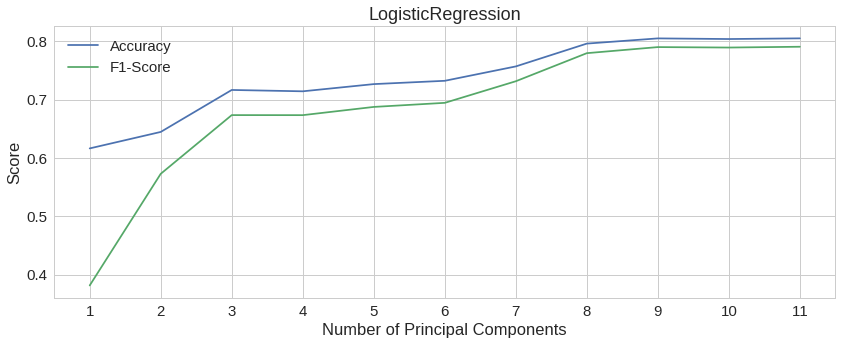


Finding Optimal Number of Principal Components for Classifier 2 of 10:
SGDClassifier


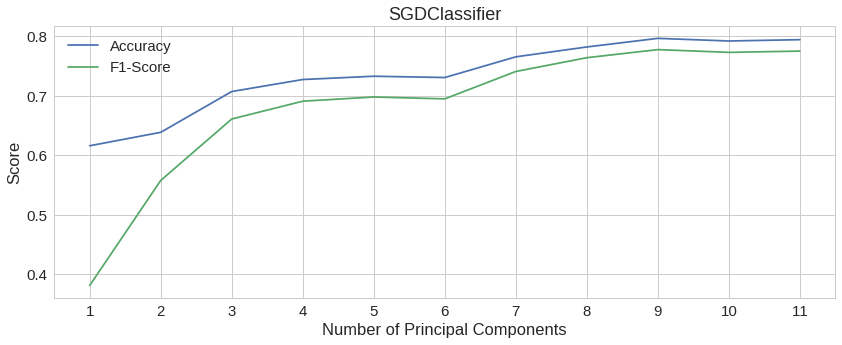


Finding Optimal Number of Principal Components for Classifier 3 of 10:
DecisionTreeClassifier


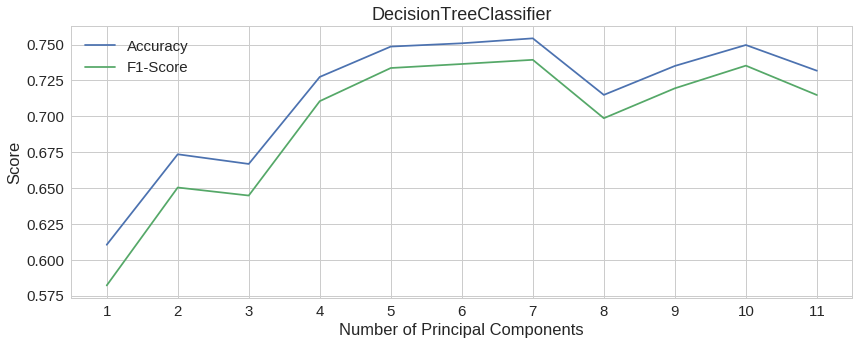


Finding Optimal Number of Principal Components for Classifier 4 of 10:
ExtraTreeClassifier


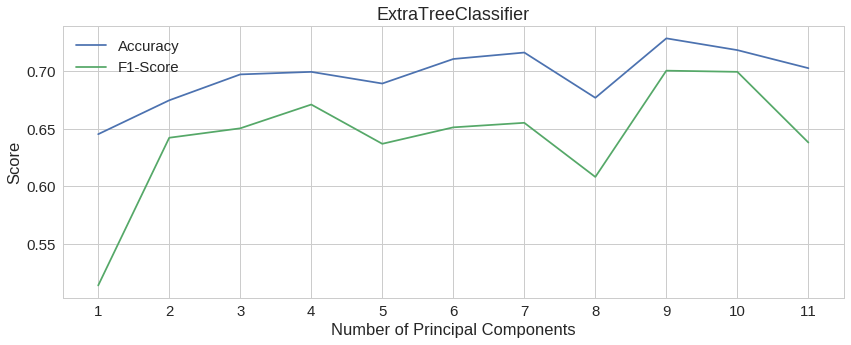


Finding Optimal Number of Principal Components for Classifier 5 of 10:
RandomForestClassifier


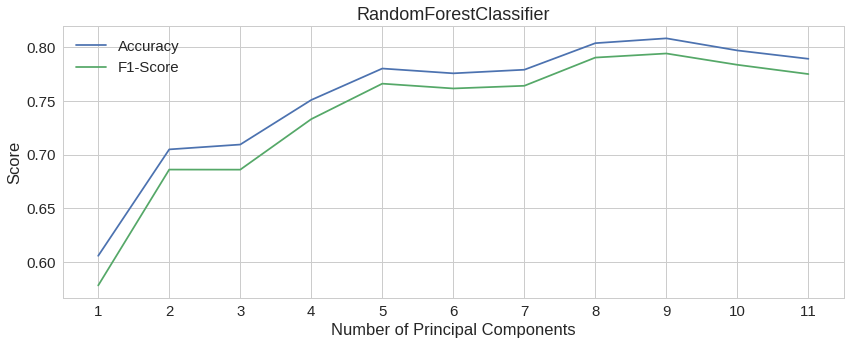


Finding Optimal Number of Principal Components for Classifier 6 of 10:
LinearDiscriminantAnalysis


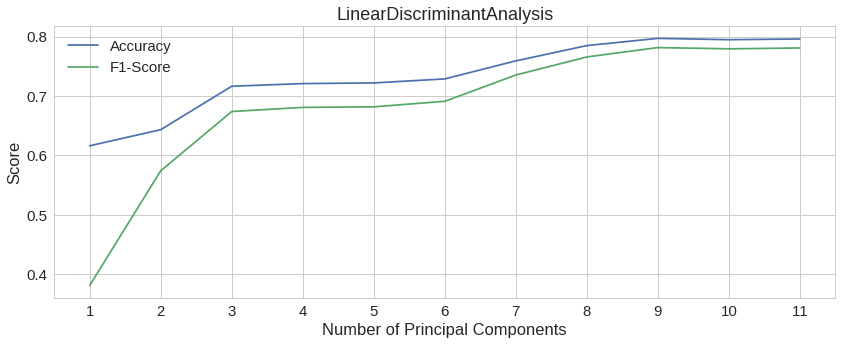


Finding Optimal Number of Principal Components for Classifier 7 of 10:
SVC


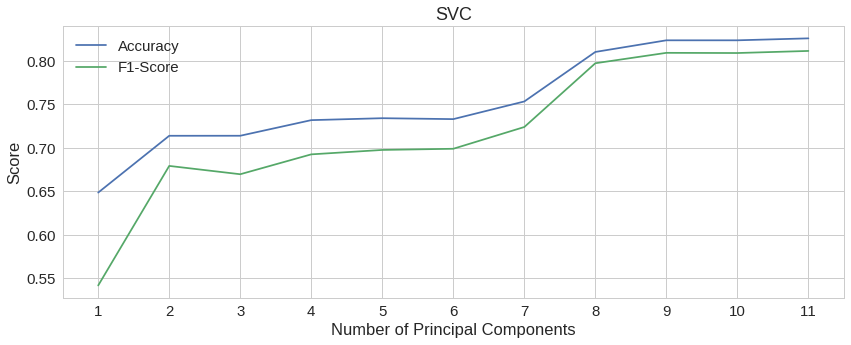


Finding Optimal Number of Principal Components for Classifier 8 of 10:
XGBClassifier


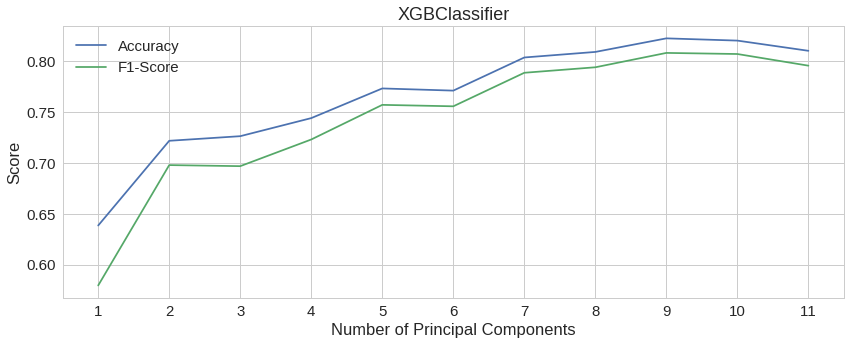


Finding Optimal Number of Principal Components for Classifier 9 of 10:
GradientBoostingClassifier


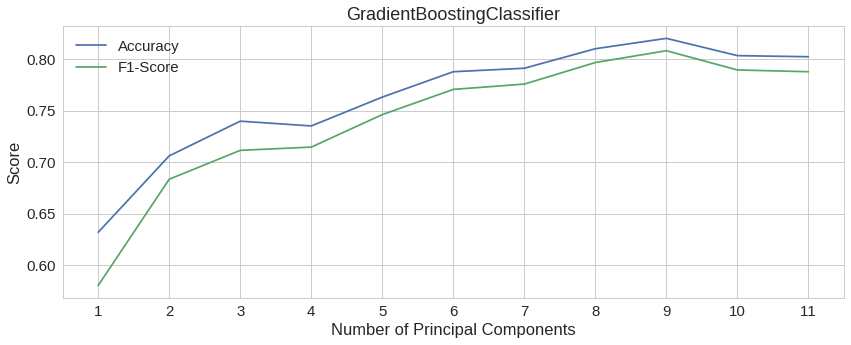


Finding Optimal Number of Principal Components for Classifier 10 of 10:
AdaBoostClassifier


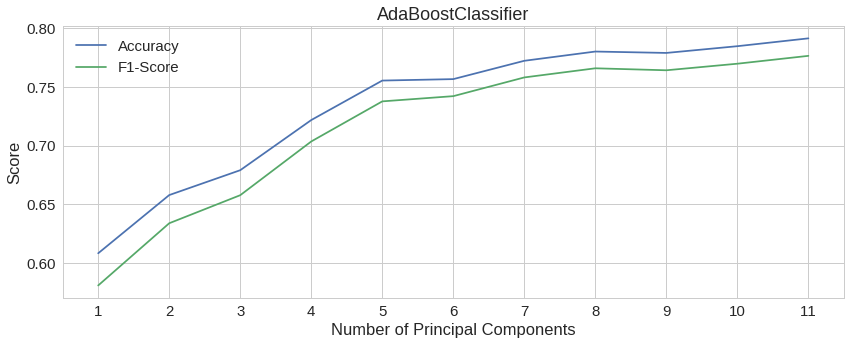

Classifier  Best Accuracy  Num Components (Best Accuracy)  \
0          LogisticRegression       0.804827                              11   
1               SGDClassifier       0.796836                               9   
2      DecisionTreeClassifier       0.754315                               7   
3         ExtraTreeClassifier       0.728508                               9   
4      RandomForestClassifier       0.808173                               9   
5  LinearDiscriminantAnalysis       0.796911                               9   
6                         SVC       0.826064                              11   
7               XGBClassifier       0.822629                               9   
8  GradientBoostingClassifier       0.820470                               9   
9          AdaBoostClassifier       0.791368                              11   

   Best F1-Score  Num Components (Best F1-Score)  
0       0.790449                              11  
1       0.777898                               9  
2       0.739355                               7  
3       0.700485                               9  
4       0.794093                               9  
5       0.781412                               9  
6       0.811590                              11  
7       0.808303                               9  
8       0.808443                               9  
9       0.776461                              11

In [111]:
comparison_PCA = compare_optimal_n_components(classifier_list, X_train_pca, y_train, 
                                              cv_splits=5, random_state=27, verbose=1, 
                                              plot_scores=True)

comparison_PCA

Findings:
* On average, our classifiers perform best when we keep 9 principal components. 

Comments:
* The f1-scores follow the accuracy scores. We haven't discussed f1-scores much here (they are essentially the harmonic mean of precision and recall), but in some cases they can provide a better indication of classifier performance. Since the f1-score behaviour just mirrors that of the accuracy in our case, we won't concern ourselves with it any further. 
* The LogisticRegression, SCV, LinearDiscriminant, and SGD classifiers all seem to go flat around 3-6 principal components, before their scores begin increasing again. Note that we found the 'Sex' feature to kick in at around principal component 5. 

Finally, let's define the PCA feature subset and calculate the associated classifier scores:

In [112]:
X_train_PCA_subset = pd.DataFrame(X_train_pca[:, :9])

clf_comp_PCA_FeatureSet, _ = train_classifier_ensemble_CV(classifiers=classifier_list, 
                                                         X_data=X_train_PCA_subset, 
                                                         y_data=y_train)

# display the comparison results
clf_comp_PCA_FeatureSet

Classifier Name  Mean Train Accuracy  \
0          LogisticRegression             0.806834   
1               SGDClassifier             0.798354   
2      DecisionTreeClassifier             0.981045   
3         ExtraTreeClassifier             0.747605   
4      RandomForestClassifier             0.981045   
5  LinearDiscriminantAnalysis             0.800849   
6                         SVC             0.839382   
7               XGBClassifier             0.914078   
8  GradientBoostingClassifier             0.931537   
9          AdaBoostClassifier             0.981045   

   Train Accuracy Standard Deviation  Mean Test Accuracy  \
0                           0.002818            0.804764   
1                           0.006357            0.796836   
2                           0.001744            0.735087   
3                           0.011017            0.728508   
4                           0.001744            0.808173   
5                           0.004173            0.796911   
6                           0.003448            0.823817   
7                           0.004699            0.822629   
8                           0.004445            0.820470   
9                           0.001744            0.778946   

   Test Accuracy Standard Deviation  Mean Test F1-Score  \
0                          0.022041            0.734637   
1                          0.033986            0.714441   
2                          0.036082            0.654512   
3                          0.038625            0.609208   
4                          0.042571            0.741154   
5                          0.025818            0.724042   
6                          0.035428            0.758005   
7                          0.034432            0.756589   
8                          0.023118            0.761385   
9                          0.039901            0.706166   

   F1-Score Standard Deviation  
0                     0.038860  
1                     0.066858  
2                     0.053913  
3                     0.056967  
4                     0.066677  
5                     0.040149  
6                     0.062391  
7                     0.053266  
8                     0.036443  
9                     0.064270

<a id='section_3_6'></a>

## 3.6 - Selecting a Feature Subset Based on our Exploratory Data Analysis 

Here we leverage our findings from Exploratory Data Analysis in an attempt to assemble the simplest subset of features providing accurate prediction. The most important features we identified (see discussion in [Section 1.5](#section_1_5)) were:

1. Sex
2. Pclass
3. AgeBin (or Age)
4. LargeGroup (or Parch)

We have a few possible substitutions (Age for AgeBin, Parch for LargeGroup) that we can try. Let's find the combination that gives the highest pooled test accuracy:

In [113]:
f_set_1 = ['Sex', 'Pclass', 'AgeBin', 'LargeGroup']
f_set_2 = ['Sex', 'Pclass', 'AgeBin', 'Parch']
f_set_3 = ['Sex', 'Pclass', 'Age', 'LargeGroup']
f_set_4 = ['Sex', 'Pclass', 'Age', 'Parch']

pooled_test_accuracies = []
for i, feature_set in enumerate([f_set_1, f_set_2, f_set_3, f_set_4], 1):
    
    clf_comparison, _ = train_classifier_ensemble_CV(classifiers=classifier_list, 
                                                     X_data=X_train[feature_set], 
                                                     y_data=y_train)
    
    pooled_test_accuracies.append(clf_comparison['Mean Test Accuracy'].mean())
    
    print('Pooled Test Accuracy for Feature Set %s: %.2f' % (i, pooled_test_accuracies[-1]))
    

Pooled Test Accuracy for Feature Set 1: 0.82
Pooled Test Accuracy for Feature Set 2: 0.80
Pooled Test Accuracy for Feature Set 3: 0.81
Pooled Test Accuracy for Feature Set 4: 0.79


So we'll use feature subset 1. Let's obtain the cross-validated classifier performances:

In [114]:
feature_subset_EDA = ['Sex', 'Pclass', 'AgeBin', 'LargeGroup']

clf_comp_EDA_FeatureSet, _ = train_classifier_ensemble_CV(classifiers=classifier_list, 
                                                         X_data=X_train[feature_subset_EDA], 
                                                         y_data=y_train)

# display the comparison results
clf_comp_EDA_FeatureSet

Classifier Name  Mean Train Accuracy  \
0          LogisticRegression             0.815937   
1               SGDClassifier             0.794612   
2      DecisionTreeClassifier             0.839257   
3         ExtraTreeClassifier             0.822296   
4      RandomForestClassifier             0.839257   
5  LinearDiscriminantAnalysis             0.812945   
6                         SVC             0.835017   
7               XGBClassifier             0.835765   
8  GradientBoostingClassifier             0.838509   
9          AdaBoostClassifier             0.839257   

   Train Accuracy Standard Deviation  Mean Test Accuracy  \
0                           0.002375            0.815938   
1                           0.008930            0.791193   
2                           0.003268            0.823791   
3                           0.008080            0.814814   
4                           0.003268            0.823804   
5                           0.007450            0.810320   
6                           0.003791            0.833879   
7                           0.003466            0.827162   
8                           0.003148            0.823792   
9                           0.003268            0.819284   

   Test Accuracy Standard Deviation  Mean Test F1-Score  \
0                          0.021398            0.744077   
1                          0.024646            0.710919   
2                          0.032576            0.758024   
3                          0.020841            0.742338   
4                          0.032135            0.758128   
5                          0.019768            0.737162   
6                          0.035852            0.767032   
7                          0.030633            0.759515   
8                          0.032976            0.757526   
9                          0.032428            0.754561   

   F1-Score Standard Deviation  
0                     0.040823  
1                     0.044105  
2                     0.062551  
3                     0.039749  
4                     0.062039  
5                     0.041616  
6                     0.066616  
7                     0.060371  
8                     0.062767  
9                     0.060721

Findings:
* Our mean train and test accuracies are similar, showing that ***this feature set achieves a superior bias-variance tradeoff compared to our other feature subsets***, and therefore should have better generalization performance. 
* The test accuracies are higher than what we obtained for PCA feature reduction, and are comparable to what was achieved using RFE. 

<a id='section_3_7'></a>

## 3.7 - Summary and Initial Comparison of Feature Subsets

Finally, let's compare the performance of our trained but yet-to-be-optimized classifiers as yielded by each of our feature sets:

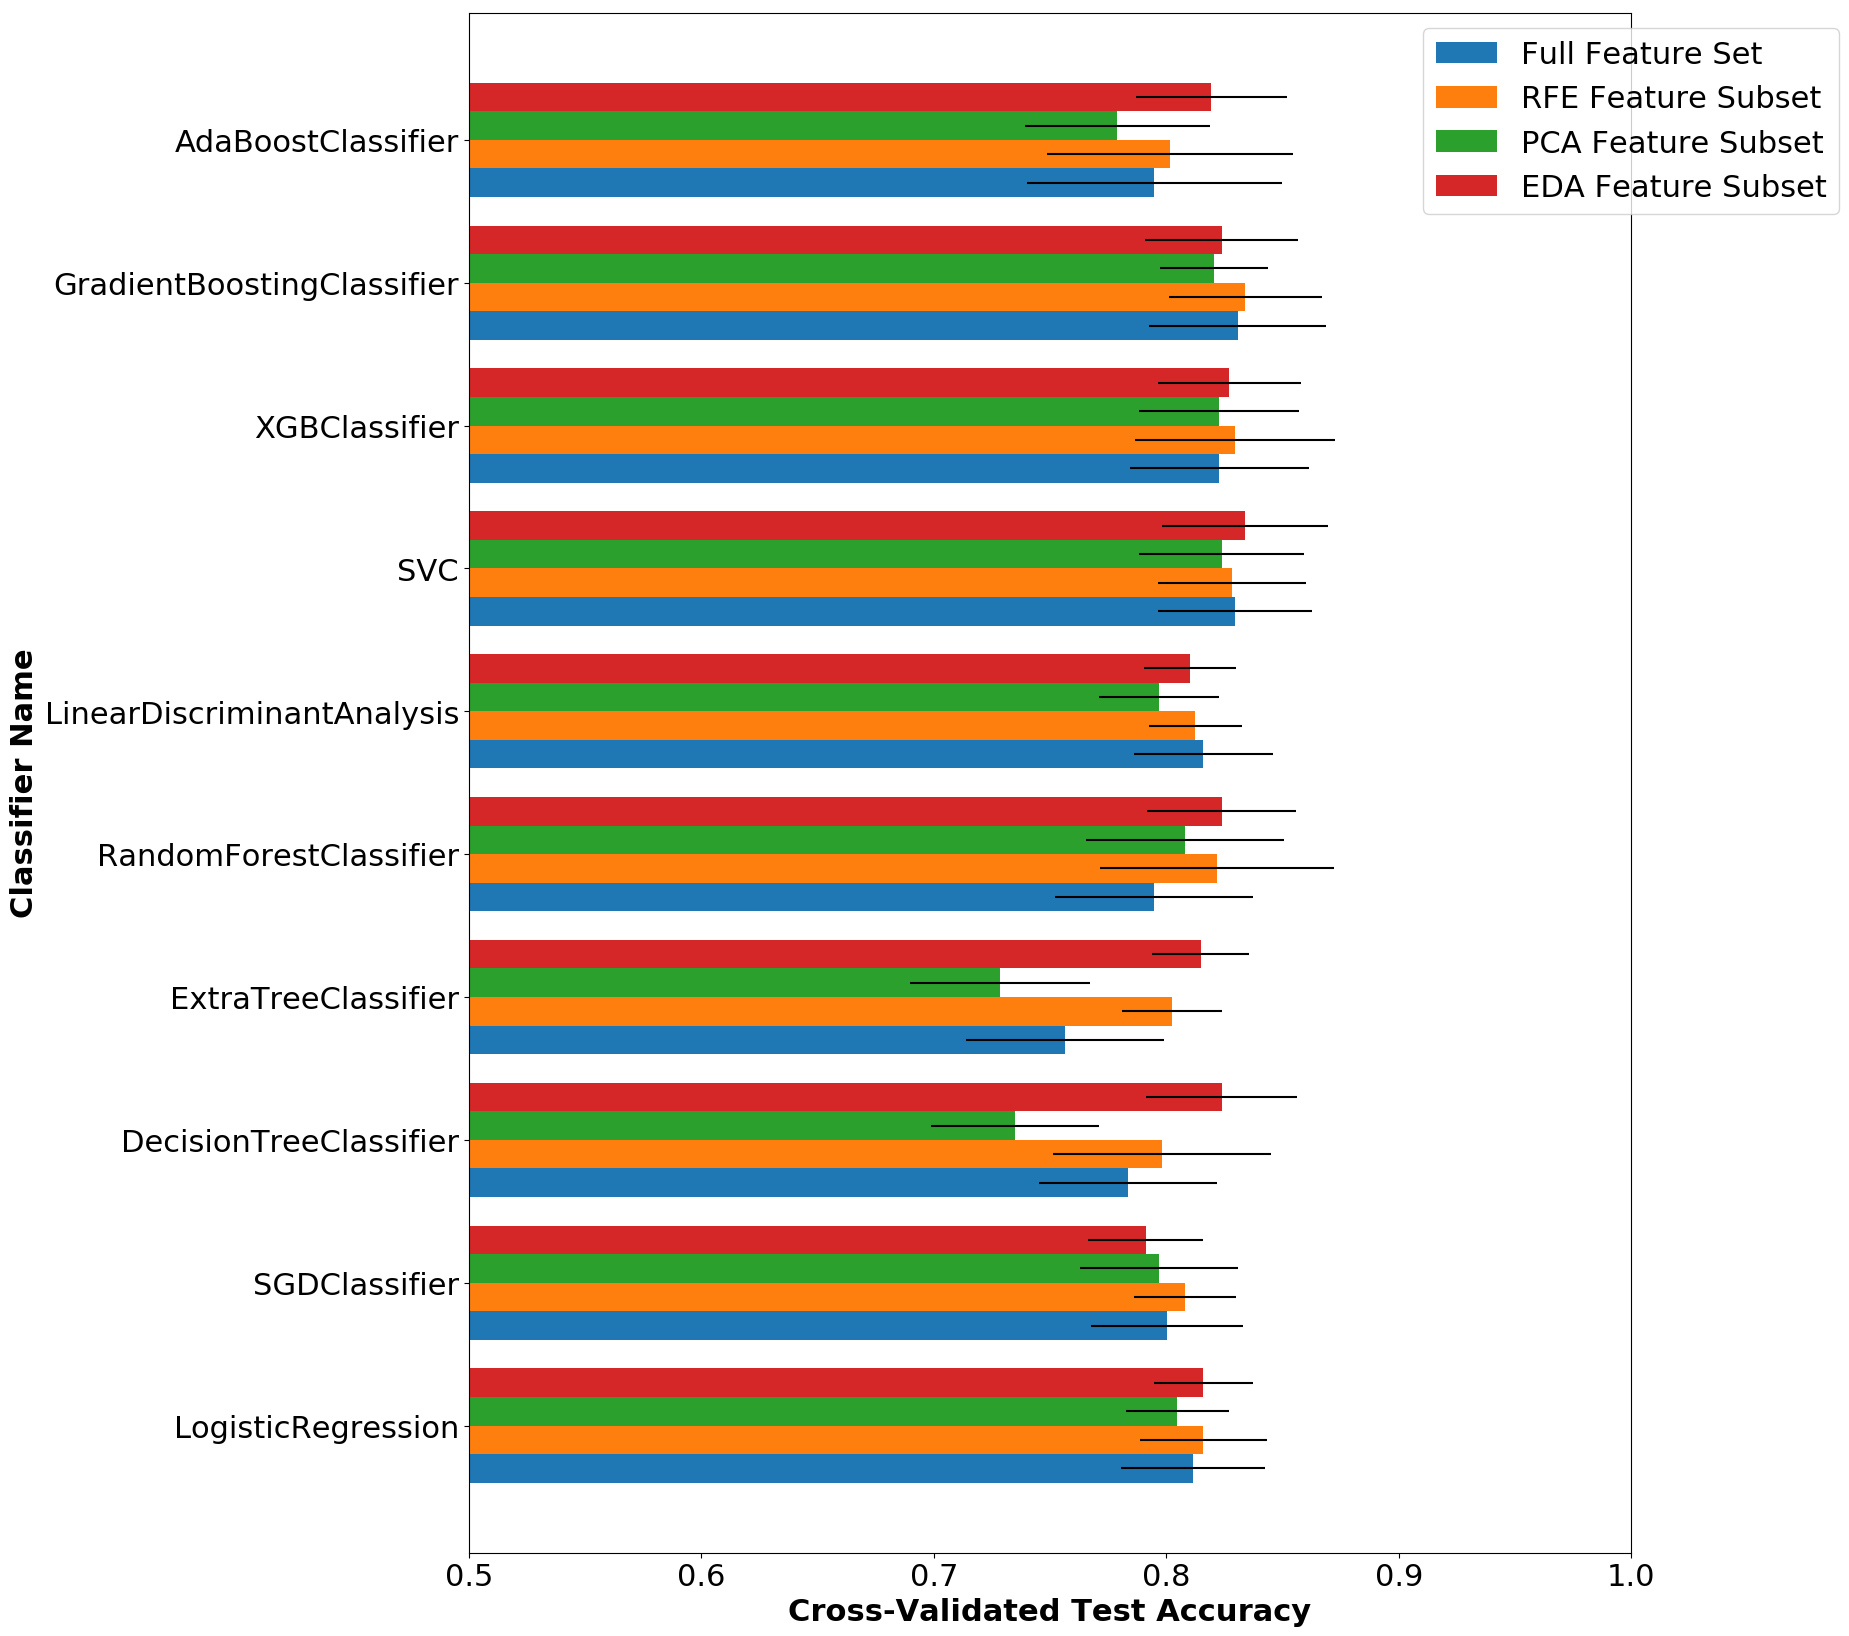

In [115]:
# plot the mean cross-validated test accuracies for each feature subset:

matplotlib.style.use('default')
matplotlib.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(figsize=(15,20))
width = 0.20
y_position = np.arange(1, clf_comp_Full_FeatureSet['Classifier Name'].shape[0] + 1)

ax.barh(y_position, clf_comp_Full_FeatureSet['Mean Test Accuracy'], width,
        xerr=clf_comp_Full_FeatureSet['Test Accuracy Standard Deviation'], 
        align='center', ecolor='black', label='Full Feature Set')

ax.barh(y_position + width, clf_comp_RFE_FeatureSet['Mean Test Accuracy'], width,
        xerr=clf_comp_RFE_FeatureSet['Test Accuracy Standard Deviation'], 
        align='center', ecolor='black', label='RFE Feature Subset')

ax.barh(y_position + 2*width, clf_comp_PCA_FeatureSet['Mean Test Accuracy'], width,
        xerr=clf_comp_PCA_FeatureSet['Test Accuracy Standard Deviation'], 
        align='center', ecolor='black', label='PCA Feature Subset')

ax.barh(y_position + 3*width, clf_comp_EDA_FeatureSet['Mean Test Accuracy'], width,
        xerr=clf_comp_EDA_FeatureSet['Test Accuracy Standard Deviation'], 
        align='center', ecolor='black', label='EDA Feature Subset')

ax.set_xlim([0.5, 1.0])
ax.set_xlabel('Cross-Validated Test Accuracy', fontweight='bold')

ax.set_yticks(y_position + 1.5*width)
ax.set_yticklabels(clf_comp_Full_FeatureSet['Classifier Name'].values)
ax.set_ylabel('Classifier Name', fontweight='bold')

ax.legend(loc=9, bbox_to_anchor=(1.0, 1.0))

plt.show()

Findings:
* **The EDA Feature Subset** yields the highest accuracies for the AdaBoost, SVC, RandomForest, ExtraTree, DecisionTree, and LogisticRegression classifiers. 
* **The RFE Feature Subset** yields the highest accuracies for the GradientBoosting, XGB, and SGD classifiers. 
* **The PCA Feature Subset** yields the lowest accuracy for almost every classifier.

We can also get an idea of overall performance by comparing the pooled accuracies (averaged over all classifiers):

In [116]:
print('Full Feature Set Pooled Test Accuracy: %.3f' % clf_comp_Full_FeatureSet['Mean Test Accuracy'].mean())
print('RFE Feature Subset Pooled Test Accuracy: %.3f' % clf_comp_RFE_FeatureSet['Mean Test Accuracy'].mean())
print('PCA Feature Subset Pooled Test Accuracy: %.3f' % clf_comp_PCA_FeatureSet['Mean Test Accuracy'].mean())
print('EDA Feature Subset Pooled Test Accuracy: %.3f' % clf_comp_EDA_FeatureSet['Mean Test Accuracy'].mean())

Full Feature Set Pooled Test Accuracy: 0.804
RFE Feature Subset Pooled Test Accuracy: 0.815
PCA Feature Subset Pooled Test Accuracy: 0.792
EDA Feature Subset Pooled Test Accuracy: 0.818


So we see that the EDA feature subset gives the overall best accuracy, with the RFE subset following close behind. 

But test accuracy isn't the whole picture. We also want good generalization performance. So now let's consider the absolute difference between the training and test accuracies. This gives us an idea of the bias-variance trade-off, where a higher absolute difference implies greater overfitting and therefore poorer generalization performance:

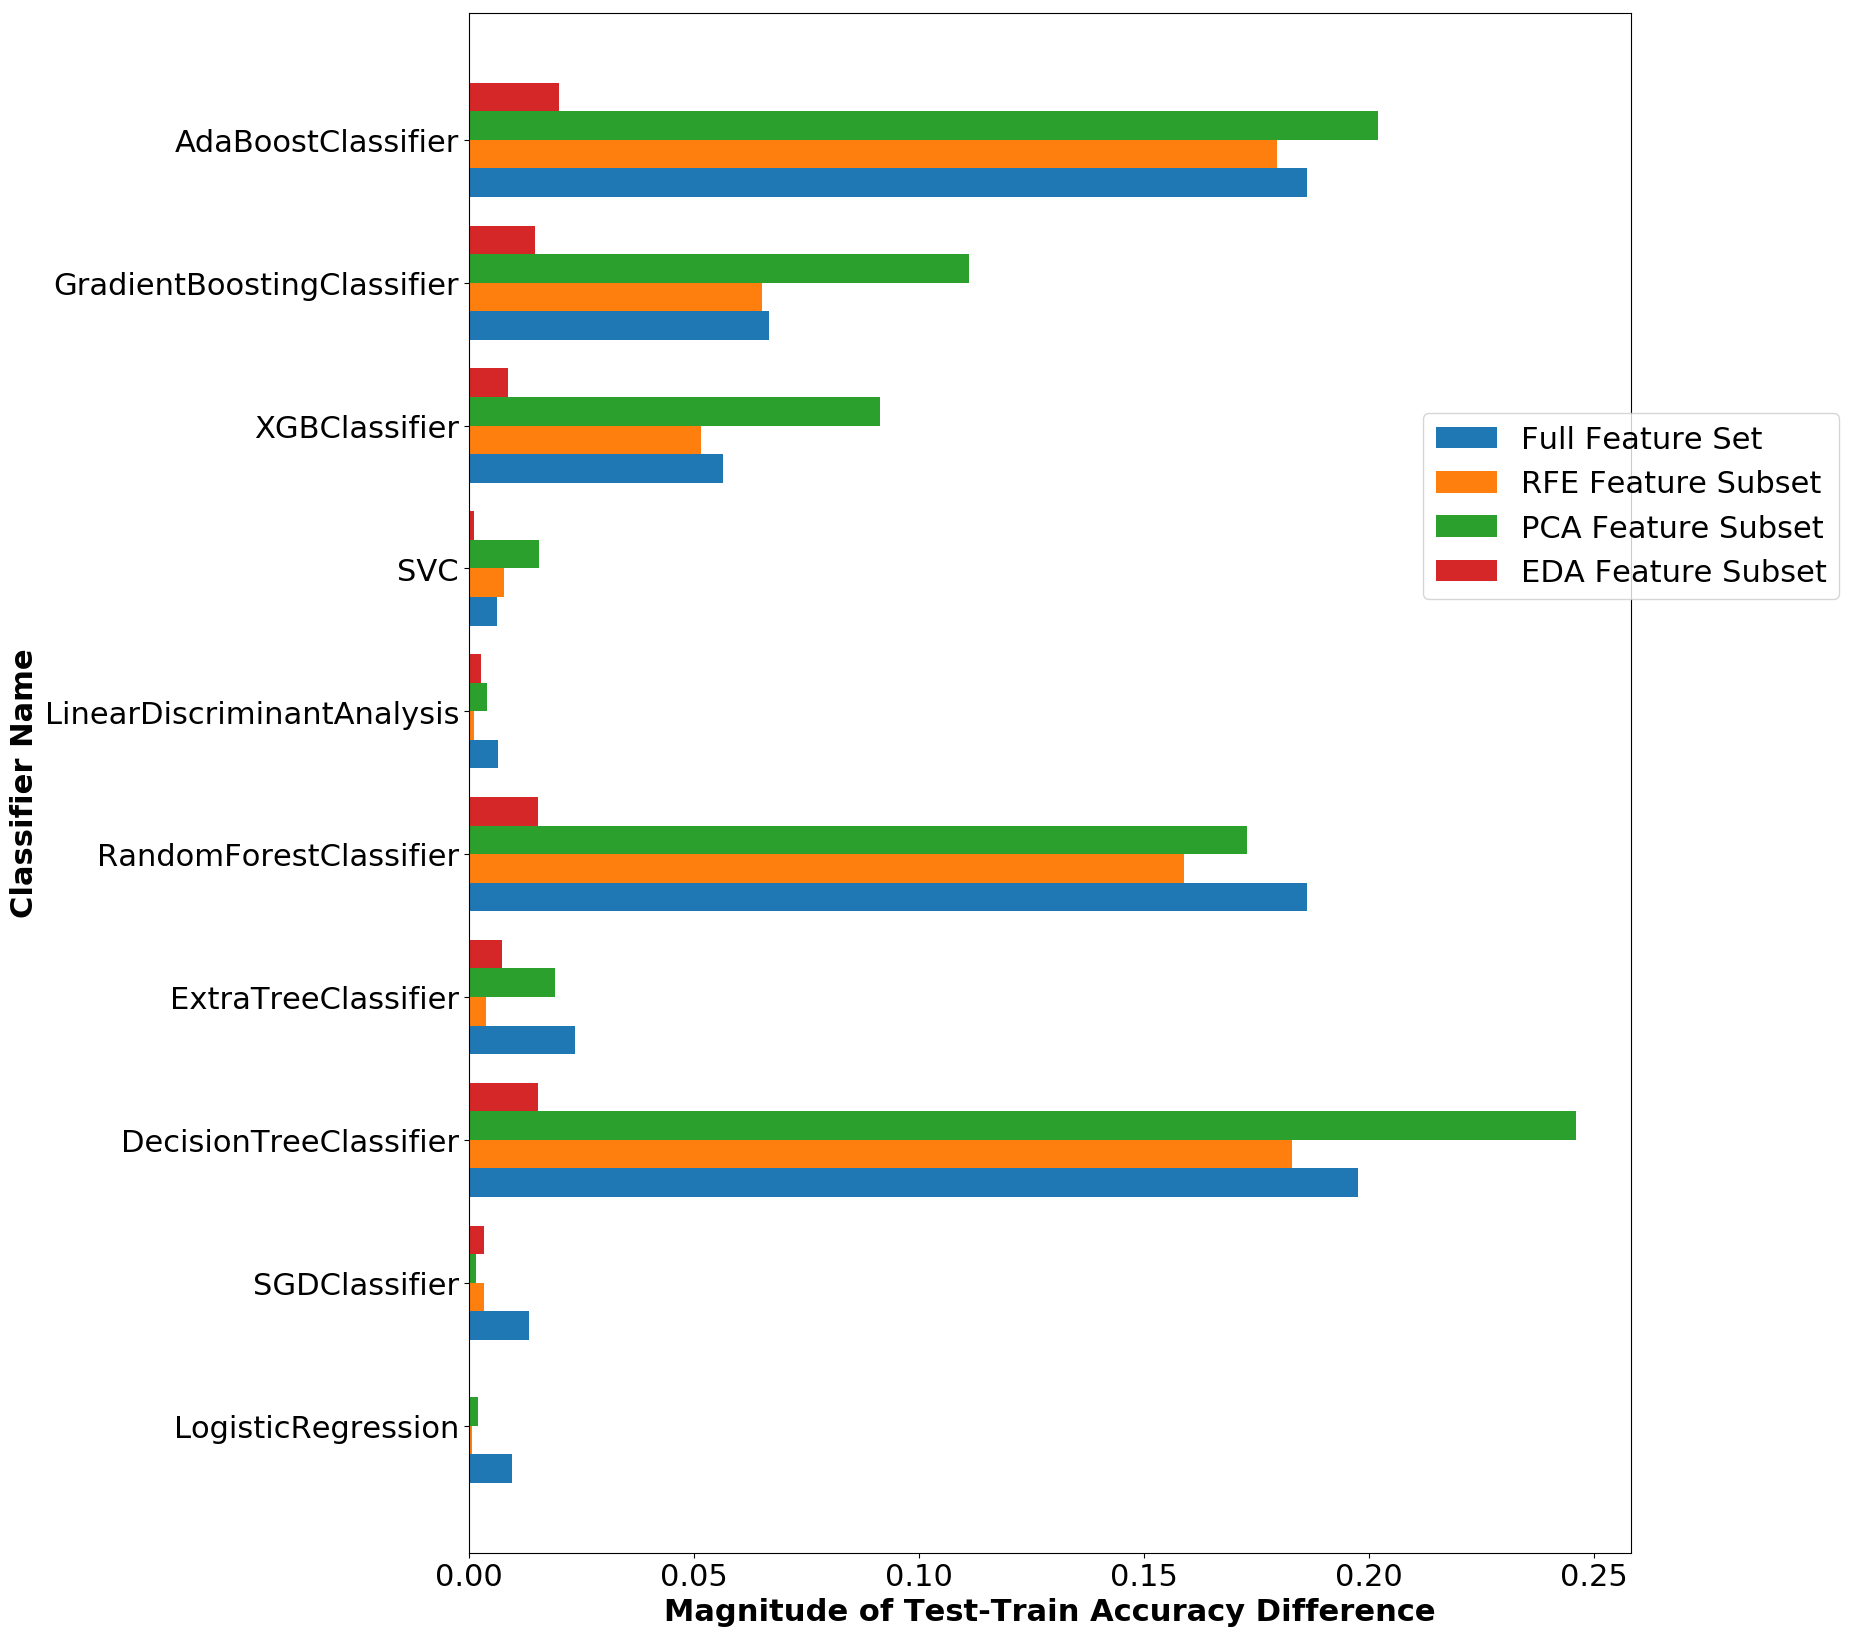

In [117]:
matplotlib.style.use('default')
matplotlib.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(figsize=(15,20))
width = 0.20
y_position = np.arange(1, clf_comp_Full_FeatureSet['Classifier Name'].shape[0] + 1)

diffs_Full_set = abs(clf_comp_Full_FeatureSet['Mean Test Accuracy'] - 
                     clf_comp_Full_FeatureSet['Mean Train Accuracy'])
ax.barh(y_position, diffs_Full_set, width, align='center', ecolor='black', label='Full Feature Set')

diffs_RFE_set = abs(clf_comp_RFE_FeatureSet['Mean Test Accuracy'] - 
                    clf_comp_RFE_FeatureSet['Mean Train Accuracy'])
ax.barh(y_position + width, diffs_RFE_set, width,
        align='center', ecolor='black', label='RFE Feature Subset')

diffs_PCA_set = abs(clf_comp_PCA_FeatureSet['Mean Test Accuracy'] - 
                    clf_comp_PCA_FeatureSet['Mean Train Accuracy'])
ax.barh(y_position + 2*width, diffs_PCA_set, width,
        align='center', ecolor='black', label='PCA Feature Subset')

diffs_EDA_set = abs(clf_comp_EDA_FeatureSet['Mean Test Accuracy'] - 
                    clf_comp_EDA_FeatureSet['Mean Train Accuracy'])
ax.barh(y_position + 3*width, diffs_EDA_set, width,
        align='center', ecolor='black', label='EDA Feature Subset')

ax.set_xlabel('Magnitude of Test-Train Accuracy Difference', fontweight='bold')

ax.set_yticks(y_position + 1.5*width)
ax.set_yticklabels(clf_comp_Full_FeatureSet['Classifier Name'].values)
ax.set_ylabel('Classifier Name', fontweight='bold')

ax.legend(loc=9, bbox_to_anchor=(1.0, 0.75))

plt.show()

Findings:
* We see that the EDA feature subset is far superior to the other feature subsets in terms of not overfitting the training data. 
* A bit surprisingly, it is the PCA feature subset that suffers from the worst generalization performance, rather than the full feature set. 

We print the pooled test-train absolute accuracy differences below:

In [118]:
print('Pooled Absolute Test-Train Accuracy Difference for...')
print('... Full Feature Set: %.3f %%' % (100.0*diffs_Full_set.mean()))
print('... RFE Feature Subset: %.3f %%' % (100.0*diffs_RFE_set.mean()))
print('... PCA Feature Subset: %.3f %%' % (100.0*diffs_PCA_set.mean()))
print('... EDA Feature Subset: %.3f %%' % (100.0*diffs_EDA_set.mean()))


Pooled Absolute Test-Train Accuracy Difference for...
... Full Feature Set: 7.525 %
... RFE Feature Subset: 6.551 %
... PCA Feature Subset: 8.656 %
... EDA Feature Subset: 0.889 %


We see that this difference is almost an order of magnitude smaller for the EDA feature subset compared to the others.

It seems clear that the EDA feature subset is the most promising to continue working with. However, we'll also let the RFE feature set tag along, and see how that does once we've tuned up our classifiers. 

***

<a id='section_4'></a>

# 4) Model Optimization and Selection

Having explored feature importances, our goal now is to obtain an optimized classification algorithm for submitting test-set predictions to Kaggle. 

We will begin by optimizing the hyperparameters of our existing classifier set to further improve their performance. For this we'll make use of the cross-validated ***GridSearch*** technique that exhaustively checks permutations of specified hyperparameters and identifies the best-performing combinations. We'll then use ***validation curves*** for fine-tuning some of these hyperparameters, along with ***learning curves*** to verify that our classifiers have maintained good bias-variance tradeoff. 

Once our classifiers are tuned up, we'll experiment with different ways of ensembling them, namely through classifier ***voting*** and ***stacking***, to obtain a composite classifier whose performance exceeds that of any of its individual constituent classifiers.

<a id='section_4_1'></a>

## 4.1 - Exhaustive Hyperparameter Selection with GridSearch 

Below we define a function that takes a list of classifiers and corresponding 'grids' of hyperparameters to try out, and performs a cross-validated GridSearch to find the parameter combination that yields the highest score for each. (Recall: a hyperparameter is merely a model parameter that is set *before* training begins.)

In [119]:
def tune_classifier_ensemble(classifiers, param_grids, X_data, y_data, 
                             cv_splits=10, score='accuracy', verbose=True):
    """
    Tune classifier hyperparameters using cross-validated GridSearch and return the best results. 
    
    : param classifiers : List of classifier objects, assumed to have scikit-learn wrappers. 
    
    : param param_grids : List of dictionaries containing the hyperparameters to search over, 
                          matching the list of classifier objects specified in 'classifiers'.
                          Eah dictionary must have the form {'param_1' : [param_1_value_list], 
                          'param_2' : [param_2_value_list], ... }, where all specified values 
                          must be given as a list, even if single-entried. 
    
    : param X_data : Pandas dataframe containing the training feature data. 
    
    : param y_data : Pandas dataframe containing the training class labels. 
    
    : param cv_splits : Integer number of cross-validation splits. 
    
    : param score : String, cross-validated scoring metric, 'accuracy' or 'f1-score'. 
    
    : param verbose : Boolean, when true the results are printed for each classifier as they are computed. 
    
    : return best_algorithms : A list containing the input classifier objects after fitting on the best
                               hyperparameter set. 
                               
    : return best_scores : A list of the best-obtained cross-validated test score for each classifier, 
                           corresponding to the best combination of hyperparameters found. 
    
    : return best_parameters : A list of dictionaries containing the best combination of hyperparameters 
                               that yielded the highest cross-validated test score for each classifier. 
                               
    """
    
    kfold = StratifiedKFold(n_splits=cv_splits, random_state=27)
    
    best_algorithms = []
    best_scores = []
    best_parameters = []
    total_calc_time = 0.0
    
    for clf, grid in zip(classifiers, param_grids):
    
        start_time = time.time()  # for tracking GridSearch execution time
        
        gs = GridSearchCV(estimator=clf, param_grid=grid, cv=kfold, scoring=score, n_jobs=-1)

        gs.fit(X_data, y_data)
        
        best_algorithms.append(gs.best_estimator_)
        best_scores.append(gs.best_score_)
        best_parameters.append(gs.best_params_)
        
        this_calc_time = time.time() - start_time
        total_calc_time += this_calc_time
        
        if verbose is True:
            print('*** Classifier', len(best_algorithms), 'of', len(classifiers), '***')
            print('Classifier Type:', type(best_algorithms[-1]))
            print('Best Score: %.4f' % best_scores[-1])
            print('Best Parameter Set:', best_parameters[-1])
            print('(GridSearch Execution Time: %.2f seconds)' % this_calc_time)
            print('\n')
            
    if verbose is True:
        print('Total GridSearch Execution Time: %.2f seconds.' % total_calc_time)
            
    return best_algorithms, best_scores, best_parameters


We will begin by using the function we just defined to perform initial hyperparameter tuning on the entire classifier set. Afterwards we will aim to fine-tune each classifier with the help of learning and validation curves. 

Below we define our classifiers and the sets of parameter permutations we wish to exhaustively explore with GridSearch:

In [120]:
random_state = 27  # seed for random-number generators, to provide reproducibility


# *** Logistic Regression Classifier ***
lr = LogisticRegression()

lr_param_grid = {'random_state' : [random_state], 
                 'penalty' : ['l2'], 
                 'solver' : ['lbfgs'], 
                 'C' : [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}  # regularization strength 


# *** Stochastic Gradient Descent with Linear SVC ***
sgd = SGDClassifier()

sgd_param_grid = {'random_state' : [random_state],
                  'alpha' : [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}  # regularization multiplier 


# *** Decision Tree Classifier ***
dtc = DecisionTreeClassifier()

dtc_param_grid = {'random_state' : [random_state],
                  'criterion' : ['gini'],
                  'max_depth' : [None, 3, 5, 7, 10],
                  'min_samples_leaf' : [1, 5, 10], 
                  'min_samples_split' : [2, 5, 10],
                  'max_features': [None, 1, 2, 3, 4]}


# *** ExtraTree Classifier ***
# (highly-randomized version of a Decision Tree)
etc = ExtraTreeClassifier()

etc_param_grid = {'random_state' : [random_state],
                  'criterion' : ['gini'],
                  'max_depth' : [None, 3, 5, 7, 10],
                  'min_samples_leaf' : [1, 5, 10], 
                  'min_samples_split' : [2, 5, 10],
                  'max_features': [None, 1, 2, 3, 4],
                  'splitter': ['best', 'random']}


# *** Random Forest Classifier ***
rfc = RandomForestClassifier()

rfc_param_grid = {'random_state' : [random_state],
                  'criterion' : ['gini'],
                  'max_features': [None, 2, 3, 4],
                  'n_estimators': [100, 1000]}


# *** Linear Discriminant Analysis Classifier ***
lda = LinearDiscriminantAnalysis()

lda_param_grid = {'n_components' : [2, 3, 4],
                  'solver' : ['svd', 'lsqr']}


# *** SVC Classifier (C-Support Vector Classification) ***
svc = SVC()

svc_param_grid = {'random_state' : [random_state],
                  'C' : [0.5, 1.0, 2.0, 4.0],
                  'gamma' : ['auto'],
                  'kernel' : ['rbf', 'linear', 'poly', 'sigmoid'],
                  'shrinking' : [True, False]}


# *** XGBooster ***
xgb = XGBClassifier()

xgb_param_grid = {'seed' : [random_state],
                  'booster' : ['gbtree'],
                  'learning_rate' : [0.05, 0.1, 0.3], 
                  'max_depth' : [3, 6, 10],
                  'subsample' : [0.2, 0.5, 1.0], 
                  'colsample_bytree' : [0.1, 0.2, 0.5],
                  'reg_lambda' : [1.0, 1.5, 2.0, 2.5],
                  'reg_alpha' : [0.0, 0.5, 0.7]}


# *** Gradient Boosting Classifier ***
gbc = GradientBoostingClassifier()

gbc_param_grid = {'random_state' : [random_state], 
                  'loss' : ['deviance'],
                  'learning_rate': [0.01, 0.05, 0.1],
                  'n_estimators' : [250, 500],
                  'max_depth': [3, 6, 9],
                  'min_samples_leaf': [1, 5],
                  'max_features': [0.25, 0.50, 0.75, 1.0]  # specified here as percentage of max features
                 }


# *** AdaBoost on a Decision Tree Classifier ***
ada = AdaBoostClassifier(DecisionTreeClassifier())

ada_param_grid = {'random_state' : [random_state],
                  'base_estimator__criterion' : ['gini'],
                  'base_estimator__max_depth' : [5],
                  'base_estimator__min_samples_leaf' : [10], 
                  'base_estimator__min_samples_split' : [2],
                  'base_estimator__max_features': [2, 3, 4], 
                  'base_estimator__splitter' : ['best'], 
                  'algorithm' : ['SAMME', 'SAMME.R'], 
                  'n_estimators' : [10, 25, 50, 100], 
                  'learning_rate' : [0.01, 0.1, 1.0, 1.5] }


# Assemble classifier and param_grid lists:
classifier_list = [lr, 
                   sgd, 
                   dtc, 
                   etc, 
                   rfc, 
                   lda, 
                   svc, 
                   xgb, 
                   gbc, 
                   ada]

param_grid_list = [lr_param_grid, 
                   sgd_param_grid,
                   dtc_param_grid, 
                   etc_param_grid, 
                   rfc_param_grid, 
                   lda_param_grid, 
                   svc_param_grid, 
                   xgb_param_grid, 
                   gbc_param_grid, 
                   ada_param_grid]


Next we run the GridSearch, using the **EDA feature subset** that we identified during Feature Selection in [Section 3.6](#section_3_6).

In [121]:
best_algorithms, best_scores, best_parameters = tune_classifier_ensemble(classifiers=classifier_list, 
                                                                         param_grids=param_grid_list, 
                                                                         X_data=X_train[feature_subset_EDA], 
                                                                         y_data=y_train)


*** Classifier 1 of 10 ***
Classifier Type: <class 'sklearn.linear_model.logistic.LogisticRegression'>
Best Score: 0.8159
Best Parameter Set: {'C': 1.0, 'penalty': 'l2', 'random_state': 27, 'solver': 'lbfgs'}
(GridSearch Execution Time: 0.56 seconds)


*** Classifier 2 of 10 ***
Classifier Type: <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'>
Best Score: 0.7969
Best Parameter Set: {'alpha': 0.1, 'random_state': 27}
(GridSearch Execution Time: 0.25 seconds)


*** Classifier 3 of 10 ***
Classifier Type: <class 'sklearn.tree.tree.DecisionTreeClassifier'>
Best Score: 0.8328
Best Parameter Set: {'criterion': 'gini', 'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 2, 'random_state': 27}
(GridSearch Execution Time: 1.44 seconds)


*** Classifier 4 of 10 ***
Classifier Type: <class 'sklearn.tree.tree.ExtraTreeClassifier'>
Best Score: 0.8350
Best Parameter Set: {'criterion': 'gini', 'max_depth': 5, 'max_features': 1, 'min_samples_leaf': 1, 'min_sa

Comments:
* If we were to repeat this GridSearch hyperparameter optimization using our full feature set and compare it to the above results, we would find that that the EDA feature subset still provides comparable or better performance accuracies, on all classifiers except for RandomForest and LDA; of course, as we found earlier, the EDA feature subset has the superior bias-variance tradeoff. 

<a id='section_4_2'></a>

## 4.2 - Fine-Tuning Our Classifiers Using Validation Curves

Having done a rather 'coarse' hyperparameter sweep during GridSearch, we will now focus on individual hyperparameters to see if fine-tuning can increase performance further. For this we will use **validation curves**, which display cross-validated test scores for both training and validation data subsets as a function of a swept hyperparameter value. 

We will also define a function for checking the bias-variance tradeoff of our tuned classifiers using **learning curves**, which plot training and test (validation) scores as a function of the number of training samples. Ideally, we'd like to see the train and test scores converge as we increase the size of the training set. Convergence also tells us that we have a sufficient number of training samples for building our model (i.e. that adding additional training samples would not further improve the performance). 

In [122]:
def get_validation_curve(classifier, X_data, y_data, param_feed, cv_splits=10, 
                         figure_size=(7, 5), x_scale='linear', y_lim=[0.70, 1.0]):
    """
    Generates a validation curve over a specified range of hyperparameter values for a given classifier,
    and prints the optimal values yielding i) the highest cross-validated mean accuracy and ii) the smallest
    absolute difference between the mean test and train accuracies (to assess overfitting). 
    
    : param classifier : Classifier object, assumed to have a scikit-learn wrapper. 
    
    : param X_data : Pandas dataframe containing the training feature data. 
    
    : param y_data : Pandas dataframe containing the training class labels. 
    
    : param param_feed : Dictionary of form {'parameter_name' : parameter_values}, where parameter_values
                         is a list or numpy 1D-array of parameter values to sweep over. 
               
    : param cv_splits : Integer number of cross-validation splits. 
    
    : param figure_size : Tuple of form (width, height) specifying figure size. 
    
    : param x_scale : String, 'linear' or 'log', controls x-axis scale type of plot. 
    
    : param y_lim : List of form [y_min, y_max] for setting the plot y-axis limits. 
    
    : return : None. 
    
    """
    base_param_name = list(param_feed.keys())[0]
    param_range_ = param_feed[base_param_name]
    
    piped_clf = Pipeline([('clf', classifier)]) # I use this merely to assign the handle 'clf' to our classifier

    # Obtain the cross-validated scores as a function of hyperparameter value
    train_scores, test_scores = validation_curve(estimator=piped_clf,
                                                 X=X_train[feature_subset_EDA],
                                                 y=y_train,
                                                 param_name='clf__' + base_param_name,
                                                 param_range=param_range_,
                                                 cv=cv_splits)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Generate the validation curve plot
    sns.set(font_scale=1.5)
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=figure_size)

    plt.plot(param_range_, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between(param_range_, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(param_range_, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
    plt.fill_between(param_range_, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

    plt.xscale(x_scale)
    plt.xlabel(base_param_name)
    plt.ylim(y_lim)
    plt.ylabel('Accuracy')
    plt.grid(b=True, which='major', color='black', linestyle=':')
    plt.legend(loc='lower right')
    plt.title('Validation Curve for Parameter ' + base_param_name)
    plt.show()

    # Display optimal parameter values for best accuracy and smallest train-test difference
    diffs = abs(train_mean - test_mean)
    id_best_diff = np.argmin(diffs)
    id_best_acc = np.argmax(test_mean)
    
    print('Best Accuracy is %.5f occuring at %s = %s' % (test_mean[id_best_acc],
                                                         base_param_name,
                                                         param_range_[id_best_acc]))
    
    
    print('Smallest Train-Test Difference is %.5f occuring at %s = %s' % (diffs[id_best_diff],
                                                                          base_param_name,
                                                                          param_range_[id_best_diff]))
    
    return


def get_learning_curve(classifier, X_data, y_data, training_sizes=np.linspace(0.1, 1.0, 10), cv_splits=10,
                       figure_size=(7, 5), y_lim=[0.70, 1.0]):
    """
    Generates a learning curve to asses bias-variance tradeoff by plotting cross-validated train and test
    accuracies as a function of the number of samples used for training. 
    
    : param classifier : Classifier object, assumed to have a scikit-learn wrapper. 
    
    : param X_data : Pandas dataframe containing the training feature data. 
    
    : param y_data : Pandas dataframe containing the training class labels. 
    
    : param training_sizes : Numpy 1D array of the training sizes to sweep over, specified as fractions
                             of the total training set size. 
               
    : param cv_splits : Integer number of cross-validation splits. 
    
    : param figure_size : Tuple of form (width, height) specifying figure size. 
        
    : param y_lim : List of form [y_min, y_max] for setting the plot y-axis limits. 
    
    : return : None. 
    
    """
    # Obtain the cross-validated scores as a function of the training size
    train_sizes, train_scores, test_scores = learning_curve(estimator=classifier,
                                                            X=X_data,
                                                            y=y_data,
                                                            train_sizes=training_sizes,
                                                            cv=cv_splits,
                                                            n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Generate the learning curve plot
    sns.set(font_scale=1.5)
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=figure_size)
    
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='red', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='red')
    
    plt.xlabel('Number of Training Samples')
    plt.ylim(y_lim)
    plt.ylabel('Accuracy')
    plt.grid(b=True, which='major', color='black', linestyle=':')
    plt.legend(loc=4)
    plt.title('Learning Curve')
    plt.show()
    
    return
    

I have explored fine-tuning for each of our classifiers, and in most cases we were already at the optimum, so below I  highlight only the cases where this leads to a non-trivial improvement. 

### ***Fine-Tuning the SGD Classifier:***

*Results from our GridSearch:*
* Best Score: 0.7969
* Best Parameter Set: {'alpha': 0.1}

First we can try fine-tuning *alpha* in the vicinity of 0.1. Alpha is the constant multiplying the regularization term. 

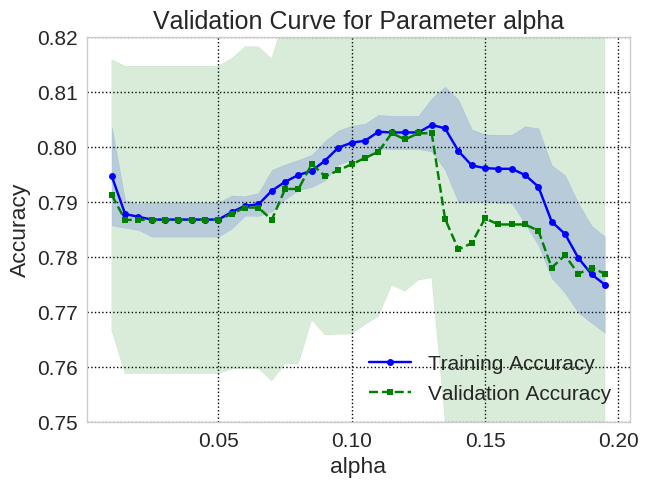

Best Accuracy is 0.80245 occuring at alpha = 0.11499999999999998
Smallest Train-Test Difference is 0.00006 occuring at alpha = 0.024999999999999998


In [123]:
alpha_feed = np.arange(0.01, 0.2, 0.005)

get_validation_curve(best_algorithms[1], X_data=X_train[feature_subset_EDA], y_data=y_train, 
                     param_feed={'alpha' : alpha_feed}, 
                     cv_splits=10, figure_size=(7, 5), x_scale='linear', y_lim=[0.75, 0.82])

So it appears we can do a little better in accuracy. Let's set *alpha=0.12*, where we have higher accuracy and little difference between the training and validation accuracies, while giving us some buffer before things drop off near *alpha=0.13* where there might be some instability. 

In [124]:
best_algorithms[1].set_params(**{'alpha': 0.12, 'n_jobs': -1})

SGDClassifier(alpha=0.12, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=27, shuffle=True,
       tol=None, verbose=0, warm_start=False)

We can also try changing the loss scheme to from 'hinge' to 'huber' and tune *epsilon* (which determines the threshold at which it becomes less important to get the prediction exactly right):

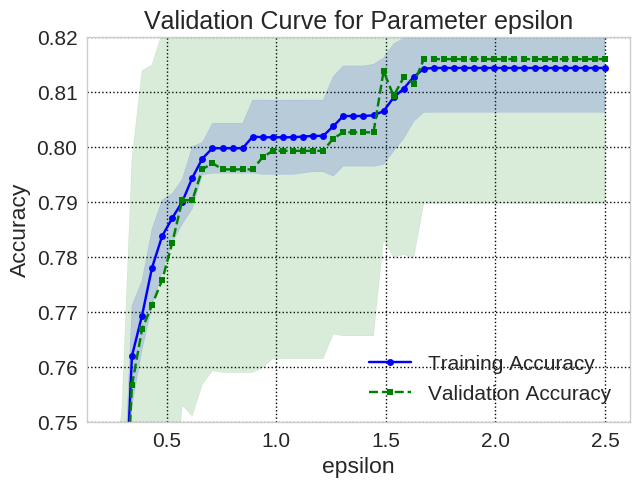

Best Accuracy is 0.81593 occuring at epsilon = 1.6734693877551021
Smallest Train-Test Difference is 0.00027 occuring at epsilon = 0.5714285714285714


In [125]:
best_algorithms[1].set_params(**{'loss': 'huber'})

epsilon_feed = np.linspace(0.25, 2.5, 50)

get_validation_curve(best_algorithms[1], X_data=X_train[feature_subset_EDA], y_data=y_train, 
                     param_feed={'epsilon' : epsilon_feed}, 
                     cv_splits=10, figure_size=(7, 5), x_scale='linear', y_lim=[0.75, 0.82])


Using the 'huber' loss method results in a higher accuracy, and a good setting for epsilon where we achieve high accuracy but also some stability is *epsilon=2.0*. So let's update our classifier parameters accordingly:

In [126]:
best_algorithms[1].set_params(**{'epsilon': 2.0})

SGDClassifier(alpha=0.12, average=False, class_weight=None, epsilon=2.0,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='huber', max_iter=None, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=27, shuffle=True,
       tol=None, verbose=0, warm_start=False)

Finally, let's assess the bias-variance tradeoff by plotting a learning curve for this classifier:

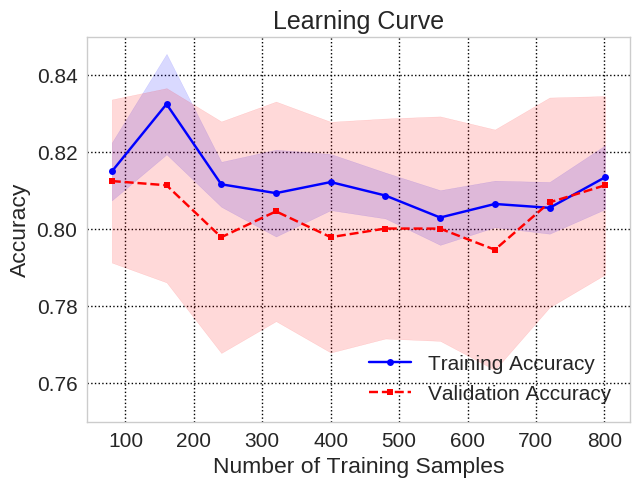

In [127]:
get_learning_curve(best_algorithms[1], X_data=X_train[feature_subset_EDA], y_data=y_train,
                   cv_splits=10, figure_size=(7, 5), y_lim=[0.75, 0.85])

With our current parameter set, the training and validation accuracies appear to converge. The rate of convergence for this SGD classifier is remarkably fast compared to what we might typically expect. Perhaps this is due to the simplicity of our model?

### ***Fine-Tuning the Decision Tree Classifier:***

> *Results from our GridSearch:*
> * Best Score: 0.8328
> * Best Parameter Set: {'criterion': 'gini', 'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}


We can gain a slight accuracy increase if we tune over *min_samples_leaf*:

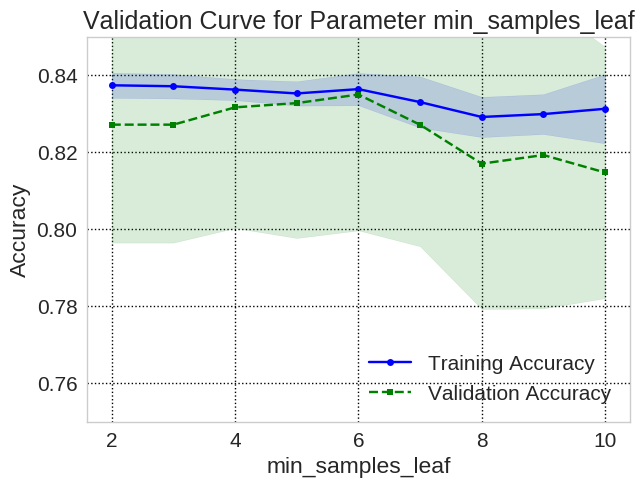

Best Accuracy is 0.83499 occuring at min_samples_leaf = 6
Smallest Train-Test Difference is 0.00140 occuring at min_samples_leaf = 6


In [128]:
min_samples_leaf_feed = [2, 3, 4, 5, 6, 7, 8, 9, 10]

get_validation_curve(best_algorithms[2], X_data=X_train[feature_subset_EDA], y_data=y_train, 
                     param_feed={'min_samples_leaf' : min_samples_leaf_feed}, 
                     cv_splits=10, figure_size=(7, 5), x_scale='linear', y_lim=[0.75, 0.85])

We find that *min_samples_leaf=6* is slightly better than our previous setting, so let's update our parameters:

In [129]:
best_algorithms[2].set_params(**{'min_samples_leaf' : 6})

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=6,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=27, splitter='best')

Next we'll view the learning curve:

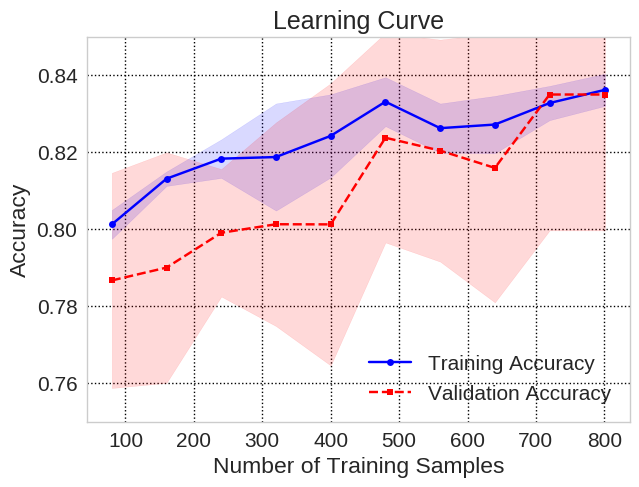

In [130]:
get_learning_curve(best_algorithms[2], X_data=X_train[feature_subset_EDA], y_data=y_train,
                   cv_splits=10, figure_size=(7, 5), y_lim=[0.75, 0.85])

We obtain good training/validation convergence at 800 training samples. 

### ***Fine-Tuning the RandomForest Classifier:***

> *Results from our GridSearch:*
> * Best Score: 0.8238
> * Best Parameter Set: {'criterion': 'gini', 'max_features': None, 'n_estimators': 100}

We'll try tuning the parameter *min_samples_split*, which defaults to a value of 2 (see <a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html" target="_blank">documentation</a>):

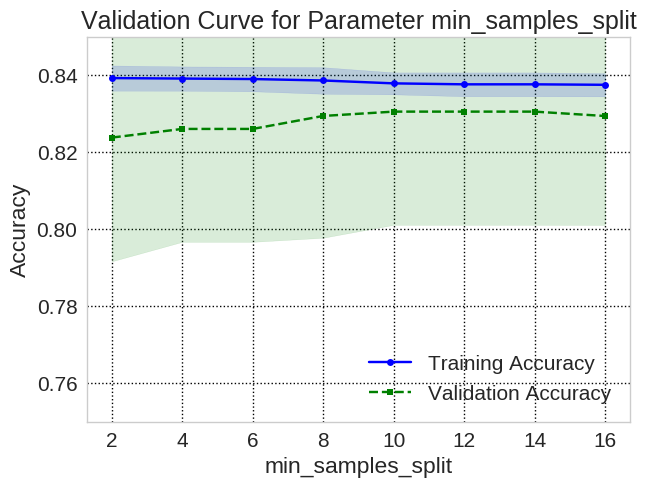

Best Accuracy is 0.83055 occuring at min_samples_split = 10
Smallest Train-Test Difference is 0.00709 occuring at min_samples_split = 12


In [131]:
min_samples_split_feed = [2, 4, 6, 8, 10, 12, 14, 16]

get_validation_curve(best_algorithms[4], X_data=X_train[feature_subset_EDA], y_data=y_train, 
                     param_feed={'min_samples_split' : min_samples_split_feed}, 
                     cv_splits=10, figure_size=(7, 5), x_scale='linear', y_lim=[0.75, 0.85])

Validation accuracy goes up and bias-variance tradeoff improves at *min_samples_split = 10*. That's great! Let's update our params: 

In [132]:
best_algorithms[4].set_params(**{'min_samples_split' : 10})

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=27, verbose=0, warm_start=False)

If we try increasing the number of estimators, we don't find any further improvement. So finally, let's check the learning curve:

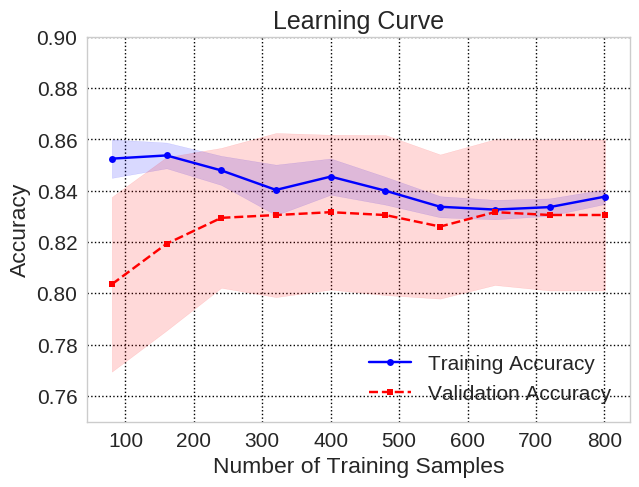

In [133]:
get_learning_curve(best_algorithms[4], X_data=X_train[feature_subset_EDA], y_data=y_train,
                   cv_splits=10, figure_size=(7, 5), y_lim=[0.75, 0.90])

The convergence reassures us of good bias-variance tradeoff. 

## 4.3 - The Impact of Excluding the Guarantee Group

What training data we provide can also be considered a hyperparameter (e.g. our choice of features). Earlier, when investigating fare outliers in [Section 2.2](#section_2_2), we discovered that several of our passengers were actually employees (the so-called 'Guarantee Group') from the shipbuilding company who were travelling with the Titanic on its maiden voyage to help ensure smooth operation and spot any necessary improvements. Irrespective of class, virtually all of this Guarantee Group perished. We hypothesized, these being employees, that their survival might belong to a model different from that of our non-employee passengers, and hence we considered excluding them from our training data. 

Here, using our tuned-up classifiers, we investigate explicitly the impact of dropping the Guarantee Group from our training data. 

In [134]:
# obtain the dataframe indexes of the Guarantee Group passengers 
gg_indexes = data_train_cl_std.index[data_train_cl_std['IsGG'] == 1].tolist()

# obtain scores for our recently-optimized classifier set before dropping GG members
comp_GG_kept, _ = train_classifier_ensemble_CV(classifiers=best_algorithms, 
                                               X_data=X_train[feature_subset_EDA], 
                                               y_data=y_train)

# obtain scores for our recently-optimized classifier set after dropping GG members
comp_GG_dropped, _ = train_classifier_ensemble_CV(classifiers=best_algorithms, 
                                                  X_data=X_train[feature_subset_EDA].drop(gg_indexes), 
                                                  y_data=y_train.drop(gg_indexes))

# create a dataframe for comparison
comp_GG_impact = pd.DataFrame(columns=['Classifier Name', 'Change To Accuracy'])
comp_GG_impact['Classifier Name'] = comp_GG_kept['Classifier Name']
comp_GG_impact['Change To Accuracy'] = (comp_GG_dropped['Mean Test Accuracy'] - comp_GG_kept['Mean Test Accuracy'])
    
# display results    
comp_GG_impact
    

Classifier Name  Change To Accuracy
0          LogisticRegression           -0.001681
1               SGDClassifier           -0.008473
2      DecisionTreeClassifier           -0.001541
3         ExtraTreeClassifier           -0.001516
4      RandomForestClassifier           -0.002716
5  LinearDiscriminantAnalysis           -0.000608
6                         SVC           -0.001529
7               XGBClassifier           -0.003789
8  GradientBoostingClassifier           -0.001529
9          AdaBoostClassifier           -0.001528

Findings:
* The change to accuracy is nearly negligible, which perhaps is not so surprising given that the Guarantee Group represents such a small fraction of our total training set, and belonged to the sex that was most likely to perish anyways. 
* There is nonetheless a small decrease in cross-validated accuracy, most pronounced for the SGD classifier. So we will choose to keep the Guarantee Group in our dataset after all. If we chose to, we could also invest some time to explore the impact on the test-train differences, but we'll presume that the model generalization, being already so good even with the Guarantee Group included, is not going to be much affected by their removal. 

<a id='section_4_4'></a>

## 4.4 - Ensemble Voting

Ensemble techniques allow us to draw from the strengths of each of our classifiers while mitigating their weaknesses. One such approach is through classifier voting, where the final prediction is decided by either a majority vote or a weighted vote of the predictions made by each constituent classifier. 

The benefits of voting are as follows. In a decision region where one particular classification algorithm does poorly compared to the others, its incorrect predictions can be overruled by other classifiers. In this way we help to consolidate our accuracy. Whatsmore, under the ideal assumptions of independent classifiers having equal error rates (that are less than 50%), it can be mathematically proven that pooling these classifier results into a vote reduces the overall error rate. Of course, while we don't necessarily meet these assumptions, it's worth exploring whether ensemble voting can offer us any improvements. 


### ***Building our Voting Classifier***

We'll start by assembling all of the classifier algorithms we optimized during hyperparameter tuning, and pooling these through majority voting. We'll print the cross-validated accuracy of each individual classifier, followed by that of the voting classifier. 

In [135]:
estimator_ensemble = [('lr', best_algorithms[0]),
                      ('sgd', best_algorithms[1]),
                      ('dtc', best_algorithms[2]),
                      ('etc', best_algorithms[3]),
                      ('rfc', best_algorithms[4]),
                      ('lda', best_algorithms[5]),
                      ('svc', best_algorithms[6]),
                      ('xgb', best_algorithms[7]),
                      ('gbc', best_algorithms[8]),
                      ('ada', best_algorithms[9])]

kfold = StratifiedKFold(n_splits=10, random_state=27)

# get accuracies of our individual trained classifiers for comparison
estimators = [estimator_ensemble[i][1] for i in range(len(estimator_ensemble))]
clf_names = [get_clf_name(clf) for clf in estimators]
for clf, clf_name in zip(estimators, clf_names):
    scores = cross_val_score(clf, X=X_train[feature_subset_EDA], y=y_train, cv=kfold, scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), clf_name))

# fit and score the majority vote classifier on our entire classifier ensemble
mvc = VotingClassifier(estimators=estimator_ensemble, voting='hard', weights=None, n_jobs=-1, flatten_transform=None)
scores = cross_val_score(estimator=mvc, X=X_train[feature_subset_EDA], y=y_train, cv=kfold, scoring='accuracy')
print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), get_clf_name(mvc)))


Accuracy: 0.8159 (+/- 0.0214) [LogisticRegression]
Accuracy: 0.8159 (+/- 0.0262) [SGDClassifier]
Accuracy: 0.8350 (+/- 0.0353) [DecisionTreeClassifier]
Accuracy: 0.8350 (+/- 0.0310) [ExtraTreeClassifier]
Accuracy: 0.8305 (+/- 0.0294) [RandomForestClassifier]
Accuracy: 0.8103 (+/- 0.0198) [LinearDiscriminantAnalysis]
Accuracy: 0.8339 (+/- 0.0359) [SVC]
Accuracy: 0.8350 (+/- 0.0341) [XGBClassifier]
Accuracy: 0.8339 (+/- 0.0325) [GradientBoostingClassifier]
Accuracy: 0.8361 (+/- 0.0331) [AdaBoostClassifier]
Accuracy: 0.8350 (+/- 0.0310) [VotingClassifier]


Our voting classifier does not appear to be offering any overall accuracy improvement. A few possible reasons for this are:
* Its constituent classifiers are too highly correlated, and therefore not very 'independent' (so we're not getting the full mathematical benefit of voting). 
* The SGD and Logistic Regression classifiers are  roughly 2% less accurate than the other classifiers, yet their votes are weighted the same as those of other classifiers. 

### ***Reducing the Number of Classifiers***

The first thing we can try is reducing the number of classifiers, choosing those that tend to be more 'independent' (i.e. whose predictions are not as highly correlated with one-another). We will retrieve our training set predictions for each classifier, obtain their Pearson correlation coefficients, and display these in a heatmap:

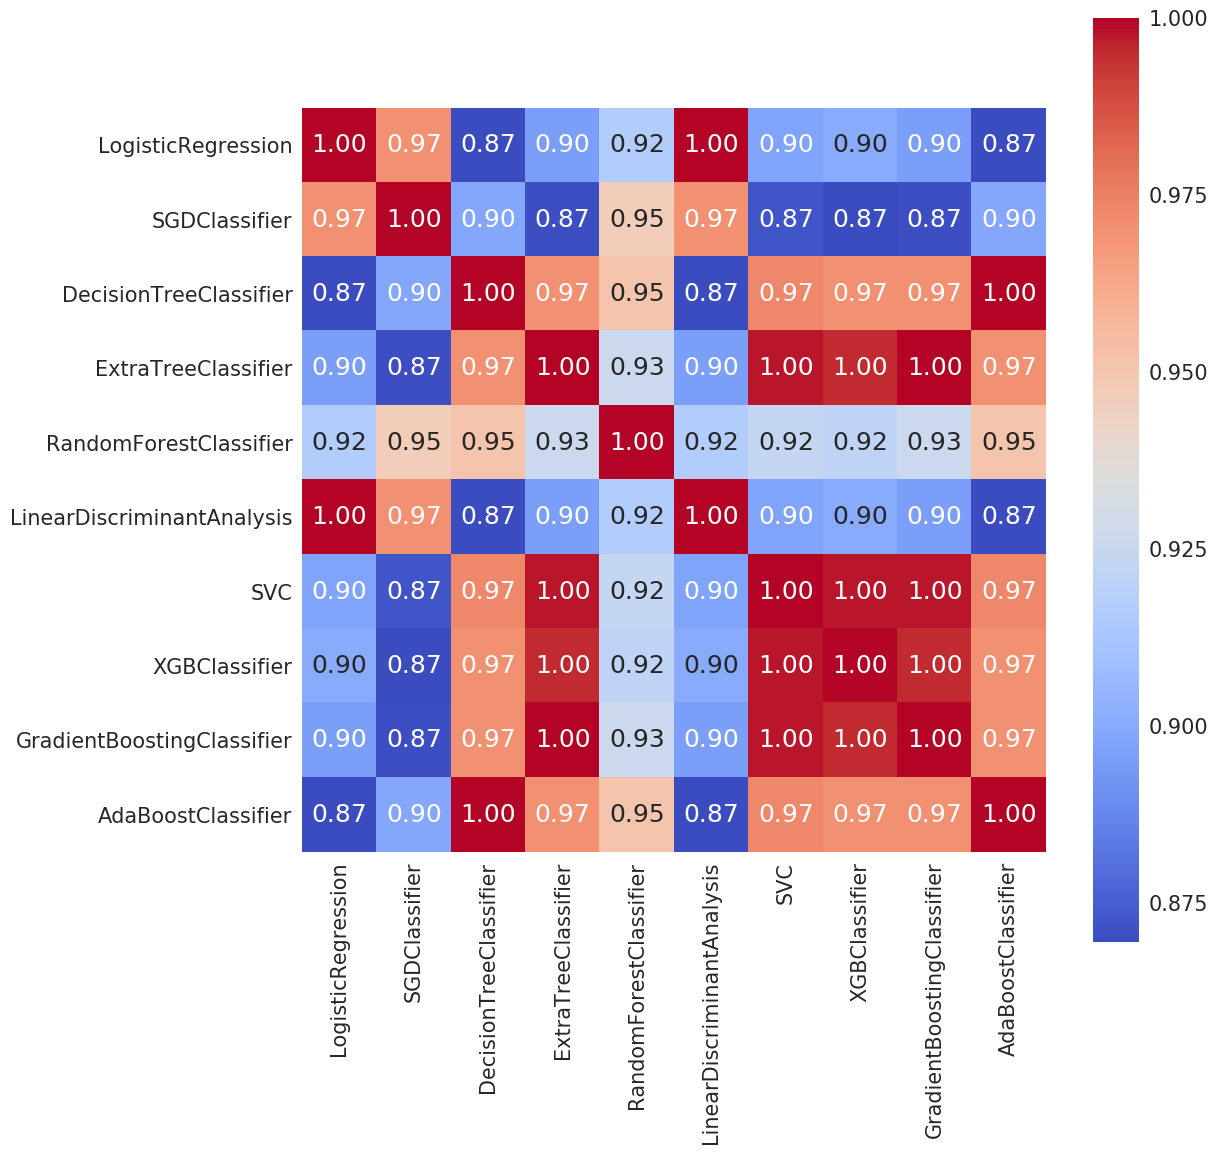

In [136]:
# obtain class predictions
train_probas = [clf.fit(X_train[feature_subset_EDA], y_train).predict(X_train[feature_subset_EDA]) 
                for clf in estimators]

# format into pandas dataframe
df_train_probas = pd.DataFrame(columns=clf_names)
for name, probas in zip(clf_names, train_probas):
    df_train_probas[name] = probas

# generate correlation matrix
plt.figure(figsize=(12,12))
sns.set(font_scale=1.5)
g = sns.heatmap(df_train_probas.corr(), square=True, annot=True, cmap='coolwarm', fmt='.2f')

Findings:
* The SVC, XGB, Gradient Boosting, AdaBoost, ExtraTree, and Decision Tree classifiers all appear strongly correlated with one another. Let's omit half of these classifiers, keeping the three with the highest accuracy scores (ExtraTree, XGB, AdaBoost). 
* The Logistic Regression, LDA, and SGD classifiers were also strongly correlated with each other. Of these, Logistic Regression had the best performance, so we'll drop the other two. 

Let's now see if our voting classifier improves:

In [137]:
estimator_ensemble = [('lr', best_algorithms[0]),
                      ('etc', best_algorithms[3]),
                      ('rfc', best_algorithms[4]),
                      ('xgb', best_algorithms[7]),
                      ('ada', best_algorithms[9])]

kfold = StratifiedKFold(n_splits=10, random_state=27)

# get accuracies of our individual trained classifiers for comparison
estimators = [estimator_ensemble[i][1] for i in range(len(estimator_ensemble))]
clf_names = [get_clf_name(clf) for clf in estimators]
for clf, clf_name in zip(estimators, clf_names):
    scores = cross_val_score(clf, X=X_train[feature_subset_EDA], y=y_train, cv=kfold, scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), clf_name))

# fit and score the majority vote classifier on our entire classifier ensemble
mvc = VotingClassifier(estimators=estimator_ensemble, voting='hard', weights=None, n_jobs=-1, flatten_transform=None)
scores = cross_val_score(estimator=mvc, X=X_train[feature_subset_EDA], y=y_train, cv=kfold, scoring='accuracy')
print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), get_clf_name(mvc)))


Accuracy: 0.8159 (+/- 0.0214) [LogisticRegression]
Accuracy: 0.8350 (+/- 0.0310) [ExtraTreeClassifier]
Accuracy: 0.8305 (+/- 0.0294) [RandomForestClassifier]
Accuracy: 0.8350 (+/- 0.0341) [XGBClassifier]
Accuracy: 0.8361 (+/- 0.0331) [AdaBoostClassifier]
Accuracy: 0.8350 (+/- 0.0310) [VotingClassifier]


Somewhat surprisingly, we don't see an improvement. Experimenting with soft voting and weight adjustment also yields no further improvement. This could in part be due to the simplicity of our model. While voting here does not appear to improve our accuracy, it might nonetheless be desirable to use this voting classifier for predictions on unseen data, as the pooling of classifiers still offers greater robustness. 

Finally, let's view the learning curve for our majority vote classifier:

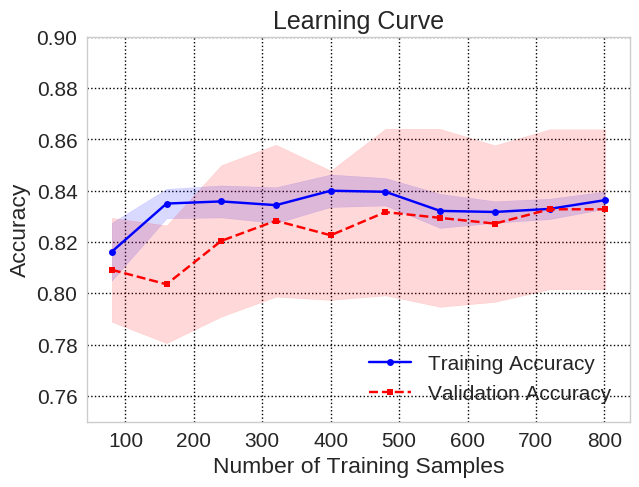

In [139]:
get_learning_curve(mvc, X_data=X_train[feature_subset_EDA], y_data=y_train,
                   cv_splits=10, figure_size=(7, 5), y_lim=[0.75, 0.90])

<a id='section_4_5'></a>

## 4.5 - Ensemble Stacking

Stacking is a much more versatile way of combining classifier results. It involves the creation of an additional classifier layer that takes the predictions of the base classifiers as its input ("meta-features") for training. In this way, the 2nd-level classifier can learn the relative strengths and weaknesses of its base classifiers to make a smarter decision about how to weigh their predictions. This powerful technique has emerged as one of the most effective approaches to many classification tasks and nowadays is ubiquitous in top-performing Kaggle entries. It's a deep and diverse topic in its own right, but here we'll just cover the basics. For more details on this topic, I'd recommend checking out the work of prominent Kaggler Alexander Guschin. 


### ***Adding KNN to Diversify our Ensemble***

An important part of stacking is choosing combinations of base classifiers that complement each other. Some classifiers will be better at handling certain parts of the decision region than others. 

Anecdotal evidence suggests that the K-Nearest Neighbors classifier would be a good one to add to our existing ensemble, so let's define it below. I'll initialize it with an optimized set of hyperparameters found during a separate GridSearch. 

In [140]:
knn = KNeighborsClassifier(n_neighbors=8, 
                           weights='uniform', 
                           algorithm='auto', 
                           leaf_size=15, 
                           p=2, 
                           metric='minkowski', 
                           metric_params=None, 
                           n_jobs=-1)

scores = cross_val_score(estimator=knn, X=X_train[feature_subset_EDA], y=y_train, cv=kfold, scoring='accuracy')
print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), get_clf_name(knn)))

Accuracy: 0.8316 (+/- 0.0326) [KNeighborsClassifier]


### ***Building Our Stacked Ensemble***

I'll choose to train our 2nd-level classifier using 'out-of-fold' predictions from the base classifier set. The procedure is as follows:
1. Split the training dataset into n folds. 
2. For each of these folds, use one as a 'validation set' while training the base classifiers on all the others. Then obtain predictions on the 'validation set'. 
3. After repeating step 2 for all folds, combine the 'validation set' predictions. These are our 'out-of-fold' predictions; each of these predictions were made by classifiers that hadn't seen that particular sample before. 
4. Use these out-of-fold predictions for each classifier as the input training features for our 2nd-level classifer. 

Below I define a function for obtaining the out-of-fold predictions for a set of input classifiers:

In [141]:
def get_oof_predictions(classifiers, X_data, y_data, cv_splits=5, random_state=27):
    
    """
    Returns out-of-fold predictions, as a pandas dataframe, for the input list of classifiers.  
    
    """
    clf_names = [get_clf_name(clf) for clf in classifiers]
    oof_preds = pd.DataFrame(columns=clf_names)
    
    kfold = StratifiedKFold(n_splits=cv_splits, random_state=random_state)
    
    for i, clf in enumerate(classifiers):
        
        this_clf_oof_preds = y_data.copy()  # entries will be overwritten
        
        for (train, test) in kfold.split(X_data, y_data):
        
            clf.fit(X_data.iloc[train], y_data.iloc[train])
            this_clf_oof_preds.iloc[test] = clf.predict(X_data.iloc[test])
            
        oof_preds[clf_names[i]] = this_clf_oof_preds
        
    return oof_preds


Now it comes to the decision about which classifiers to include. As before, it's best to pick classifiers that are not as strongly correlated with one another. We've chosen classifiers based on the heatmap in [Section 4.5](#section_4_5), have added the KNN classifier, and have found the optimal set based on some trial and error. We obtain the out-of-fold (OOF) predictions for these below:

In [142]:
estimator_ensemble = [best_algorithms[0],
                      best_algorithms[4],
                      best_algorithms[7],
                      best_algorithms[9], 
                      knn]

oof_preds = get_oof_predictions(classifiers=estimator_ensemble, 
                                X_data=X_train[feature_subset_EDA], 
                                y_data=y_train)

oof_preds.head(5)

LogisticRegression  RandomForestClassifier  XGBClassifier  \
0                 0.0                     0.0            0.0   
1                 1.0                     1.0            1.0   
2                 1.0                     1.0            1.0   
3                 1.0                     1.0            1.0   
4                 0.0                     0.0            0.0   

   AdaBoostClassifier  KNeighborsClassifier  
0                 0.0                   0.0  
1                 1.0                   1.0  
2                 0.0                   1.0  
3                 1.0                   1.0  
4                 0.0                   0.0

For our 2nd-level classifier, we'll use the popular XGB technique with a logistic objective function:

In [143]:
level2_xgb = XGBClassifier(seed=random_state, nthread=-1, objective='binary:logistic', n_estimators=1000)

kfold = StratifiedKFold(n_splits=10, random_state=27)
scores = cross_val_score(estimator=level2_xgb, X=oof_preds, y=y_train, cv=kfold, scoring='accuracy')
print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), 
                                            'Stacking with ' + get_clf_name(level2_xgb)))


Accuracy: 0.8384 (+/- 0.0330) [Stacking with XGBClassifier]


Findings:
* We've managed to obtain a small (0.2%) accuracy improvement over the individual base classifiers.

Let's also double-check the generalization performance with a learning curve:

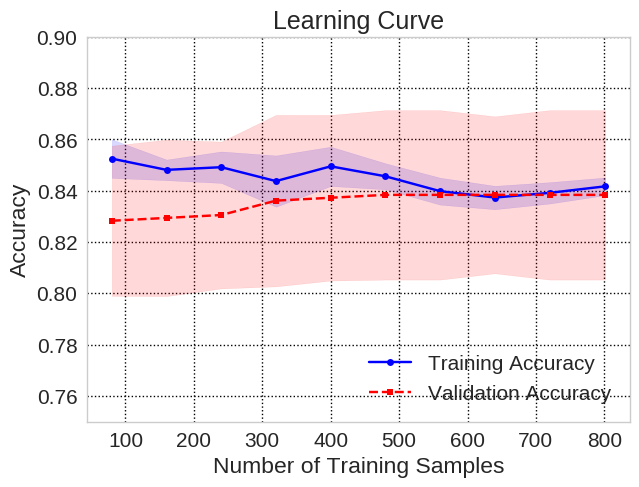

In [144]:
get_learning_curve(level2_xgb, X_data=oof_preds, y_data=y_train,
                   cv_splits=10, figure_size=(7, 5), y_lim=[0.75, 0.90])

The learning curve tells us that we are still achieving good generalization. 

<a id='section_4_6'></a>

## 4.6 - Further Improvements

The model we have developed here was ultimately based on a simple set of features whose selection was informed by our Exploratory Data Analysis. These features were ***Sex***, ***Pclass***, ***AgeBin***, and ***LargeGroup***. Our final cross-validated accuracy (83.84% using our Stacking method) is reasonably high, and we've taken care to ensure good generalization performance, which is likely critical for obtaining a good score on the unseen test data. 

On the other hand, our training and validation accuracies converge surprisingly quickly even at a low number of samples, perhaps indicating our model is too simple (e.g. validation accuracy is already at 83% for 100 samples). There is also a very large standard deviation on our validation accuracy. 

I suspect there are three more features we could consider including that might further enhance performance. In [Section 1.4.i)](#section_1_4_i) we considered the question of whether groups of co-travellers tended to perish or survive together. In particular, the feature 'GroupNumSurvived', which tells us how many others in a passenger's ticket group are known to have survived (from the training set), combined with 'GroupSize', could be useful. 'GroupType' might also complement these two. It would be interesting to add these features to our models, re-optimize, and see if it improves our accuracy. 


<a id='section_4_7'></a>

## 4.7 -  Preparing our Prediction Submission

The Kaggle submission file needs to be a CSV with one header row and only two columns, specifying 'PassengerID' and the predicted value of 'Survived' for the test set. We prepare this submission file below:

In [161]:
# create a dataframe for our prediction submission
survival_predictions = pd.DataFrame(columns=['PassengerId', 'Survived'])
survival_predictions['PassengerId'] = ids_test

# ensure our stacked classifier is fit on our oof training set predictions
level2_xgb.fit(oof_preds, y_train)

# train our estimator ensemble on the entire training set and get classifier predictions 
# on our test set to create meta-features for level2_xgb
clf_names = [get_clf_name(clf) for clf in estimator_ensemble]
X_test_meta = pd.DataFrame(columns=clf_names)  # specify columns upfront so we fix their order
for i, clf in enumerate(estimator_ensemble):
    clf.fit(X_train[feature_subset_EDA], y_train)
    X_test_meta[clf_names[i]] = clf.predict(X_test[feature_subset_EDA])
    
# obtain predictions from our stacked classifier
survival_predictions['Survived'] = level2_xgb.predict(X_test_meta)

# save results to CSV file (dropping the index column)
survival_predictions.to_csv('./titanic-data/prediction_submission_1.csv', index=False, float_format='%.f')
    

***